**Importing Necessary Libraries**

In [2]:
!pip install sweetviz -q
!pip install -U kaleido -q


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime as dt
import sweetviz as sv
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

c:\Users\shwet\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# from google.colab import files

# #Upload files
# uploaded = files.upload()

In [5]:
# Load the dataset
file_path = "/Users/shwet/Downloads/member_sample.csv"

#file_path = '/content/member_sample.csv'
df = pd.read_csv(file_path)
# data_test = pd.read_csv("/work/member_sample.csv")

# Display the first few rows of the dataset
df.head()

Unnamed: 0  Individual Key  Household Key Member Flag          City  \
0           0        10000003       10462590           Y     NEW HAVEN   
1           1        52211550        4500791           Y  WEST WARWICK   
2           2        52211550        4500791           Y  WEST WARWICK   
3           3        52211550        4500791           Y  WEST WARWICK   
4           4        52211550        4500791           Y  WEST WARWICK   

  State - Grouped  ZIP5      ZIP9 FSV CMSI Flag FSV Credit Card Flag  ...  \
0              CT  6511  65111349             N                    N  ...   
1              RI  2893  28933850             N                    Y  ...   
2              RI  2893  28933850             N                    Y  ...   
3              RI  2893  28933850             N                    Y  ...   
4              RI  2893  28933850             N                    Y  ...   

  SC Vehicle Manufacturer Name SC Vehicle Model Name      SVC Facility Name  \
0                          NaN                   NaN                    NaN   
1                       TOYOTA                 CAMRY  ASTRO WRECKER SERVICE   
2                       TOYOTA                 CAMRY  Astro Wrecker Service   
3                       TOYOTA                 CAMRY  ASTRO WRECKER SERVICE   
4                       TOYOTA                 CAMRY  ASTRO WRECKER SERVICE   

    SVC Facility Type Total Cost Tow Destination Latitude  \
0                 NaN        NaN                      NaN   
1  independent repair       32.5                     41.0   
2  independent repair       30.0                      0.0   
3  independent repair       32.5                      0.0   
4  independent repair       30.0                      0.0   

  Tow Destination Longitude          Tow Destination Name Was Duplicated  \
0                       NaN                           NaN            NaN   
1                     -71.0  Aar / Johnson's Auto Service            0.0   
2                       0.0                           NaN            0.0   
3                       0.0                           NaN            0.0   
4                       0.0                           NaN            0.0   

   Was Towed To AAR Referral  
0                        NaN  
1                        1.0  
2                        0.0  
3                        0.0  
4                        0.0  

[5 rows x 113 columns]

In [6]:
# Descriptive Statistics of the dataset
df.describe().T

count          mean           std  \
Unnamed: 0                      21344.0  2.961514e+04  2.667068e+04   
Individual Key                  21344.0  3.358534e+07  5.113419e+07   
Household Key                   21344.0  1.597040e+07  2.138079e+07   
ZIP5                            21344.0  2.944900e+03  4.787577e+02   
ZIP9                            21344.0  2.945248e+07  4.787472e+06   
Length Of Residence             12010.0  1.152498e+01  5.495280e+00   
Do Not Direct Mail Solicit      21343.0  5.285105e-02  2.237413e-01   
Email Available                 21343.0  5.361008e-01  4.987067e-01   
ERS ENT Count Year 1            16675.0  5.185607e-01  9.855318e-01   
ERS ENT Count Year 2            16675.0  9.362519e-01  1.253213e+00   
ERS ENT Count Year 3            16675.0  9.597601e-01  1.322932e+00   
ERS Member Cost Year 1          16675.0  2.806817e+01  5.757698e+01   
ERS Member Cost Year 2          16675.0  5.097063e+01  7.821354e+01   
ERS Member Cost Year 3          16675.0  4.951812e+01  7.396594e+01   
Right_Individual Key            21343.0  3.358644e+07  5.113513e+07   
Member Key                      21343.0  2.521610e+06  2.626375e+06   
Member Number Associate ID      21343.0  1.153178e+07  1.235388e+07   
Member Tenure Years             21343.0  3.295624e+01  1.792812e+01   
Membership ID                   21343.0  1.153177e+05  1.235388e+05   
Months from Join to Cancel       8177.0  2.961616e+02  2.321941e+02   
ZIP                             21343.0  2.980749e+03  1.653139e+03   
Basic Cost                      13944.0  4.262959e+01  1.571399e+01   
Calculated Tow Miles            13861.0  2.379071e+00  7.030493e+00   
Dispatch Code2Description           0.0           NaN           NaN   
Is Duplicate                    13997.0  0.000000e+00  0.000000e+00   
Is NSR                          13997.0  5.915553e-02  2.359240e-01   
Member Match Flag               13997.0  1.000000e+00  0.000000e+00   
Member Number and Associate ID  13997.0  1.090849e+07  1.197440e+07   
Plus Cost                       13944.0  3.450947e+00  1.821348e+01   
Premier Cost                    13911.0  6.901014e-03  6.928482e-01   
Rec ID                          13997.0  7.568128e+06  6.350530e+06   
Total Cost                      13944.0  4.727370e+01  8.686911e+01   
Tow Destination Latitude        11813.0  1.512045e+01  1.986136e+01   
Tow Destination Longitude       11813.0 -2.610489e+01  3.428865e+01   
Was Duplicated                  13997.0  6.515682e-02  2.468112e-01   
Was Towed To AAR Referral       13997.0  1.364578e-02  1.160195e-01   

                                         min          25%         50%  \
Unnamed: 0                      0.000000e+00      6671.75     19504.5   
Individual Key                  1.729300e+04   8784029.00  18537395.0   
Household Key                   8.750000e+02   4350387.00   9811235.0   
ZIP5                            2.801000e+03      2857.00      2888.0   
ZIP9                            2.801008e+07  28570641.00  28882477.5   
Length Of Residence             0.000000e+00         8.00        15.0   
Do Not Direct Mail Solicit      0.000000e+00         0.00         0.0   
Email Available                 0.000000e+00         0.00         1.0   
ERS ENT Count Year 1            0.000000e+00         0.00         0.0   
ERS ENT Count Year 2            0.000000e+00         0.00         0.0   
ERS ENT Count Year 3            0.000000e+00         0.00         0.0   
ERS Member Cost Year 1          0.000000e+00         0.00         0.0   
ERS Member Cost Year 2          0.000000e+00         0.00         0.0   
ERS Member Cost Year 3          0.000000e+00         0.00         0.0   
Right_Individual Key            1.729300e+04   8784029.00  18537395.0   
Member Key                      1.150000e+02   1506908.50   1524446.0   
Member Number Associate ID      1.530000e+04   1954124.00   5936800.0   
Member Tenure Years             0.000000e+00        15.00        35.0   
Membership ID      

In [7]:
# Convert ZIP5 and ZIP9 to string (assuming they should be strings)
df['ZIP5'] = df['ZIP5'].astype(str)
df['ZIP9'] = df['ZIP9'].astype(str)
# Convert 'Total Cost' to float (if not already)
df['Total Cost'] = pd.to_numeric(df['Total Cost'], errors='coerce')
# Convert categorical data to 'category' type
categorical_columns = ['Member Flag', 'City', 'State - Grouped', 'FSV CMSI Flag', 'FSV Credit Card Flag']
for col in categorical_columns:
    df[col] = df[col].astype('category')
# Example of converting a date column if present (assuming a column 'Date')
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Check the updated data types
print(df.dtypes)

Unnamed: 0                      int64
Individual Key                  int64
Household Key                   int64
Member Flag                  category
City                         category
                               ...   
Tow Destination Latitude      float64
Tow Destination Longitude     float64
Tow Destination Name           object
Was Duplicated                float64
Was Towed To AAR Referral     float64
Length: 113, dtype: object


In [8]:
# Dropping unnecessary columns
columns_to_drop = [
    "ZIP5",
    "ZIP9",
    "Race",
    "Membership ID",
    "Member Phone Type",
    "Occupation Code",
    "Unnamed: 0",
    "Member Key",
    "Date Of Birth",
    "Cancel Date",
    "Cancel Reason",
    "Right_Individual Key",
    "Member Phone Type",
    "Breakdown Map Location",
    "ZIP",
    "Was Duplicated",
    "Bad Address Flag",
    "Billing Code Description",
    "Tow Destination Latitude",
    "Tow Destination Longitude",
    "Member Map Location",
    "Call Status Recv Date",
    "Member Flag",
    "Number of Children",
    "Member Number Associate ID",
    "SC Vehicle Manufacturer Name",
    "SVC Facility Name",
    'Is Duplicate',
    'Member Match Flag',
    'Premier Cost'

]
df = df.drop(columns=columns_to_drop, axis=1)

In [9]:
df['Individual Key'].count()

21344

In [10]:
df["Member Number and Associate ID"].count()

13997

In [11]:
# Making list of important products
product_columns =['FSV CMSI Flag','FSV Credit Card Flag', 'FSV Deposit Program Flag',
    'FSV Home Equity Flag', 'FSV ID Theft Flag', 'FSV Mortgage Flag',
    'INS Client Flag', 'TRV Globalware Flag', 'New Mover Flag']


In [12]:
# Drop rows where all specified columns are missing
# df = df.dropna(subset=products)

# df

### CHECK FOR ANOMALITY IN HOUSEHOLD MEMBERS NUMBER

In [13]:
df_hh = df.groupby(['Household Key'])['Individual Key'].nunique()
pd.unique(df_hh.sort_values())
df_hh.value_counts().sort_index()
fig = px.histogram(df_hh, text_auto=True)
fig.show()

There are 1543 households with 1 individual, 1980 households with 2 individual, 934 households with 3 individuals and so on.

Maximum data has 2 members per household

### Handeling Missing Values

In [14]:
# Check null values present in dataset within %
# Calculate the percentage of missing values
missing_values_percentage = (df.isna().sum() / len(df)) * 100

# display([], missing_values_percentage, for col in missing_values_percentage.index, missing_values_percentage)

# Dictionary comprehension to create list of columns with missing values
missing_values_columns = {col: missing_values_percentage[col] for col in missing_values_percentage.index if missing_values_percentage[col] > 0}

In [15]:
# Plotly bar graph for null values
# Bar graph for massing values with columns
# Assuming missing_values_columns is a dictionary where keys are column names and values are counts of missing values
sorted_missing_values_columns = dict(sorted(missing_values_columns.items(), key=lambda item: item[1], reverse=True))

fig = px.bar(x=list(sorted_missing_values_columns.keys()), y=list(sorted_missing_values_columns.values()), text_auto=True, labels={
                     "y": "Null Values %",
                     "x": "Columns Names"
                 })
fig.update_layout(title='Top Null value columns before data cleaning')
fig.show()
# Save the plot as a PNG file
# plt.savefig("Before Data Cleaning.png")
# fig.write_image("Before Data Cleaning.png")

In [16]:
# Method to remove colums with missing values more then threshold 70%
def remove_columns(df, threshold):
    # Calculate the percentage of missing values
    missing_values_percentage = (df.isna().sum() / len(df)) * 100
    # Create a list of columns with missing values above the threshold
    missing_cols = missing_values_percentage[missing_values_percentage > threshold].index
    # Drop the columns with missing values above the threshold
    print(f"Dropping columns with missing values above {threshold}%: {missing_cols}")
    df.drop(columns=missing_cols, inplace=True)

    return df

# Remove columns with missing values above 70%
cleaned_df = remove_columns(df, 70)

Dropping columns with missing values above 70%: Index(['Responded to Catalog', 'Right_Gender', 'Reason Joined',
       'Reinstate Date', 'Right_Dwelling Type', 'Move Distance',
       'Occupant Type', 'Dispatch Code2Description', 'Prob2 Code Description',
       'Tow Destination Name'],
      dtype='object')


In [17]:
# Calculate the percentage of missing values
missing_values_percentage = (cleaned_df.isna().sum() / len(cleaned_df)) * 100

# Dictionary comprehension to create list of columns with missing values
missing_values_columns = {col: missing_values_percentage[col] for col in missing_values_percentage.index if missing_values_percentage[col] > 0}

# Sort the dictionary by the count of missing values in descending order
sorted_missing_values_columns = dict(sorted(missing_values_columns.items(), key=lambda item: item[1], reverse=True))

# Limit to top 20 entries
top_20_missing_values_columns = dict(list(sorted_missing_values_columns.items())[:20])

# Plotly bar graph for null values
fig = px.bar(x=list(top_20_missing_values_columns.keys()), y=list(top_20_missing_values_columns.values()), text_auto=True, labels={
                     "y": "Null Values %",
                     "x": "Columns Names"
                 })
fig.update_layout(title='Top 20 Columns with Missing Values After Null Columns (Containing more than 70 %) Removal')
fig.show()
# plt.savefig("After Data Cleaning.png")
# fig.write_image("After Data Cleaning.png")

### Data Processing

In [18]:
# # visualising data distributation to analyse the Data
# n_features = cleaned_df.shape[1]
# n_rows = int(np.ceil(n_features / 3))

# fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
# axes = axes.flatten()

# for i, col in enumerate(df.columns):
#     df[col].hist(bins=30, ax=axes[i])
#     axes[i].set_title(col)
#     axes[i].set_xlabel('Value')
#     axes[i].set_ylabel('Frequency')
# # Remove empty subplots
# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()
cleaned_df.rename(columns = {'Individual Key':'SVC Facility Members'}, inplace = True)

In [19]:
# Method to find categorical columns
def get_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    return categorical_columns

cat_columns = get_categorical_columns(cleaned_df)
cat_columns

Index(['City', 'State - Grouped', 'FSV CMSI Flag', 'FSV Credit Card Flag',
       'FSV Deposit Program Flag', 'FSV Home Equity Flag', 'FSV ID Theft Flag',
       'FSV Mortgage Flag', 'INS Client Flag', 'TRV Globalware Flag',
       'Mail Responder', 'Home Owner', 'Income', 'Children', 'Education',
       'Dwelling Type', 'Credit Ranges', 'Language', 'Gender',
       'Active Expiration Date', 'Address Change Date', 'Birth Date MMDDYYYY',
       'Branch Name', 'County', 'Email Status', 'Join AAA Date',
       'Join Club Date', 'Member Status', 'Member Type',
       'Opt-Out - Publication', 'Renew Method', 'Mosaic Household',
       'Mosaic Global Household', 'kcl_B_IND_MosaicsGrouping',
       'New Mover Flag', 'Occupation Group', 'Breakdown City',
       'Breakdown State', 'Call Canceled', 'Call Killed', 'Cash Call',
       'Clearing Code Last Description', 'Dispatch Code1 Description',
       'DTL Prob1 Code Description', 'Fleet Indicator', 'Motorcycle Indicator',
       'Plus Indicato

In [20]:
# mode of cat_columns for cleaned df
# x = cleaned_df[cat_columns].mode().skipna=True

In [21]:
# Fill null values with mode for categorical columns
# cleaned_df[cat_columns].fillna(cleaned_df[cat_columns].mode(), inplace = True)

In [22]:
# Write a method to check the categorical values and impute the respective column with the column mode value
def impute_missing_cat(df, cols):
    imputer = SimpleImputer(strategy='most_frequent')
    df[cols] = imputer.fit_transform(df[cols])
    return df

cleaned_df = impute_missing_cat(cleaned_df, cat_columns)

In [23]:
# method to find numerical columns
def get_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    return numerical_columns

num_columns = get_numerical_columns(cleaned_df)
num_columns

Index(['SVC Facility Members', 'Household Key', 'Length Of Residence',
       'Do Not Direct Mail Solicit', 'Email Available', 'ERS ENT Count Year 1',
       'ERS ENT Count Year 2', 'ERS ENT Count Year 3',
       'ERS Member Cost Year 1', 'ERS Member Cost Year 2',
       'ERS Member Cost Year 3', 'Member Tenure Years',
       'Months from Join to Cancel', 'Basic Cost', 'Calculated Tow Miles',
       'Is NSR', 'Member Number and Associate ID', 'Plus Cost', 'Rec ID',
       'Total Cost', 'Was Towed To AAR Referral'],
      dtype='object')

In [24]:
# Fill null values with median
cleaned_df[num_columns] = cleaned_df[num_columns].fillna(cleaned_df[num_columns].median())

In [25]:
# check null values in percentage
(cleaned_df.isna().sum() / len(df)) * 100

SVC Facility Members           0.0
Household Key                  0.0
City                           0.0
State - Grouped                0.0
FSV CMSI Flag                  0.0
                              ... 
SC STS RSN Code Description    0.0
SC Vehicle Model Name          0.0
SVC Facility Type              0.0
Total Cost                     0.0
Was Towed To AAR Referral      0.0
Length: 74, dtype: float64

In [26]:
# filling remaining null values with median as most of the data is positively schewed
# cleaned_df.apply(lambda x: x.fillna(x.median()) if x.dtype in [np.float64, np.int64] else x)

In [27]:
# def remove_duplicates(df):
#     # Remove duplicate rows
#     df = df.drop_duplicates()
cleaned_df.rename(columns = {'Household Key':'Member Flag'}, inplace = True)
#     # Remove duplicate columns
#     df = df.T.drop_duplicates().T

#     return df
# cleaned_df = remove_duplicates(cleaned_df)

### Exploratory Data Analysis (EDA)

In [28]:
# Select important features using correlation
corr_matrix = cleaned_df._get_numeric_data().corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
cleaned_df = cleaned_df.drop(columns=to_drop, axis=1)

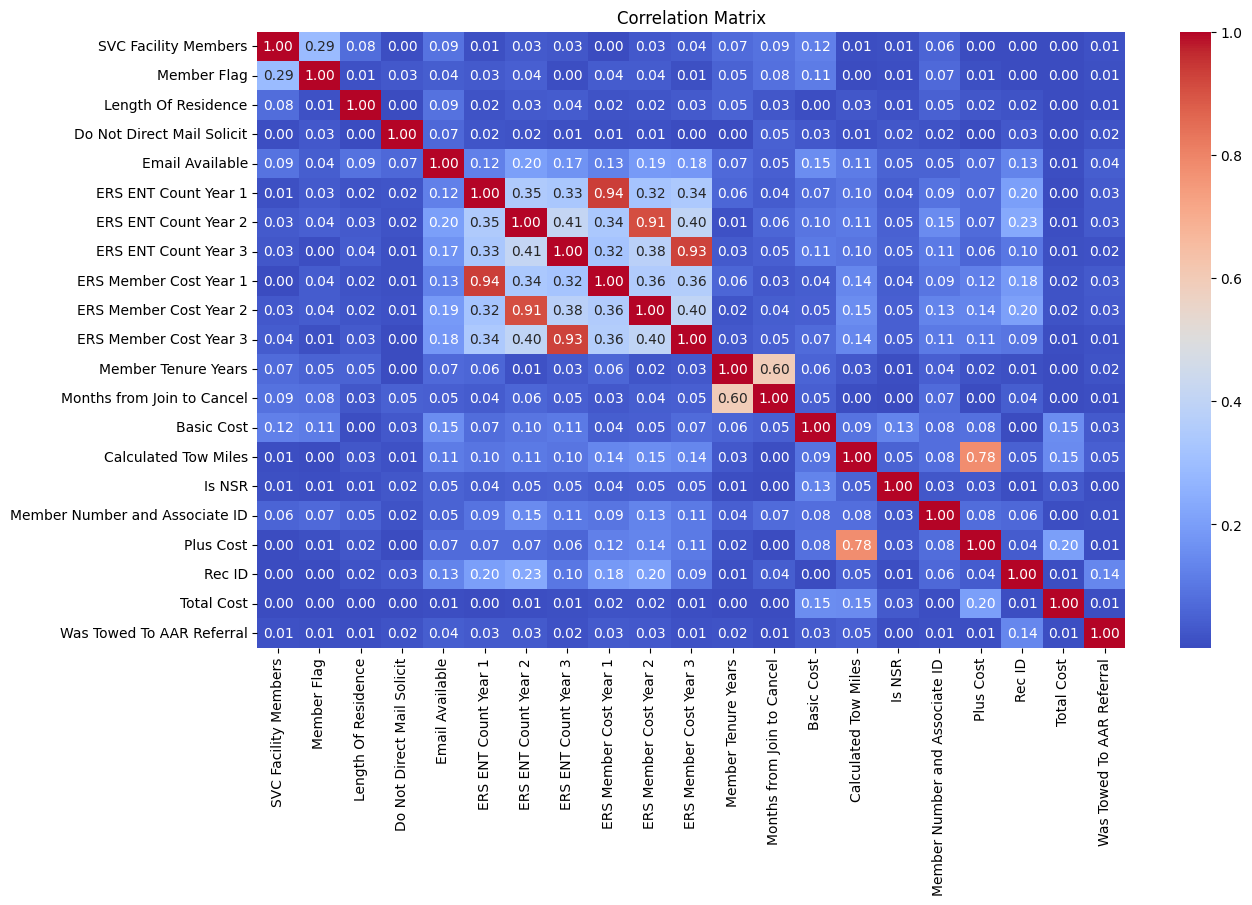

In [29]:
# Plot the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

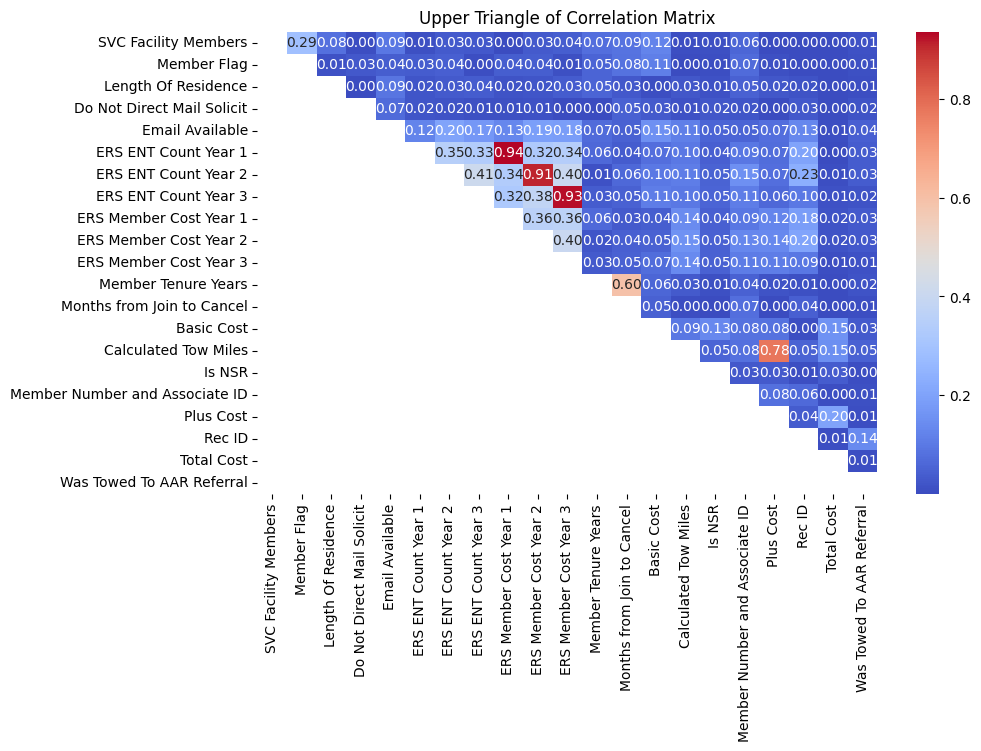

In [30]:
# Plot the upper triangle of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(upper, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Upper Triangle of Correlation Matrix')
plt.show()

In [31]:
# # Function to impute missing categorical columns with mode
# def impute_missing_cat(df, cols):
#     imputer = SimpleImputer(strategy='most_frequent')
#     df[cols] = imputer.fit_transform(df[cols])
#     return df

# # Separate numerical and categorical columns
# numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64', 'int16','int8']).columns
# categorical_cols = cleaned_df.select_dtypes(include=['object']).columns
cleaned_df.rename(columns = {'Member Number and Associate ID':'Member Phone Type'}, inplace = True)


# # Impute missing values in categorical columns
# df_cleaned = impute_missing_cat(cleaned_df, categorical_cols)

# # One Hot encoding
# # pd.get_dummies(cleaned_df,columns= categorical_cols)


# cleaned_df.info()

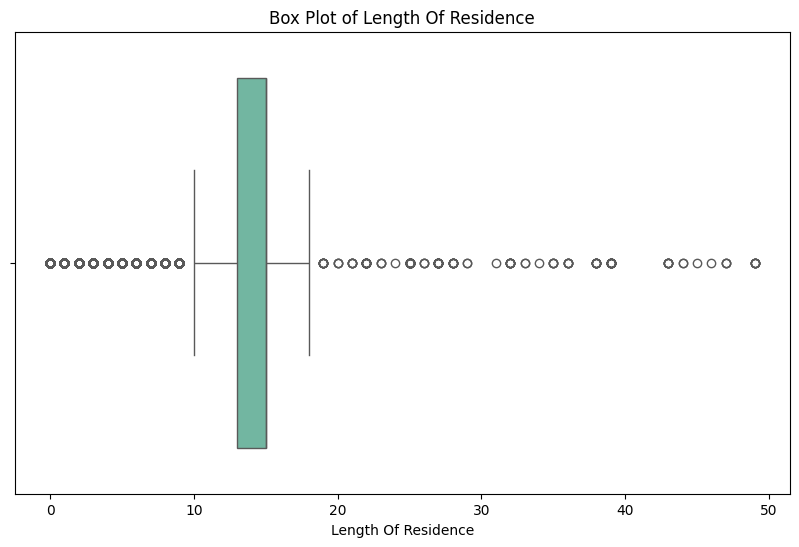

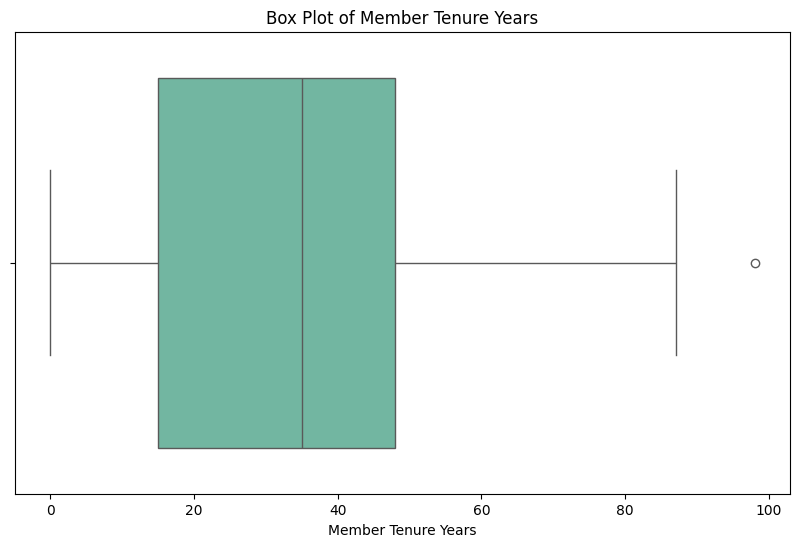

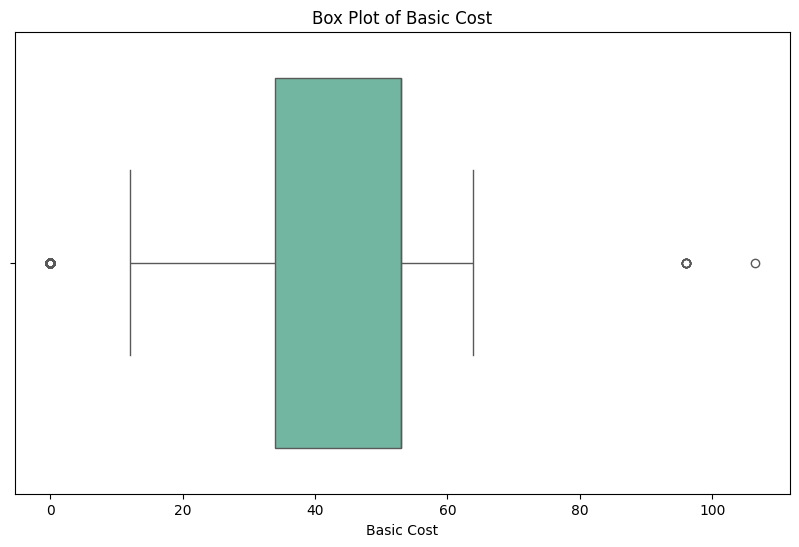

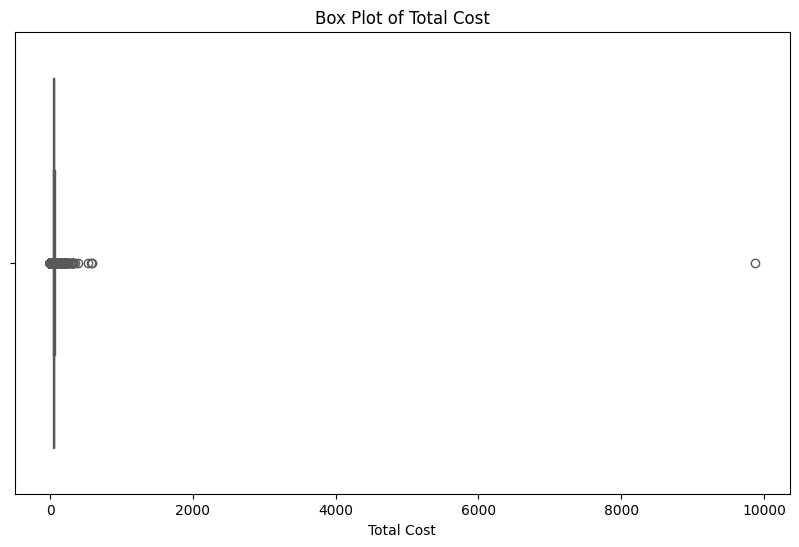

In [32]:
# Method to create box with different columns names for a dataframe
def plot_boxplots(df, figsize=(10, 6), save_path=None):
    """
    Create separate box plots for all columns in the given DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame
    figsize (tuple): Figure size for each plot (width, height)
    save_path (str): Path to save the plots. If None, plots will be displayed instead.
    """
    columns = ['Length Of Residence', 'Member Tenure Years', 'Basic Cost', 'Total Cost']
    for column in columns:
        plt.figure(figsize=figsize)
        sns.boxplot(x=df[column], palette="Set2")
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.show()

plot_boxplots(cleaned_df)

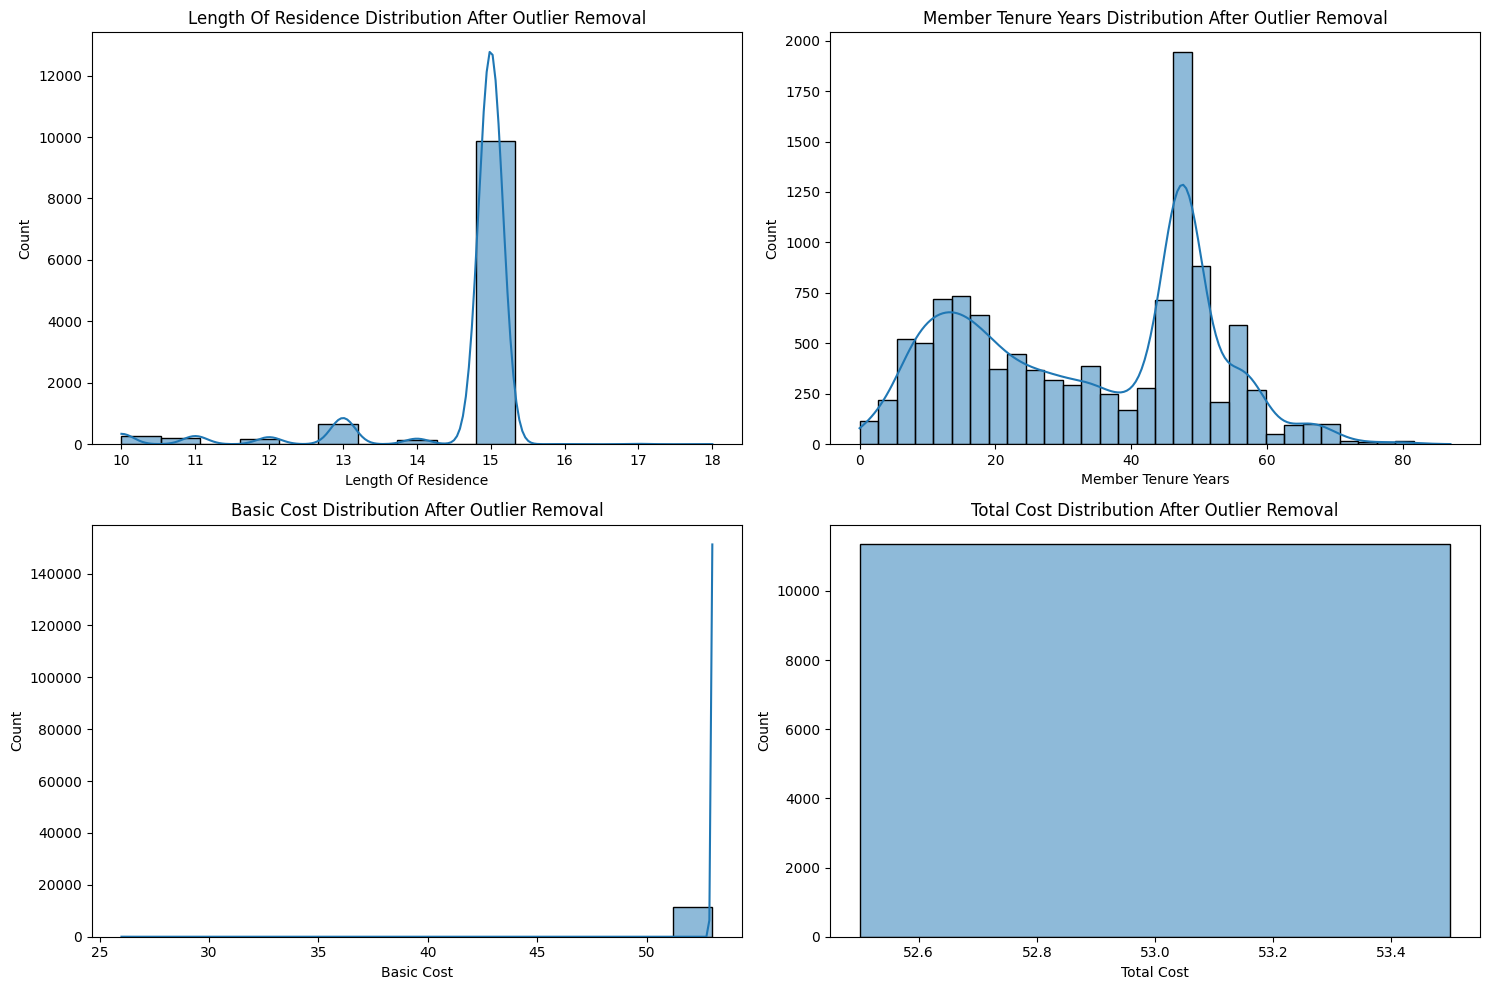

In [33]:
# def remove_outliers(df, columns):
#     for column in columns:
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR
cleaned_df.rename(columns = {'Rec ID':'Premier Cost'}, inplace = True)
#         df.loc[:, column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound))
#     return df.dropna()

def remove_outliers(df, columns):
    """
    Remove outliers from a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): Input DataFrame.
    columns (list): List of column names to remove outliers from.

    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    for column in columns:
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Filter out outliers
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

    return df

# Remove outliers from specific columns
columns_to_clean = ['Length Of Residence', 'Member Tenure Years', 'Basic Cost', 'Total Cost']
cleaned_df = remove_outliers(cleaned_df, columns_to_clean)

# Plot histograms for continuous variables after removing outliers
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(cleaned_df['Length Of Residence'].dropna(), kde=True)
plt.title('Length Of Residence Distribution After Outlier Removal')

plt.subplot(2, 2, 2)
sns.histplot(cleaned_df['Member Tenure Years'].dropna(), kde=True)
plt.title('Member Tenure Years Distribution After Outlier Removal')

plt.subplot(2, 2, 3)
sns.histplot(cleaned_df['Basic Cost'].dropna(), kde=True)
plt.title('Basic Cost Distribution After Outlier Removal')

plt.subplot(2, 2, 4)
sns.histplot(cleaned_df['Total Cost'].dropna(), kde=True)
plt.title('Total Cost Distribution After Outlier Removal')

plt.tight_layout()
plt.show()


# Plot box plots for continuous variables after removing outliers
#plt.figure(figsize=(15, 10))

#plt.subplot(2, 2, 1)
#sns.boxplot(y=df_cleaned_or['Length Of Residence'].dropna())
#plt.title('Length Of Residence Box Plot After Outlier Removal')

#plt.subplot(2, 2, 2)
#sns.boxplot(y=df_cleaned_or['Member Tenure Years'].dropna())
#plt.title('Member Tenure Years Box Plot After Outlier Removal')

#plt.subplot(2, 2, 3)
#sns.boxplot(y=df_cleaned_or['Basic Cost'].dropna())
#plt.title('Basic Cost Box Plot After Outlier Removal')

#plt.subplot(2, 2, 4)
#ns.boxplot(y=df_cleaned_or['Total Cost'].dropna())
#plt.title('Total Cost Box Plot After Outlier Removal')

#plt.tight_layout()
#plt.show()

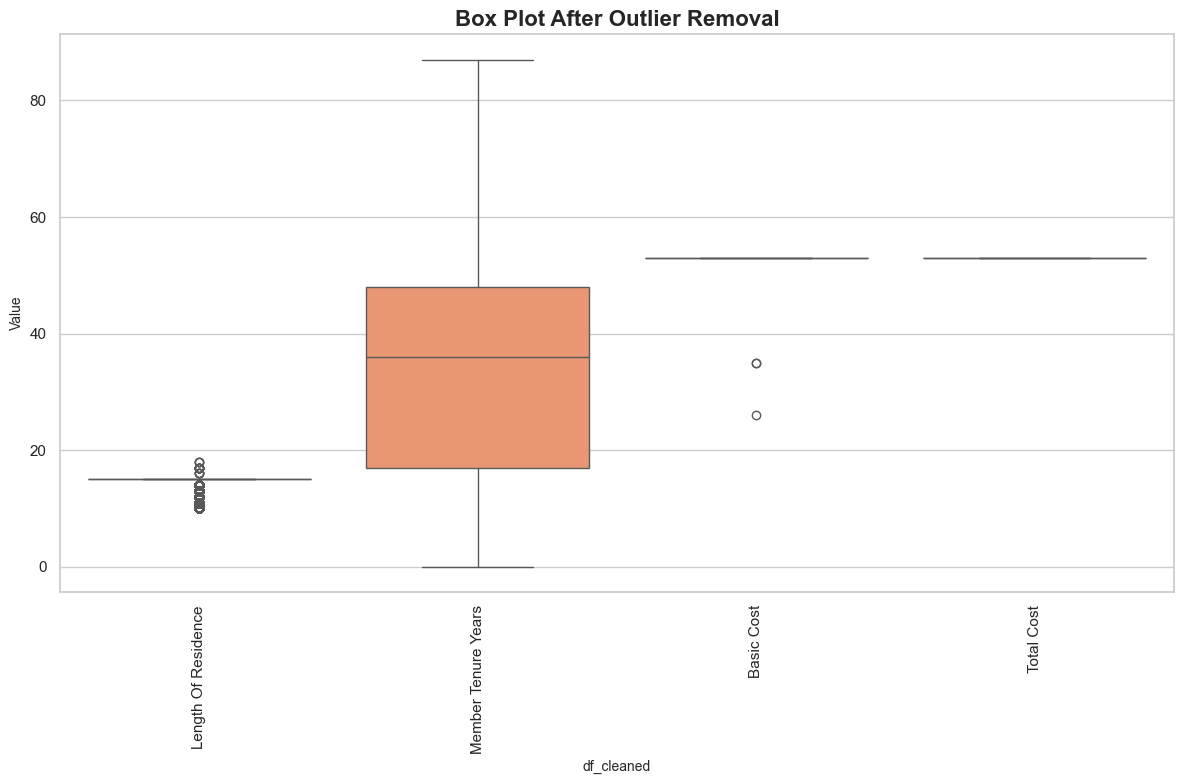

In [34]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
# Create box plots for the cleaned data
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_df[columns_to_clean], orient="v",palette='Set2')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Box Plot After Outlier Removal', fontsize=16, weight='bold')
plt.xlabel('df_cleaned', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.tight_layout()
plt.show()

In [35]:
# num_columns = num_columns.to_list()

In [36]:
# Remove ['ERS Member Cost Year 1', 'ERS Member Cost Year 2', 'ERS Member Cost Year 3'] from num_columns list
#num_columns.remove('ERS Member Cost Year 1')
#num_columns.remove('ERS Member Cost Year 2')
#num_columns.remove('ERS Member Cost Year 3')

In [37]:
# # Correlation heatmap for numerical features after removing outliers
# correlation_matrix = df_cleaned_or[num_columns].corr()

# plt.figure(figsize=(15, 15))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Correlation Heatmap After Outlier Removal')
# plt.show()

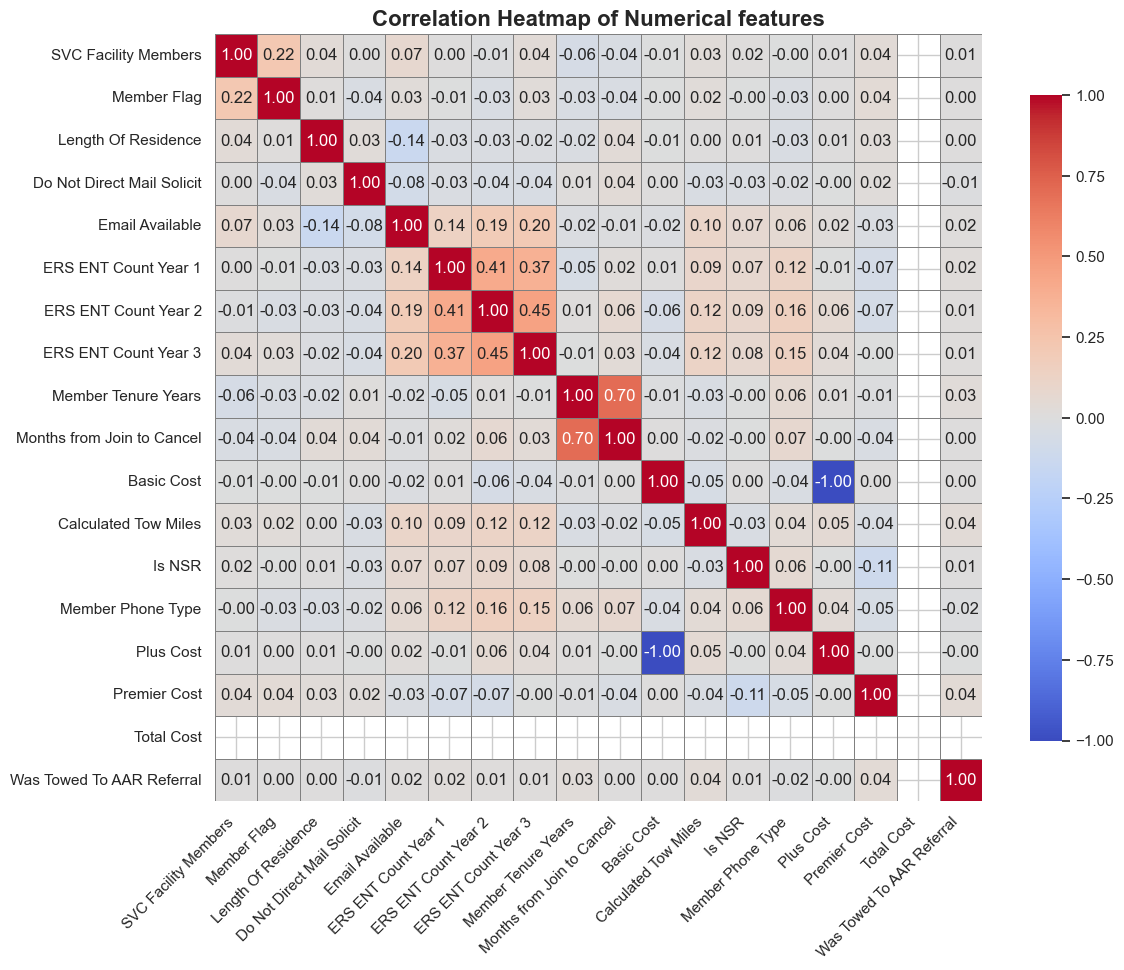

In [38]:
# Correlation heatmap for numerical features
numerical_columns = cleaned_df.select_dtypes(include=['float64', 'int16', 'int64']).columns
correlation_matrix = cleaned_df[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Correlation Heatmap of Numerical features', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Plus cost and basic cost is highly corelated which is normal as both are a part of total cost.**

In [39]:
# Selected the hightly related features and remove the first feature which is correlated to another feature
#def correlation(dataset, threshold):
    #col_corr = set()  # Set of all the names of correlated columns
    #corr_matrix = dataset.corr()
    #for i in range(len(corr_matrix.columns)):
        #for j in range(i):
            #if abs(corr_matrix.iloc[i, j]) > threshold:  # we are interested in absolute coeff value
                #colname = corr_matrix.columns[i]  # getting the name of column
                #col_corr.add(colname)
    #return col_corr

In [40]:
# Remove the columns with threshold more than 80%
#corr_features = correlation(df_cleaned_or[num_columns], 0.7)
#print(corr_features)

In [41]:
# my_report = sv.analyze(df_cleaned_OR)
#my_report.show_html()
# my_report.show_notebook()

In [42]:
cleaned_df[['FSV Credit Card Flag', 'FSV Deposit Program Flag',
    'FSV Home Equity Flag', 'FSV ID Theft Flag', 'FSV Mortgage Flag',
    'INS Client Flag', 'TRV Globalware Flag', 'New Mover Flag']]

FSV Credit Card Flag FSV Deposit Program Flag FSV Home Equity Flag  \
0                        N                        N                    N   
5                        Y                        N                    N   
10                       N                        N                    N   
12                       N                        N                    N   
13                       N                        N                    N   
...                    ...                      ...                  ...   
21336                    N                        N                    N   
21337                    N                        N                    N   
21338                    N                        N                    N   
21340                    N                        N                    N   
21343                    N                        N                    N   

      FSV ID Theft Flag FSV Mortgage Flag INS Client Flag TRV Globalware Flag  \
0                     N                 N               N                   N   
5                     N                 N               N                   N   
10                    N                 N               N                   N   
12                    N                 N               N                   N   
13                    N                 N               N                   N   
...                 ...               ...             ...                 ...   
21336                 N                 N               N                   N   
21337                 N                 N               N                   N   
21338                 N                 N               Y                   N   
21340                 N                 N               Y                   N   
21343                 N                 N               N                   N   

      New Mover Flag  
0                  N  
5                  N  
10                 N  
12                 N  
13                 N  
...              ...  
21336              N  
21337              Y  
21338              N  
21340              N  
21343              N  

[11343 rows x 8 columns]

In [43]:
cleaned_df.columns

Index(['SVC Facility Members', 'Member Flag', 'City', 'State - Grouped',
       'FSV CMSI Flag', 'FSV Credit Card Flag', 'FSV Deposit Program Flag',
       'FSV Home Equity Flag', 'FSV ID Theft Flag', 'FSV Mortgage Flag',
       'INS Client Flag', 'TRV Globalware Flag', 'Length Of Residence',
       'Mail Responder', 'Home Owner', 'Income', 'Children', 'Education',
       'Dwelling Type', 'Credit Ranges', 'Language', 'Gender',
       'Active Expiration Date', 'Address Change Date', 'Birth Date MMDDYYYY',
       'Branch Name', 'County', 'Do Not Direct Mail Solicit',
       'Email Available', 'Email Status', 'ERS ENT Count Year 1',
       'ERS ENT Count Year 2', 'ERS ENT Count Year 3', 'Join AAA Date',
       'Join Club Date', 'Member Status', 'Member Tenure Years', 'Member Type',
       'Months from Join to Cancel', 'Opt-Out - Publication', 'Renew Method',
       'Mosaic Household', 'Mosaic Global Household',
       'kcl_B_IND_MosaicsGrouping', 'New Mover Flag', 'Occupation Group',
    

In [44]:
# Function to convert product column from 'N' and 'Y' to 0 and 1
def convert_to_binary(df, columns):
  for column in columns:
    df[column] = df[column].map({'N': 0, 'Y': 1})
    # Fill any NaN values that resulted from mapping other values
    df[column] = df[column].fillna(df[column])
  return df
# Convert the specified columns in the DataFrame
product_df = convert_to_binary(cleaned_df, product_columns)

# Check the conversion
cleaned_df[product_columns]


FSV CMSI Flag  FSV Credit Card Flag  FSV Deposit Program Flag  \
0                  0                     0                         0   
5                  0                     1                         0   
10                 0                     0                         0   
12                 0                     0                         0   
13                 0                     0                         0   
...              ...                   ...                       ...   
21336              0                     0                         0   
21337              0                     0                         0   
21338              0                     0                         0   
21340              0                     0                         0   
21343              0                     0                         0   

       FSV Home Equity Flag  FSV ID Theft Flag  FSV Mortgage Flag  \
0                         0                  0                  0   
5                         0                  0                  0   
10                        0                  0                  0   
12                        0                  0                  0   
13                        0                  0                  0   
...                     ...                ...                ...   
21336                     0                  0                  0   
21337                     0                  0                  0   
21338                     0                  0                  0   
21340                     0                  0                  0   
21343                     0                  0                  0   

       INS Client Flag  TRV Globalware Flag  New Mover Flag  
0                    0                    0               0  
5                    0                    0               0  
10                   0                    0               0  
12                   0                    0               0  
13                   0                    0               0  
...                ...                  ...             ...  
21336                0                    0               0  
21337                0                    0               1  
21338                1                    0               0  
21340                1                    0               0  
21343                0                    0               0  

[11343 rows x 9 columns]

### Feature Engineering

In [45]:
# Create a new column 'Number_of_products_purchased' by counting 'Y' values in the product columns
cleaned_df['Number_of_products_purchased'] = cleaned_df[product_columns].apply(lambda row: (row == 'Y').sum(), axis=1)
cleaned_df.head()

SVC Facility Members  Member Flag          City State - Grouped  \
0               10000003     10462590     NEW HAVEN              CT   
5               52211550      4500791  WEST WARWICK              RI   
10               1606764      4317516      TIVERTON              RI   
12               2766867     11622991       WARWICK              RI   
13               2766867     11622991       WARWICK              RI   

    FSV CMSI Flag  FSV Credit Card Flag  FSV Deposit Program Flag  \
0               0                     0                         0   
5               0                     1                         0   
10              0                     0                         0   
12              0                     0                         0   
13              0                     0                         0   

    FSV Home Equity Flag  FSV ID Theft Flag  FSV Mortgage Flag  ...  \
0                      0                  0                  0  ...   
5                      0                  0                  0  ...   
10                     0                  0                  0  ...   
12                     0                  0                  0  ...   
13                     0                  0                  0  ...   

    Prob1 Code Description  SC Call Club Code Description         SC Date  \
0                      Tow                  AAA Northeast   1/8/2015 0:00   
5               Jump Start                  AAA Northeast  9/25/2015 0:00   
10                     Tow                  AAA Northeast   1/8/2015 0:00   
12               Flat Tire                  AAA Northeast  3/20/2015 0:00   
13               Flat Tire                  AAA Northeast  4/25/2016 0:00   

   Premier Cost SC STS RSN Code Description SC Vehicle Model Name  \
0     5228220.0              Normal Service                 CAMRY   
5     3652711.0              Normal Service                 CAMRY   
10    5228220.0              Normal Service                 CAMRY   
12    2075597.0              Normal Service                TUCSON   
13    5005248.0  Redispatch for equipment C                TUCSON   

         SVC Facility Type Total Cost Was Towed To AAR Referral  \
0   mobile battery service       53.0                       0.0   
5   mobile battery service       53.0                       0.0   
10  mobile battery service       53.0                       0.0   
12                   other       53.0                       0.0   
13  mobile battery service       53.0                       0.0   

   Number_of_products_purchased  
0                             0  
5                             0  
10                            0  
12                            0  
13                            0  

[5 rows x 72 columns]

In [46]:
# # Group by Household Key and count the number of occurrences
# frequency_df = cleaned_df.groupby('Household Key').size().reset_index(name='Frequency_of_roadside_assistance_usage')

# # Merge the frequency data back into the original DataFrame
# cleaned_df = cleaned_df.merge(frequency_df, on='Household Key', how='left')

Dummy for those who were part of another AAA club before joining AAA Northeast

In [47]:
# df = df.assign(aaa_before_club = (df.Join AAA Date - df.Join Club Date))
# df.aaa_before_club.describe()

In [48]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# # Define the model
# model = ols('Total Cost ~ C(City) + C(Occupation Group) + C(Member Type)', data=df_cleaned_or).fit()

# # Perform ANOVA
# anova_table = sm.stats.anova_lm(model, typ=2)
# print(anova_table)

In [49]:
cleaned_df[cat_columns].columns

Index(['City', 'State - Grouped', 'FSV CMSI Flag', 'FSV Credit Card Flag',
       'FSV Deposit Program Flag', 'FSV Home Equity Flag', 'FSV ID Theft Flag',
       'FSV Mortgage Flag', 'INS Client Flag', 'TRV Globalware Flag',
       'Mail Responder', 'Home Owner', 'Income', 'Children', 'Education',
       'Dwelling Type', 'Credit Ranges', 'Language', 'Gender',
       'Active Expiration Date', 'Address Change Date', 'Birth Date MMDDYYYY',
       'Branch Name', 'County', 'Email Status', 'Join AAA Date',
       'Join Club Date', 'Member Status', 'Member Type',
       'Opt-Out - Publication', 'Renew Method', 'Mosaic Household',
       'Mosaic Global Household', 'kcl_B_IND_MosaicsGrouping',
       'New Mover Flag', 'Occupation Group', 'Breakdown City',
       'Breakdown State', 'Call Canceled', 'Call Killed', 'Cash Call',
       'Clearing Code Last Description', 'Dispatch Code1 Description',
       'DTL Prob1 Code Description', 'Fleet Indicator', 'Motorcycle Indicator',
       'Plus Indicato

In [50]:
date_columns = ['Birth Date MMDDYYYY', 'SC Date', 'Join Club Date', 'Join AAA Date', 'Address Change Date', 'Active Expiration Date']

In [51]:
# Method to change the columns to datetime
def change_to_datetime(df, cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col])
    return df

cleaned_df = change_to_datetime(cleaned_df, date_columns)

In [52]:
cleaned_df['Age'] = cleaned_df['Birth Date MMDDYYYY'].apply(
    lambda dob: dt.now().year - dob.year - ((dt.now().month, dt.now().day) < (dob.month, dob.day))
)

In [53]:
# Bar plot with age and each product_columns horizontally
# uid_columns = ['Individual Key', 'Household Key', 'Rec ID', 'Member Number and Associate ID']
# for product in product_columns:
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='Age', y=product, data=df_cleaned_or)
#     plt.title(f'Age vs {product}')
#     plt.show()

# Machine Learning

### Train-Test Split

In [54]:
# Different Products Names
y1 = 'FSV CMSI Flag'
y2 = 'FSV Credit Card Flag'
y3 = 'FSV Home Equity Flag'
y4 = 'FSV ID Theft Flag'
y5 = 'FSV Mortgage Flag'
y6 = 'INS Client Flag'
y7 = 'TRV Globalware Flag'
y8 = 'New Mover Flag'
y9 = 'FSV Deposit Program Flag'

In [55]:
target_columns = [y1, y2, y3, y4, y5, y6, y7, y8, y9]
cleaned_df_featues = cleaned_df.drop(columns = target_columns)

In [56]:
# Finding the numerical column names
train_numerical_col = cleaned_df_featues._get_numeric_data()
num_list = train_numerical_col.columns.to_list()

In [57]:
categorical_columns = list(set(cleaned_df_featues.columns) - set(train_numerical_col))
train_categorical_col = list(set(cleaned_df_featues.columns) - set(train_numerical_col))

In [58]:
# Removing date columns from ML Data [6 date columns were removed]
# cleaned_df = cleaned_df.drop(columns=date_columns)

In [59]:
X = train_numerical_col

In [60]:
# splitting the data into trainimg and testing data set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104,test_size=0.25, shuffle=True)

In [61]:
cat_num_cols = num_list + train_categorical_col
cleaned_df_X = cleaned_df[cat_num_cols]
cleaned_df_X = cleaned_df[num_list]

In [62]:
cleaned_df_Y1 = cleaned_df[y1]
cleaned_df_Y2 = cleaned_df[y2]
cleaned_df_Y3 = cleaned_df[y3]
cleaned_df_Y4 = cleaned_df[y4]
cleaned_df_Y5 = cleaned_df[y5]
cleaned_df_Y6 = cleaned_df[y6]
cleaned_df_Y7 = cleaned_df[y7]
cleaned_df_Y8 = cleaned_df[y8]
cleaned_df_Y9 = cleaned_df[y9]

In [63]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y1, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : FSV CMSI Flag
Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9214
- Precision: 0.9501
- Recall: 0.9214
- F1 Score: 0.9344
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : FSV CMSI Flag
Model performance for Training set
- Accuracy: 0.9999
- Precision: 0.9999
- Recall: 0.9999
- F1 Score: 0.9999
- Auc Score: 0.9982
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9711
- Precision: 0.9699
- Recall: 0.9711
- F1 Score: 0.9606
- Auc Score: 0.9982
************************************************************************************

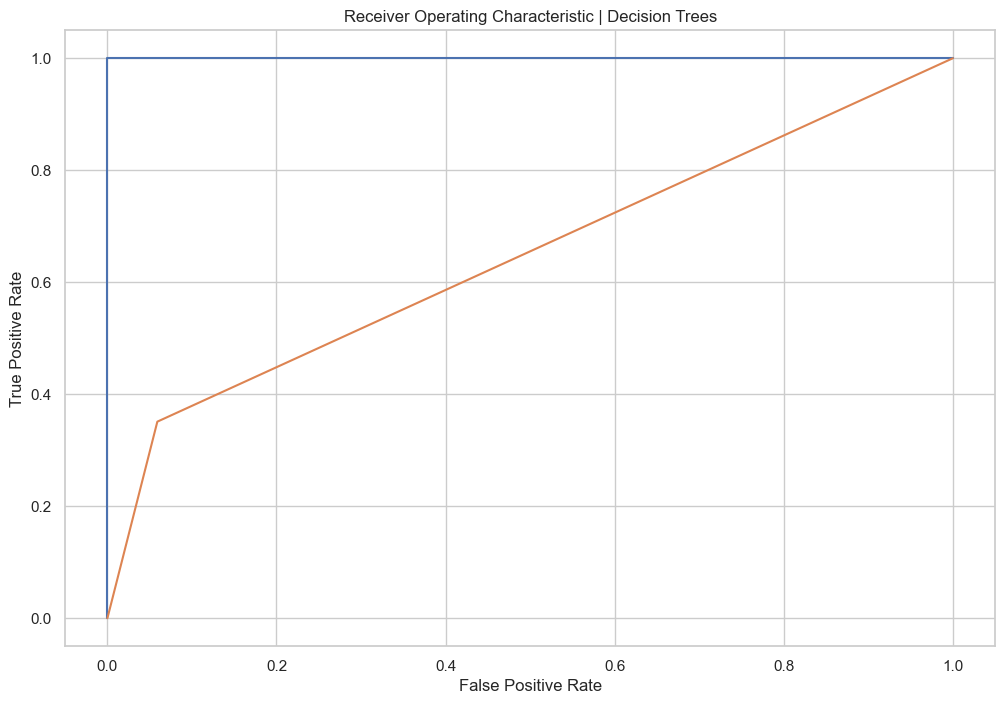

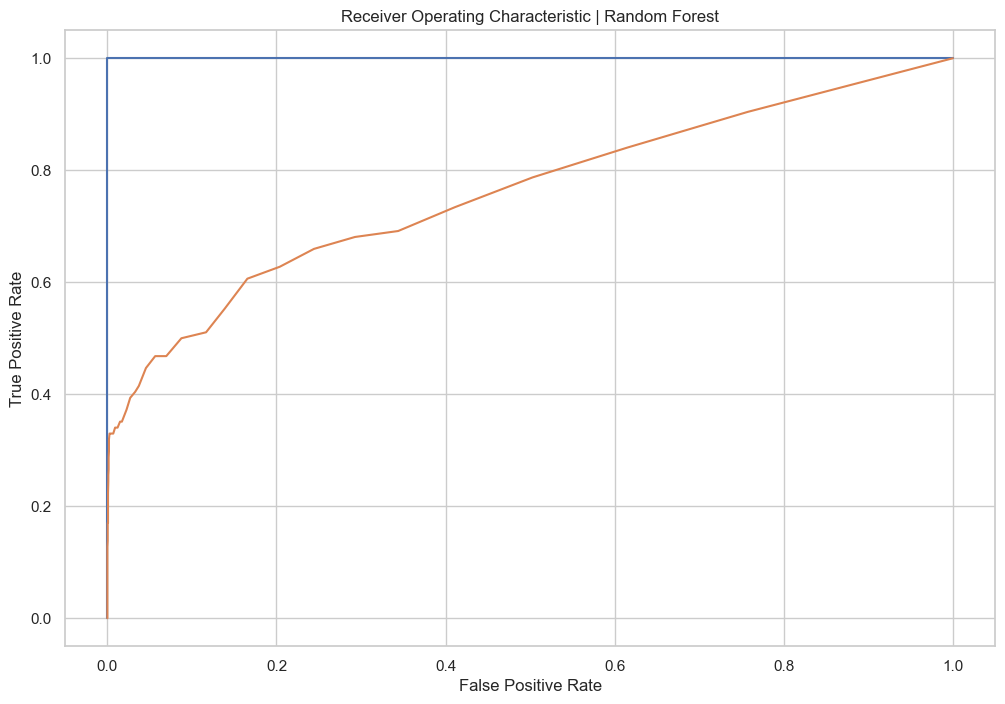

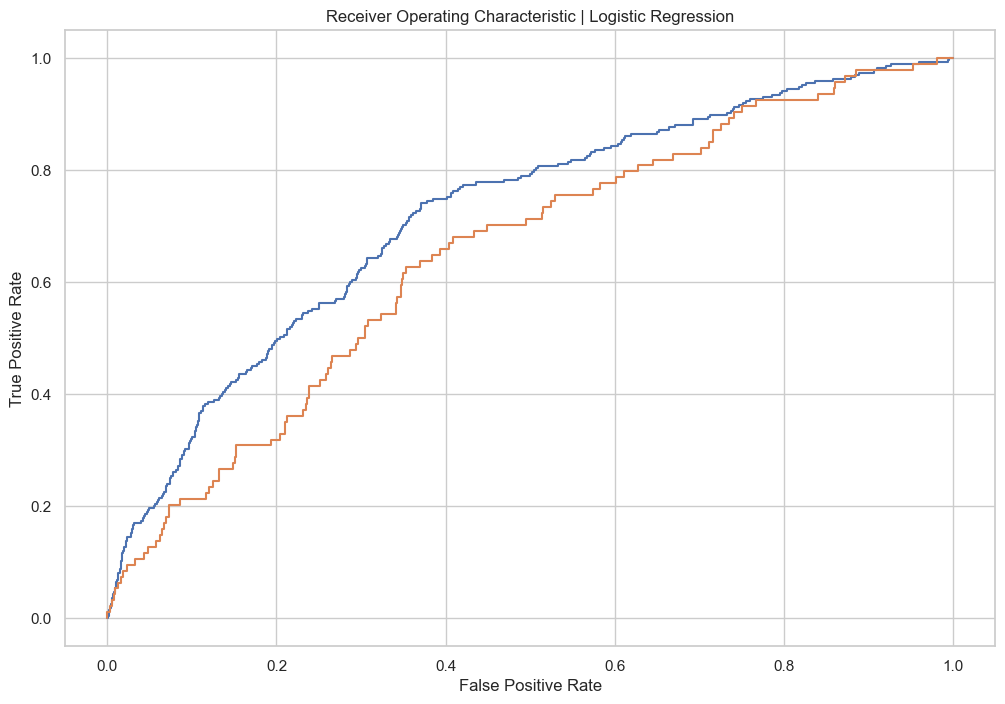

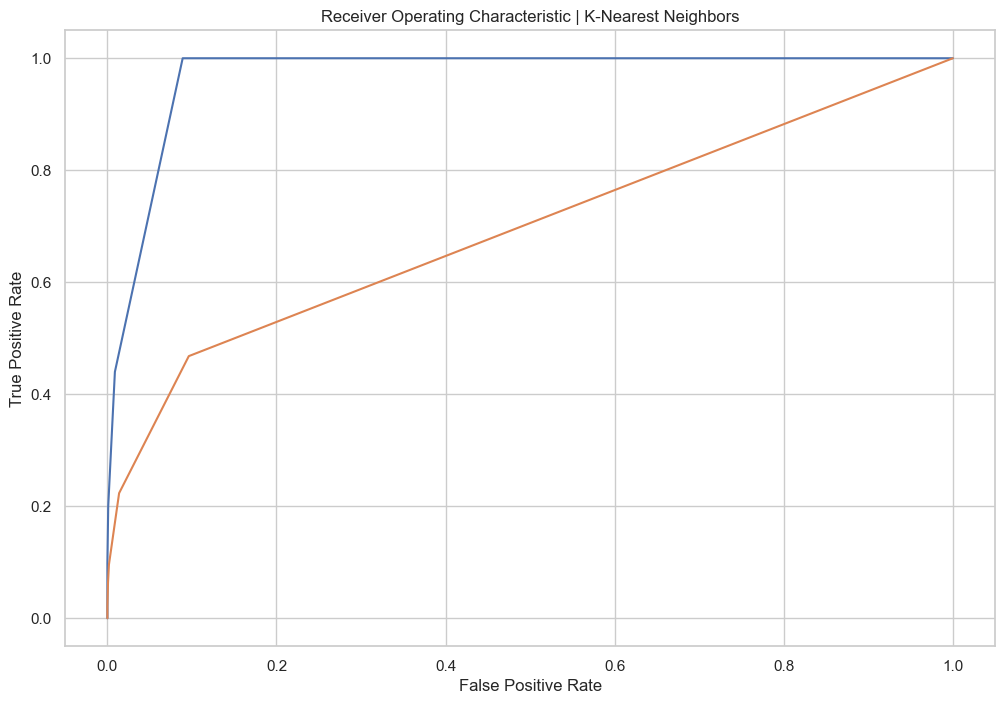

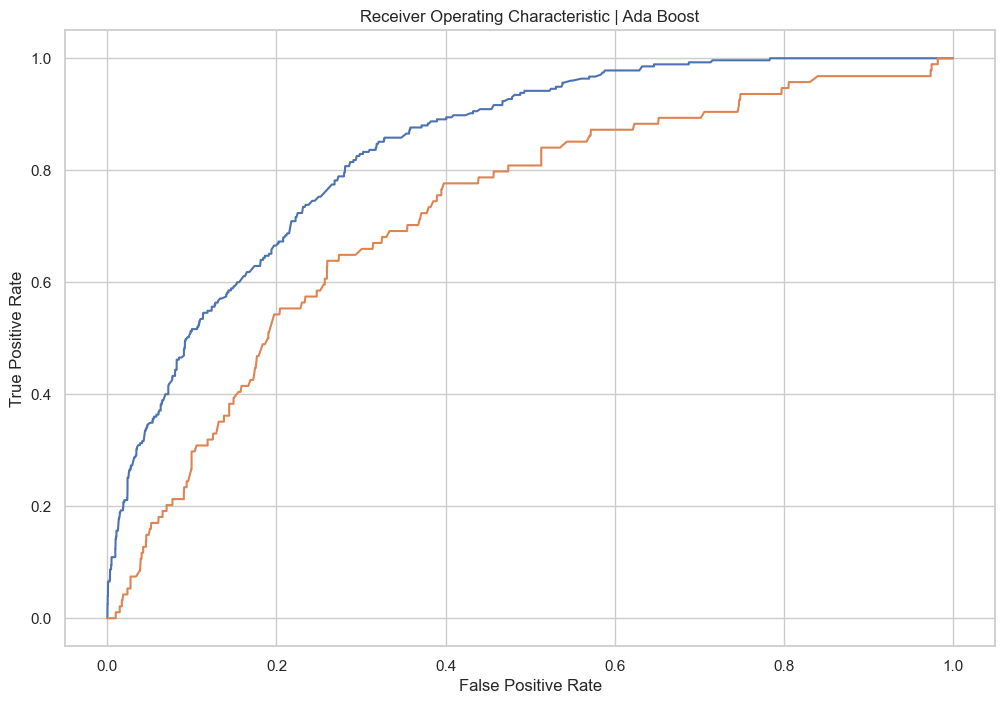

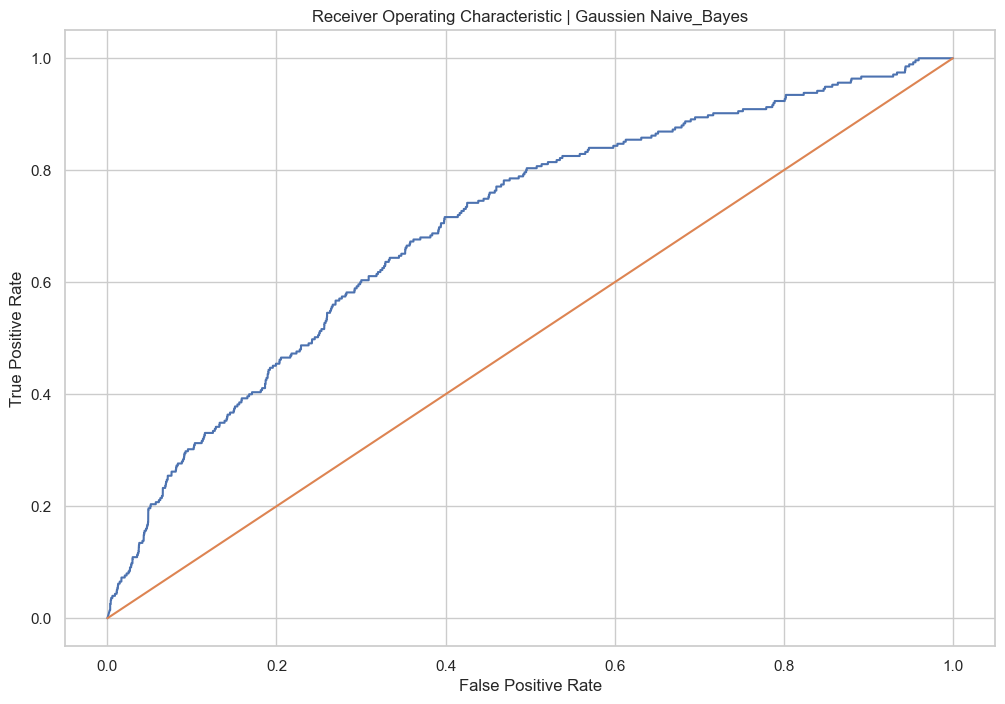

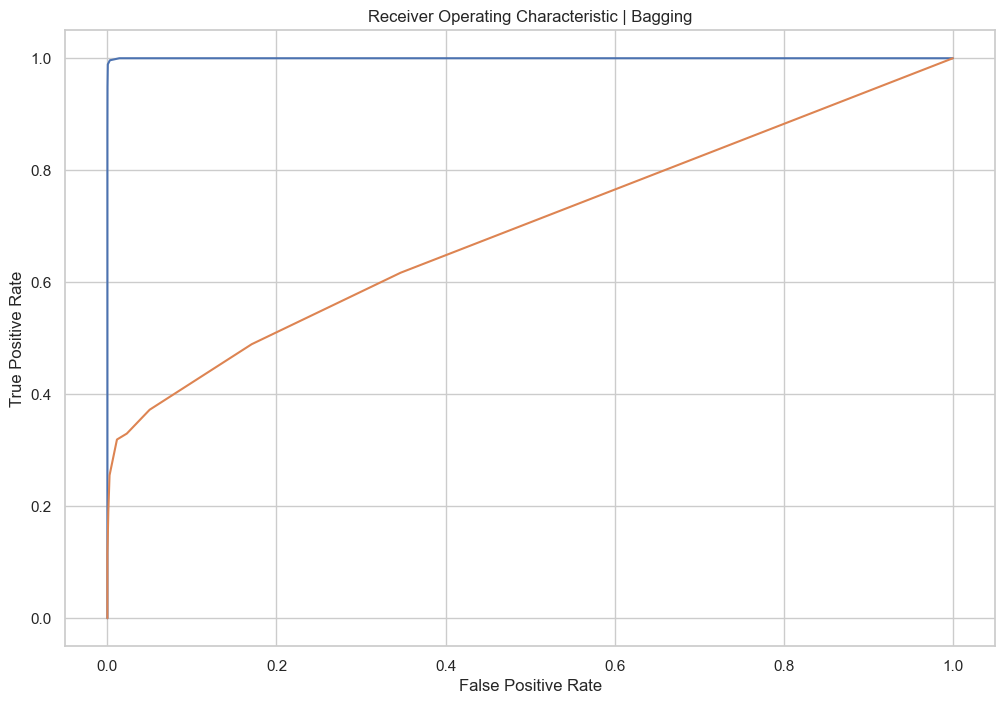

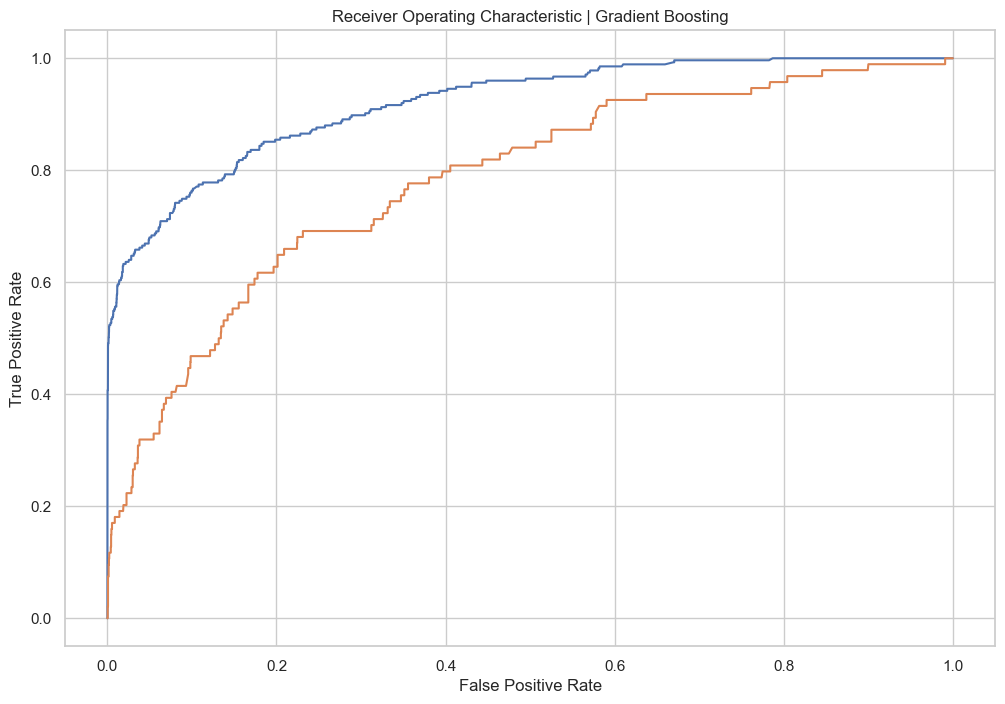

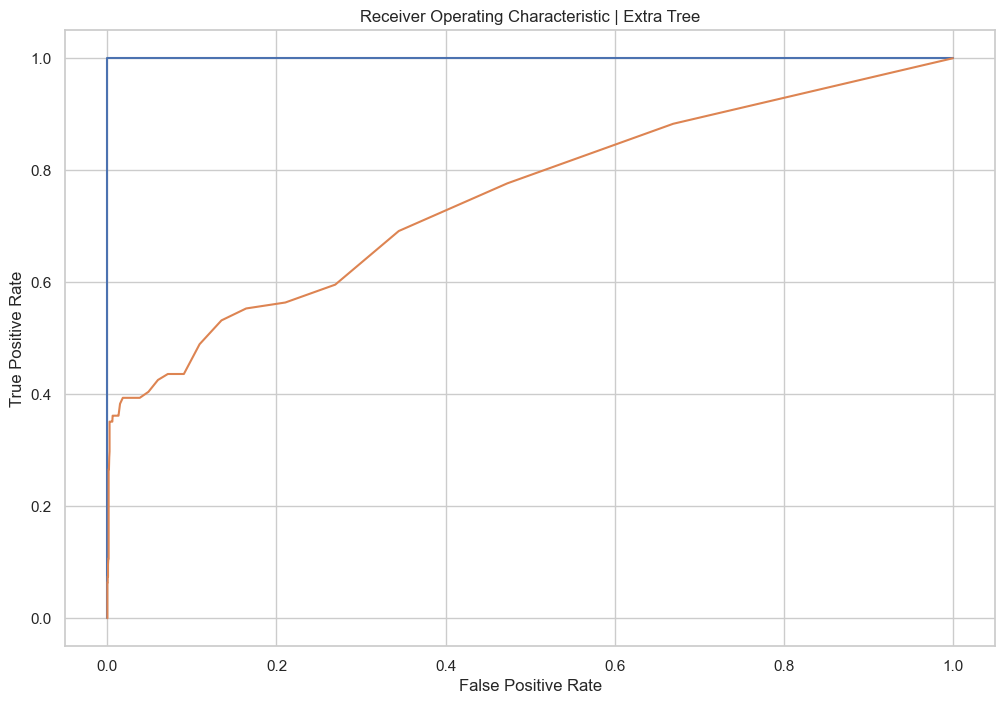

In [64]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y1}')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

Decision Trees


Model performance for Training set


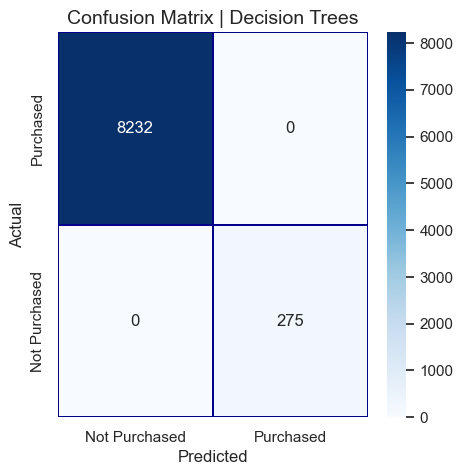

------------------------------------------------------------------------------------------


Model performance for Test set


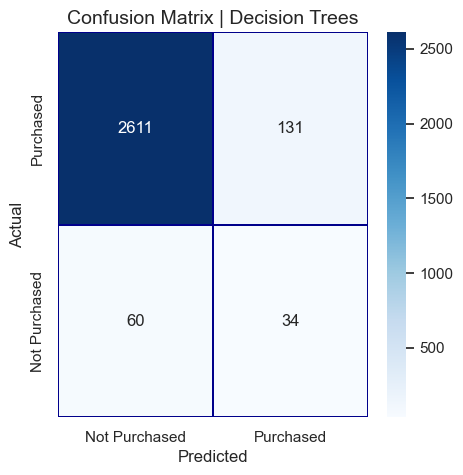

******************************************************************************************


Random Forest


Model performance for Training set


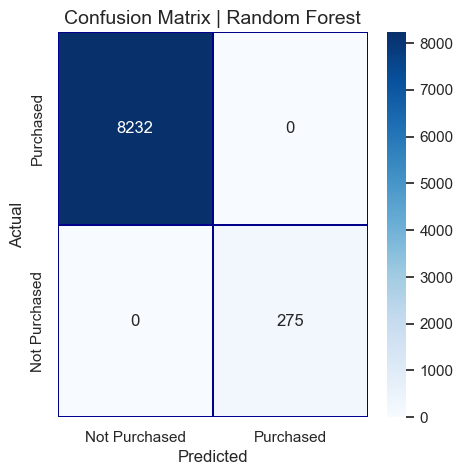

------------------------------------------------------------------------------------------


Model performance for Test set


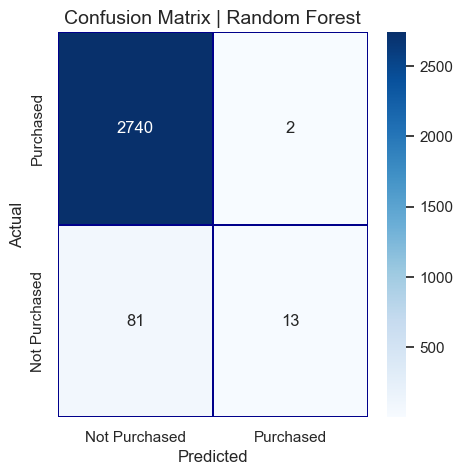

******************************************************************************************


Logistic Regression


Model performance for Training set


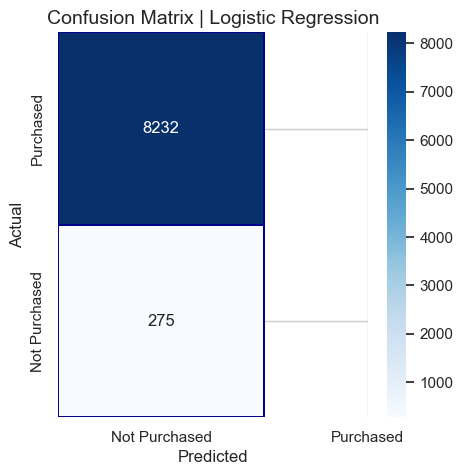

------------------------------------------------------------------------------------------


Model performance for Test set


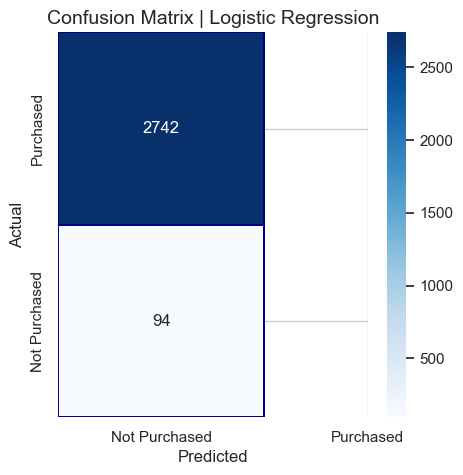

******************************************************************************************


K-Nearest Neighbors


Model performance for Training set


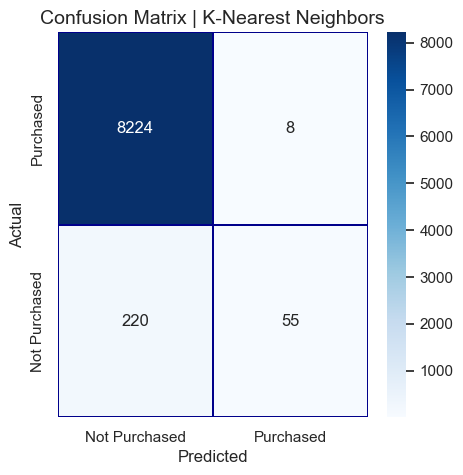

------------------------------------------------------------------------------------------


Model performance for Test set


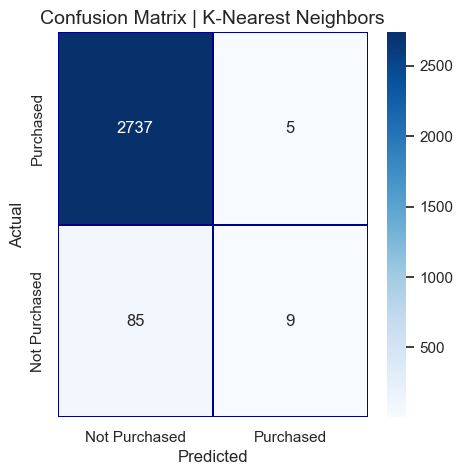

******************************************************************************************


Ada Boost


Model performance for Training set


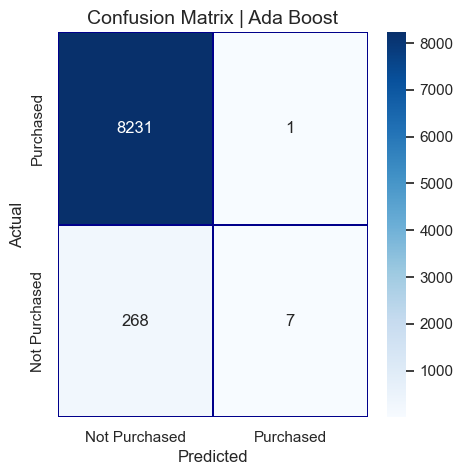

------------------------------------------------------------------------------------------


Model performance for Test set


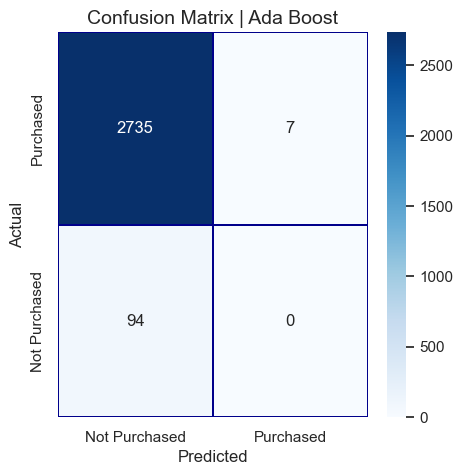

******************************************************************************************


Gaussien Naive_Bayes


Model performance for Training set


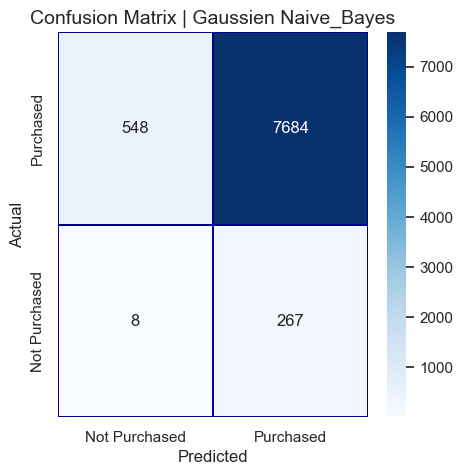

------------------------------------------------------------------------------------------


Model performance for Test set


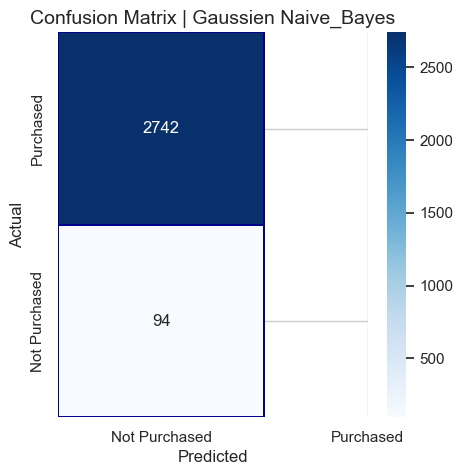

******************************************************************************************


Bagging


Model performance for Training set


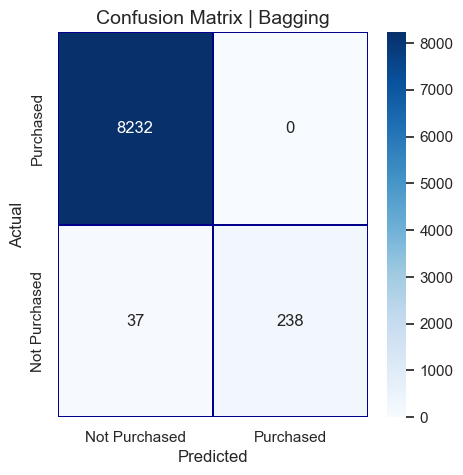

------------------------------------------------------------------------------------------


Model performance for Test set


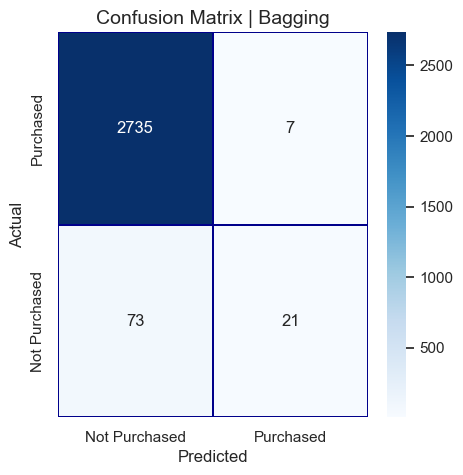

******************************************************************************************


Gradient Boosting


Model performance for Training set


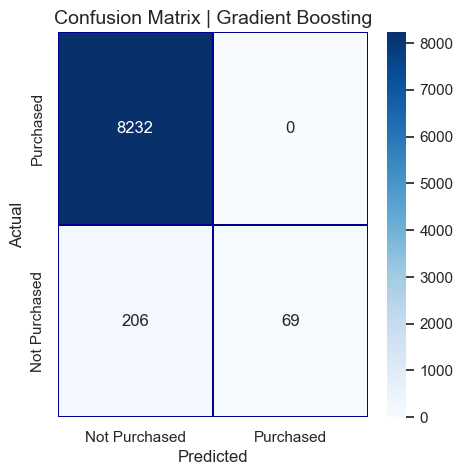

------------------------------------------------------------------------------------------


Model performance for Test set


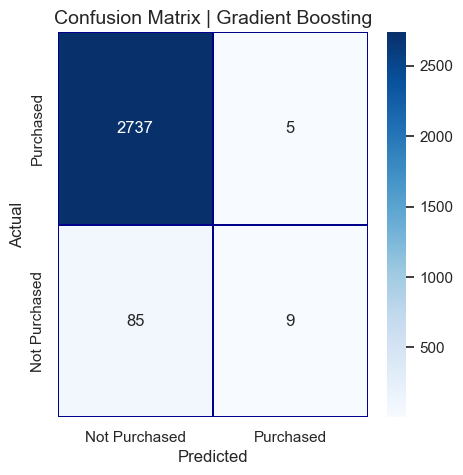

******************************************************************************************


Extra Tree


Model performance for Training set


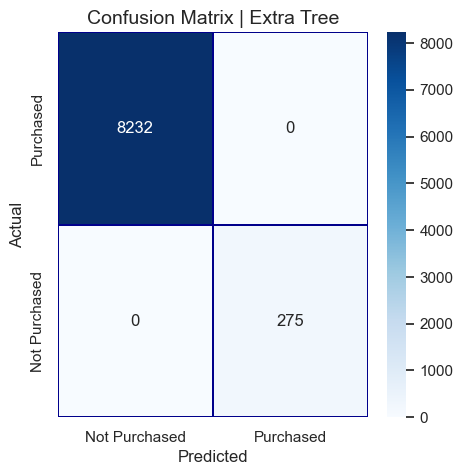

------------------------------------------------------------------------------------------


Model performance for Test set


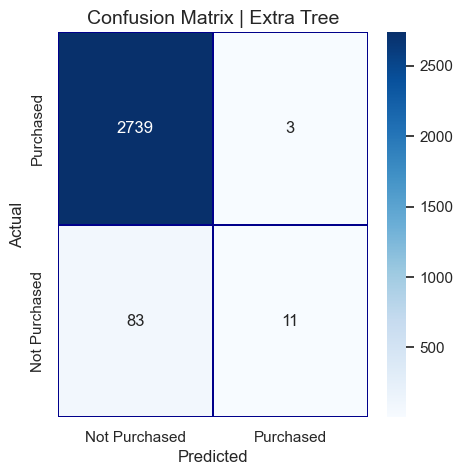

******************************************************************************************




In [65]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    #"Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()

}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    # model_train_accuracy = accuracy_score(y_train, y_train_pred)
    # model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    # model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    # model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

#     # Initialize plot
#     fig = plt.figure(figsize=(12,8))
#     plt.title('Receiver Operating Characteristic')
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")

#     # Predicts X_test using model
#     y_train_pred = model.predict_proba(X_train)
#     y_train_pred = [p[1] for p in y_train_pred]

#     # Calculates ROC curve
#     fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

#     # Calculates AUROC
#     auroc = round(auc(fpr, tpr), 3)

#     # Plots ROC curve and labels with AUROC
#     plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
#     #auroc_results['Decision Tree'] = auroc


#     # Test Set Performance
#     model_test_accuracy = accuracy_score(y_test, y_test_pred)
#     model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
#     model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
#     model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
#     #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))

#     # Predicts X_test using model
#     y_test_pred = model.predict_proba(X_test)
#     y_test_pred = [p[1] for p in y_test_pred]

#     # Calculates ROC curve
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

#     # Calculates AUROC
#     auroc = round(auc(fpr, tpr), 3)

#     # Plots ROC curve and labels with AUROC
#     plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))






    print(list(models.keys())[i])
    print('\n')

    print('Model performance for Training set')

    # Confusion Matrix
    CMTD = confusion_matrix(y_train,y_train_pred) # Compare the predicted target varaible to the orginal target variable
    CMTD = pd.crosstab(y_train,y_train_pred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(CMTD,
                xticklabels=['Not Purchased', 'Purchased'],
                yticklabels=['Purchased', 'Not Purchased'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt='g')
    plt.title(f'Confusion Matrix | {model_name}', fontsize=14)
    plt.show()

    # print("- Accuracy: {:.4f}".format(model_train_accuracy))
    # print("- Precision: {:.4f}".format(model_train_precision))
    # print("- Recall: {:.4f}".format(model_train_recall))
    # print("- F1 Score: {:.4f}".format(model_train_f1_score))
    # print("- Roc Auc Score: {:.4f}".format(model_train_roc_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')

    # Confusion Matrix
    CMTD = confusion_matrix(y_test,y_test_pred) # Compare the predicted target varaible to the orginal target variable
    CMTD = pd.crosstab(y_test,y_test_pred, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(CMTD,
                xticklabels=['Not Purchased', 'Purchased'],
                yticklabels=['Purchased', 'Not Purchased'],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt='g')
    plt.title(f'Confusion Matrix | {model_name}', fontsize=14)
    plt.show()

    # print("- Accuracy: {:.4f}".format(model_test_accuracy))
    # print("- Precision: {:.4f}".format(model_test_precision))
    # print("- Recall: {:.4f}".format(model_test_recall))
    # print("- F1 Score: {:.4f}".format(model_test_f1_score))
    # print("- Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))

    print('**'*45)
    print('\n')

In [66]:
# feature_importance = rf.feature_importances_
# sorted_idx = feature_importance.argsort()[::-1]  # Sort by importance in descending order
# feature_names = df.columns[sorted_idx]  # Get corresponding feature names
# feature_importance_sorted = feature_importance[sorted_idx]  # Get sorted importance values
# cleaned_df_X = cleaned_df_X.drop(columns = uid_columns)
# # Plot feature importance graph with colors
# plt.figure(figsize=(10, 6))
# plt.barh(feature_names, feature_importance_sorted, color

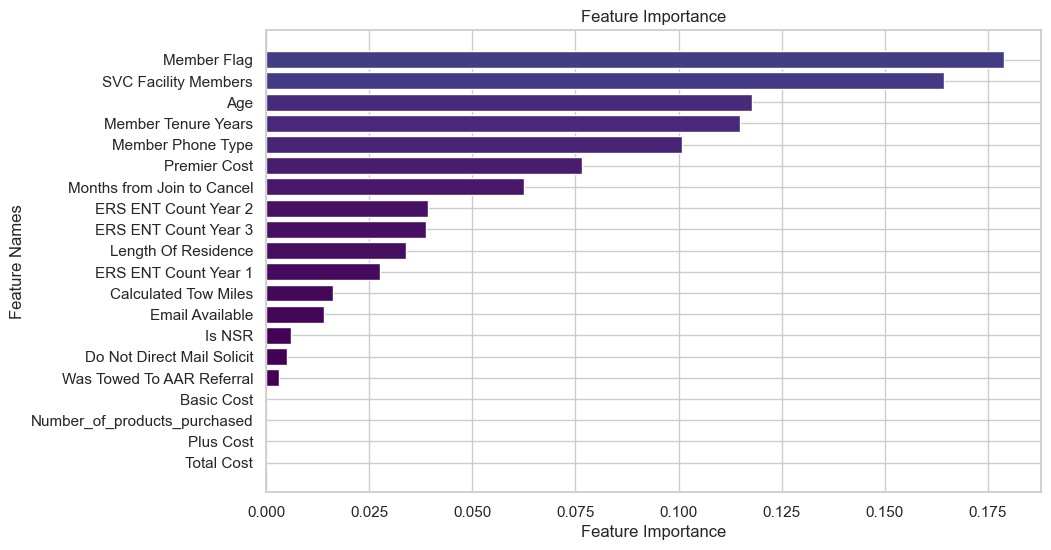

In [67]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

# Get feature importance
feature_importance = rf.feature_importances_
sorted_idx = feature_importance.argsort()[::1]  # Sort by importance in descending order
feature_names = cleaned_df_X.columns[sorted_idx]  # Get corresponding feature names
feature_importance_sorted = feature_importance[sorted_idx]  # Get sorted importance values

# Plot feature importance graph
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance_sorted, color=plt.cm.viridis(feature_importance_sorted))  # Use Blues colormap
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance')
plt.show()

## # Product 1: FSV CMSI Flag

In [68]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y1, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : FSV CMSI Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9200
- Precision: 0.9514
- Recall: 0.9200
- F1 Score: 0.9340
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : FSV CMSI Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Te

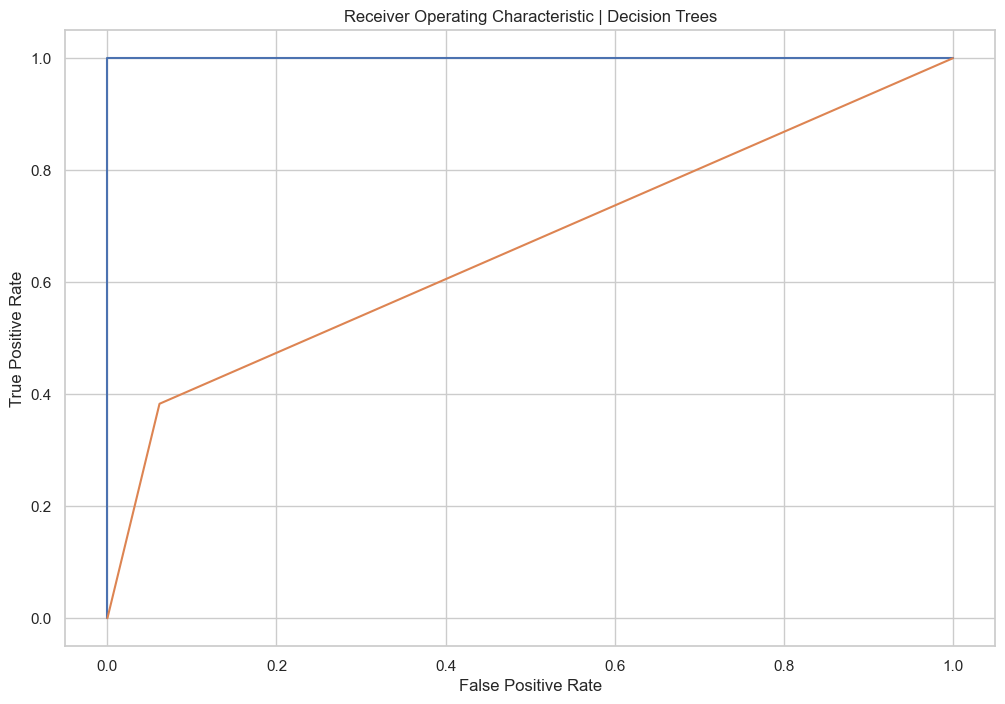

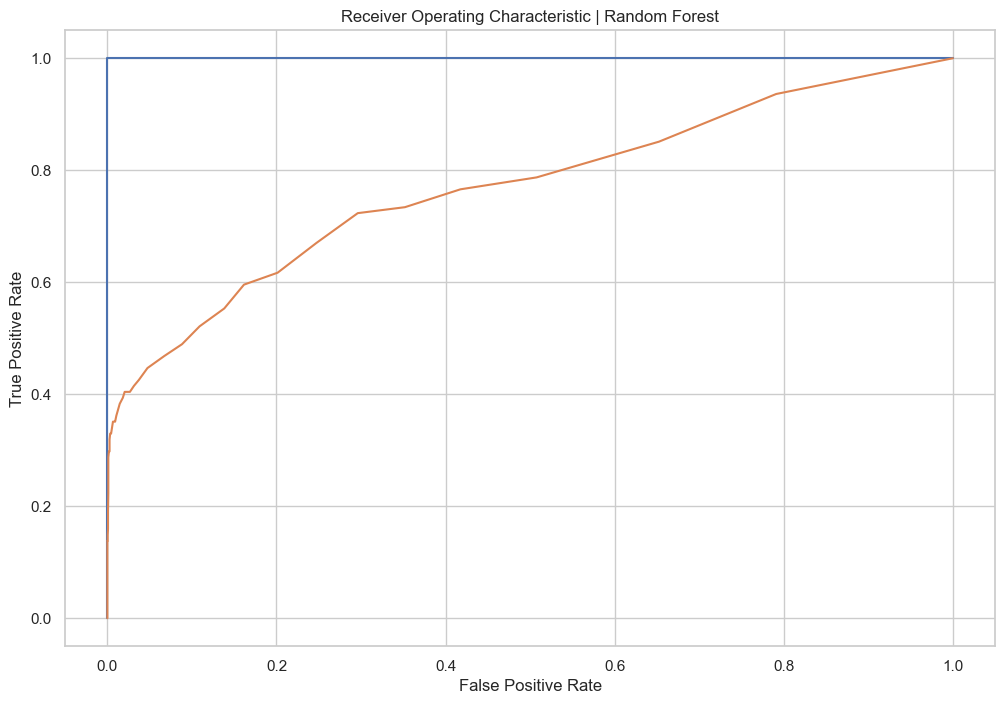

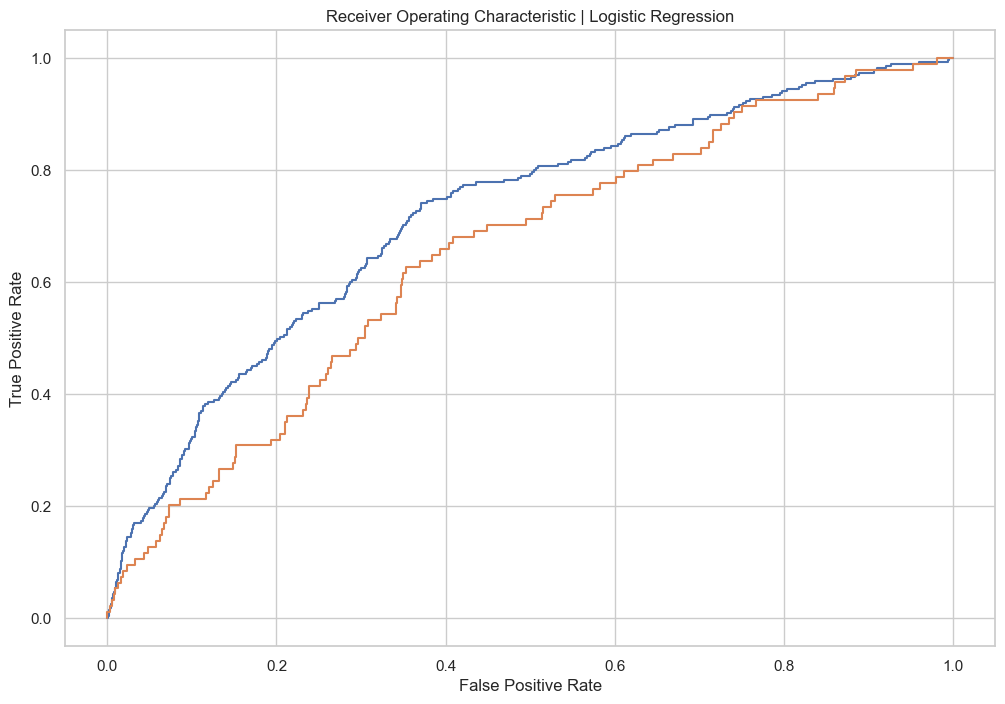

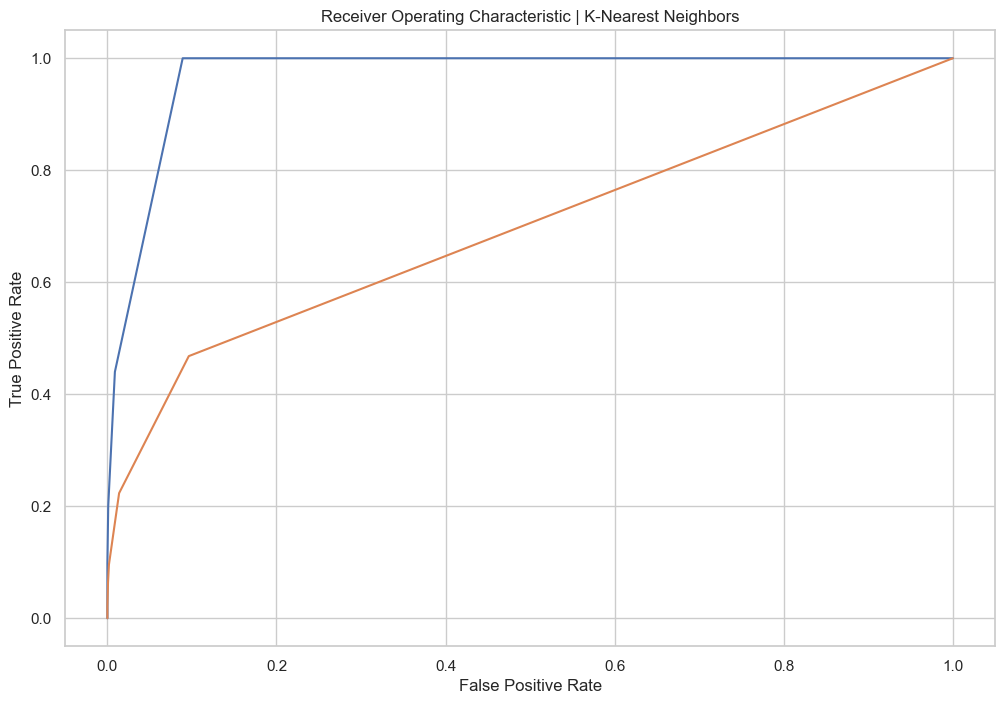

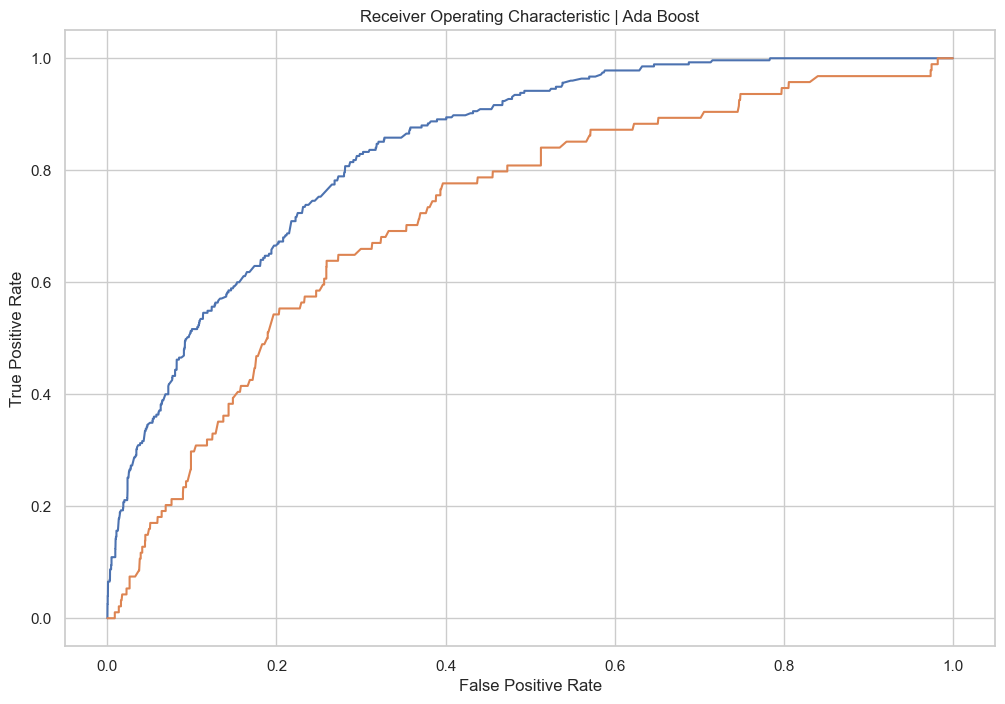

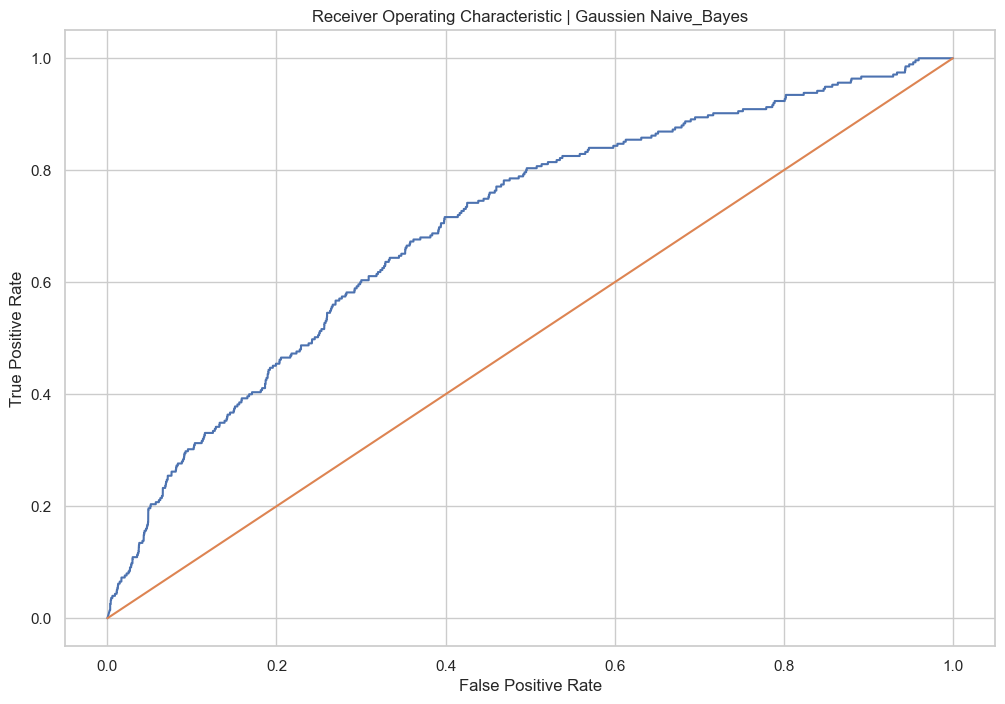

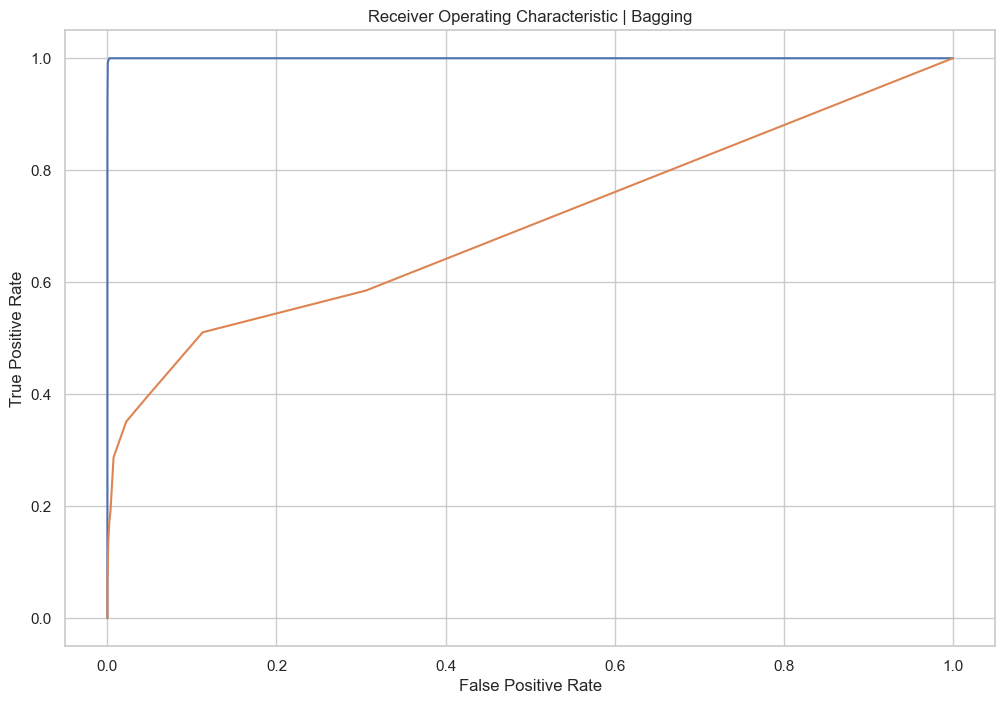

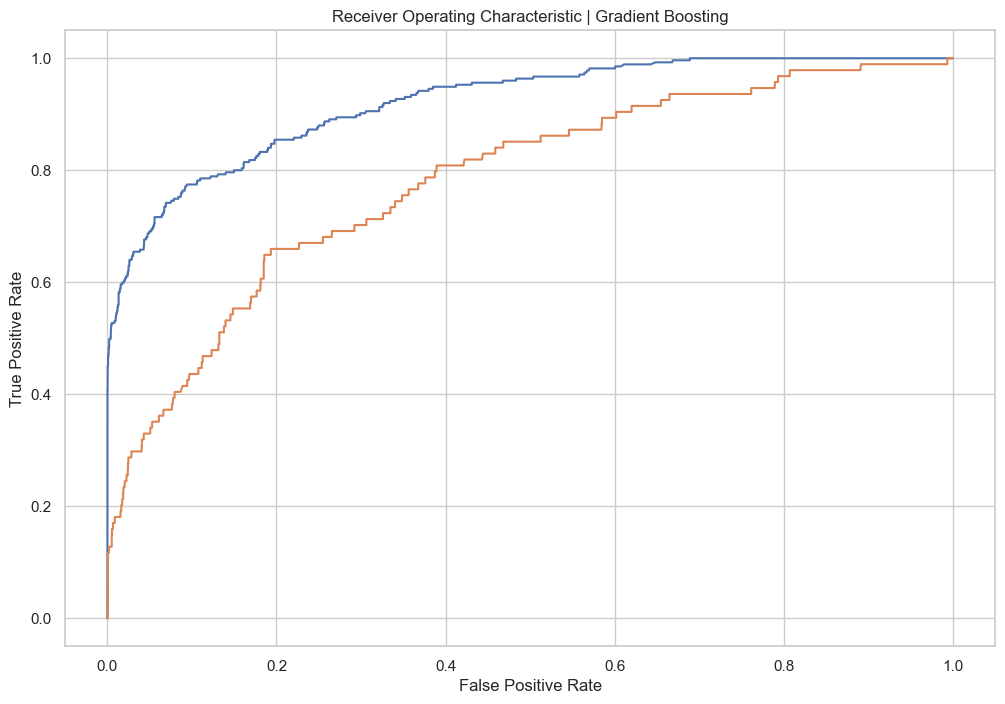

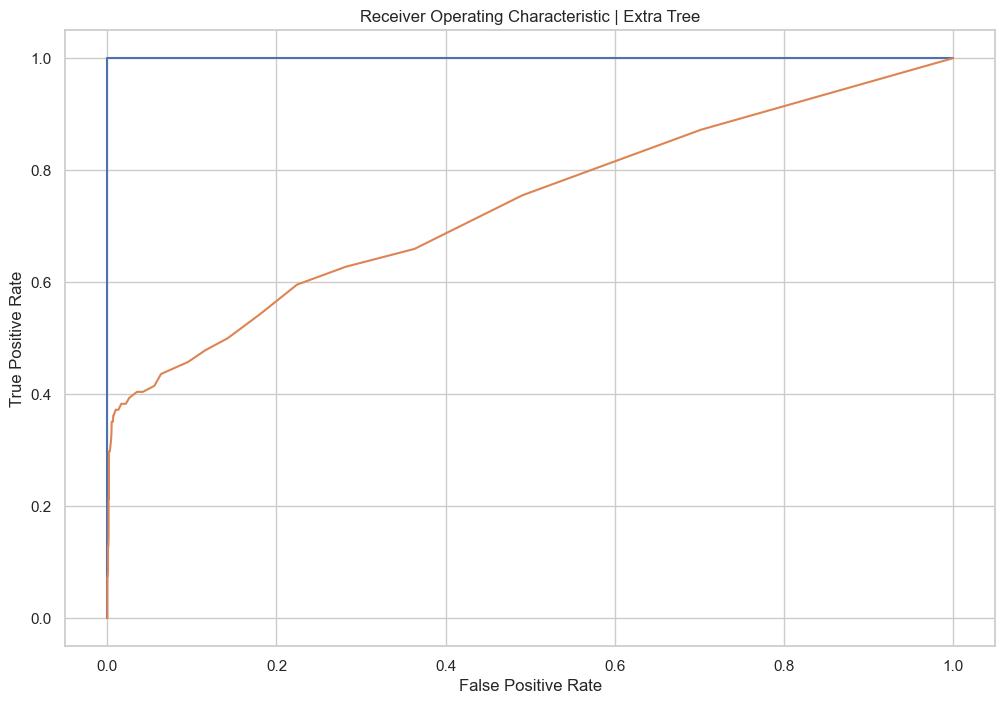

In [69]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y1}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

## # Product 2 : FSV Credit Card Flag

In [70]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y2, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : FSV Credit Card Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9196
- Precision: 0.9172
- Recall: 0.9196
- F1 Score: 0.9184
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : FSV Credit Card Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model perf

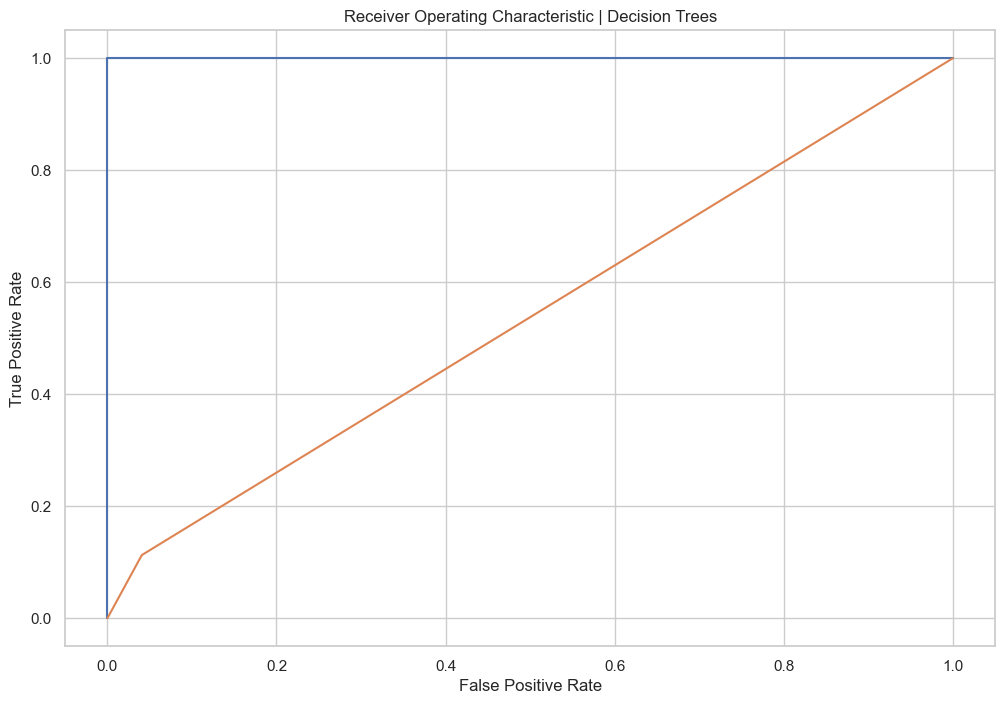

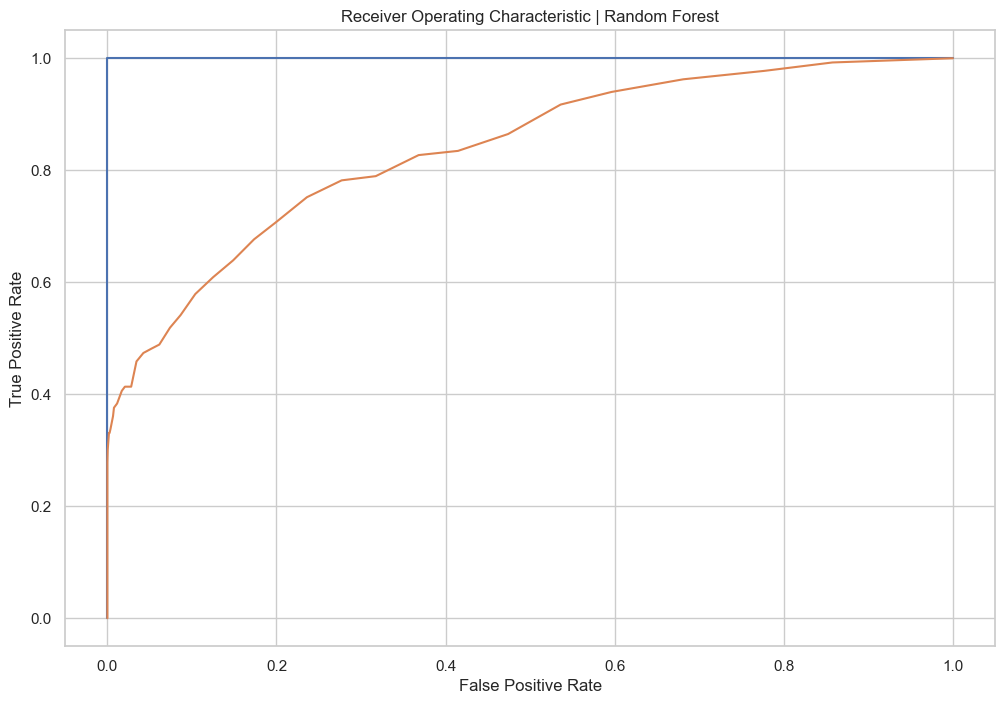

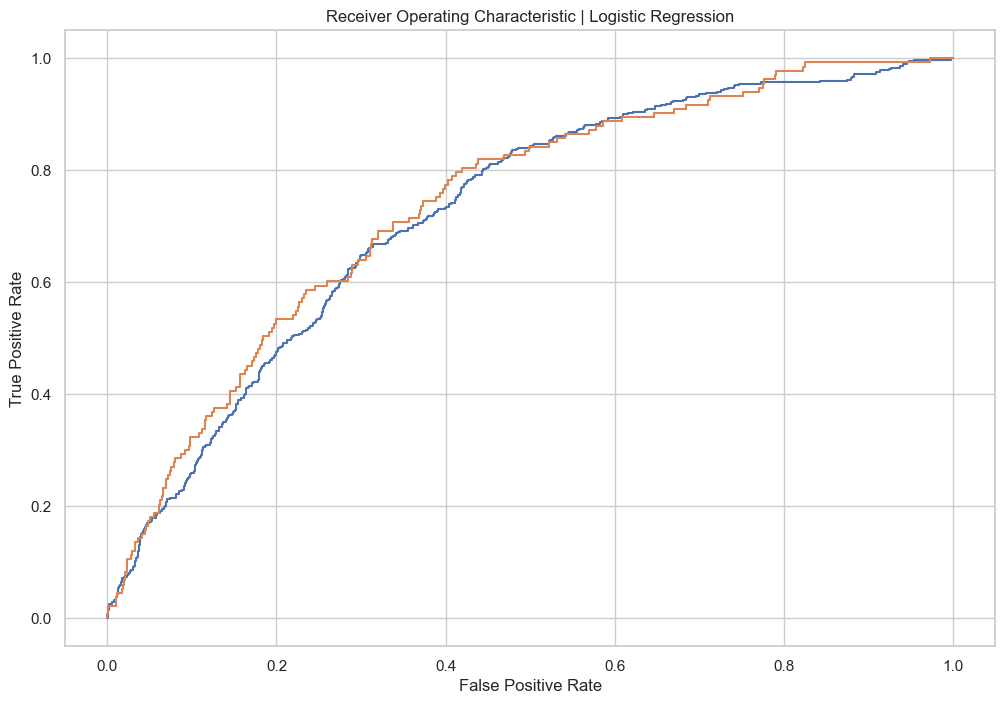

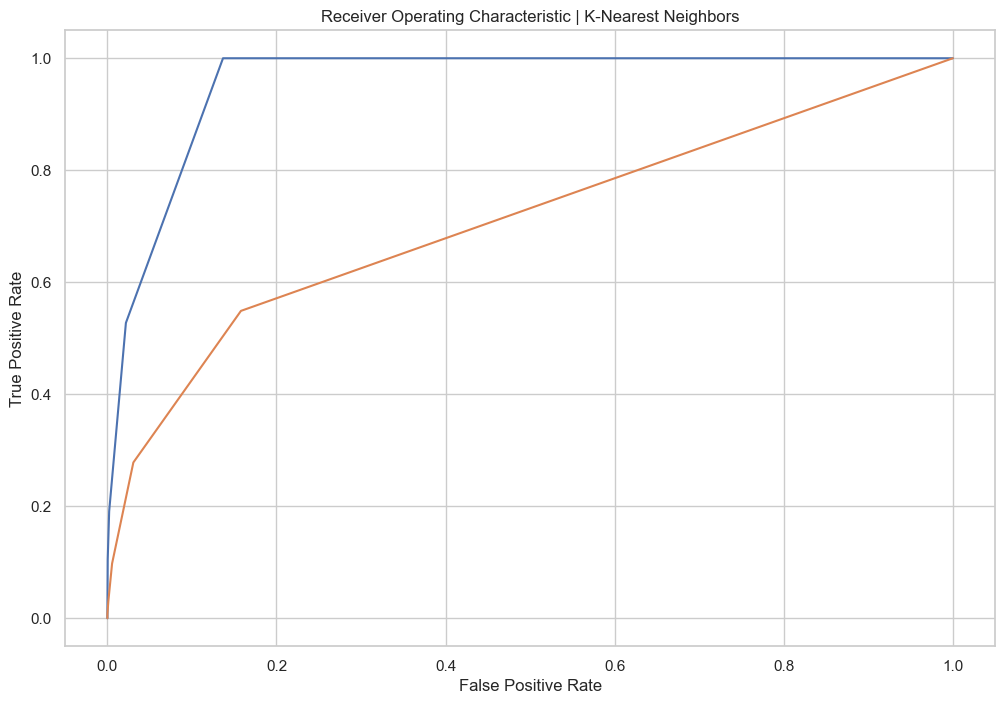

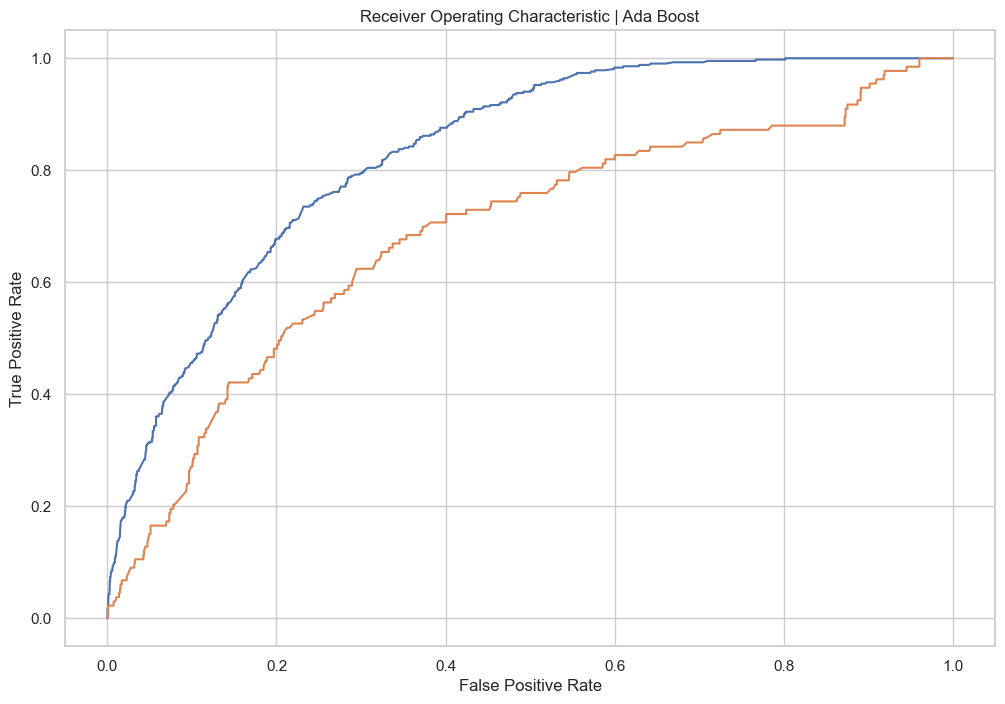

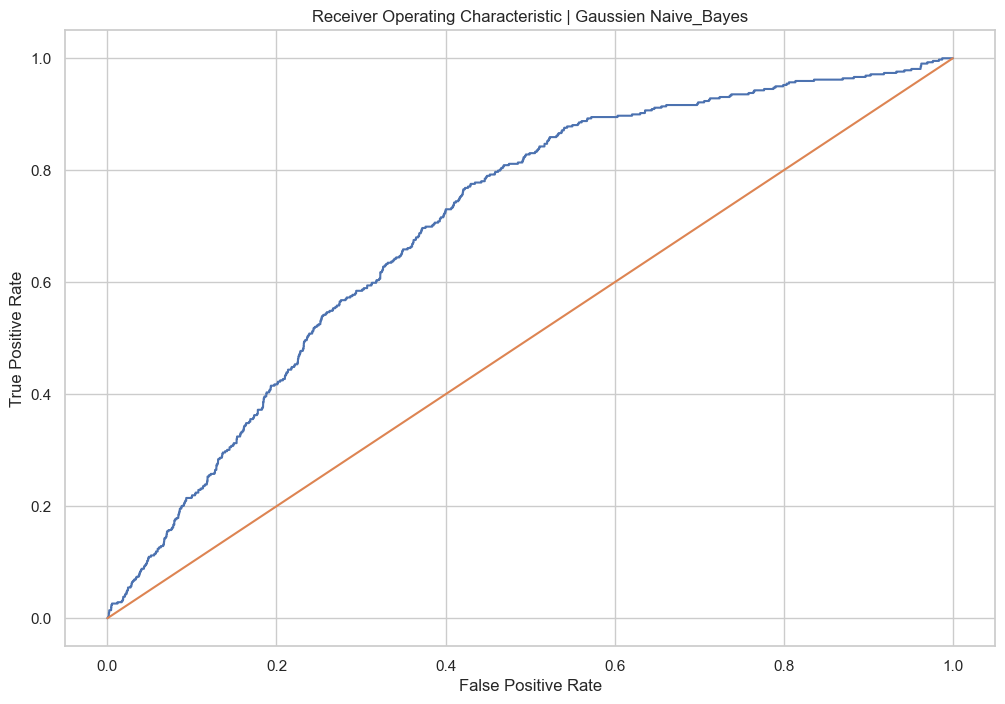

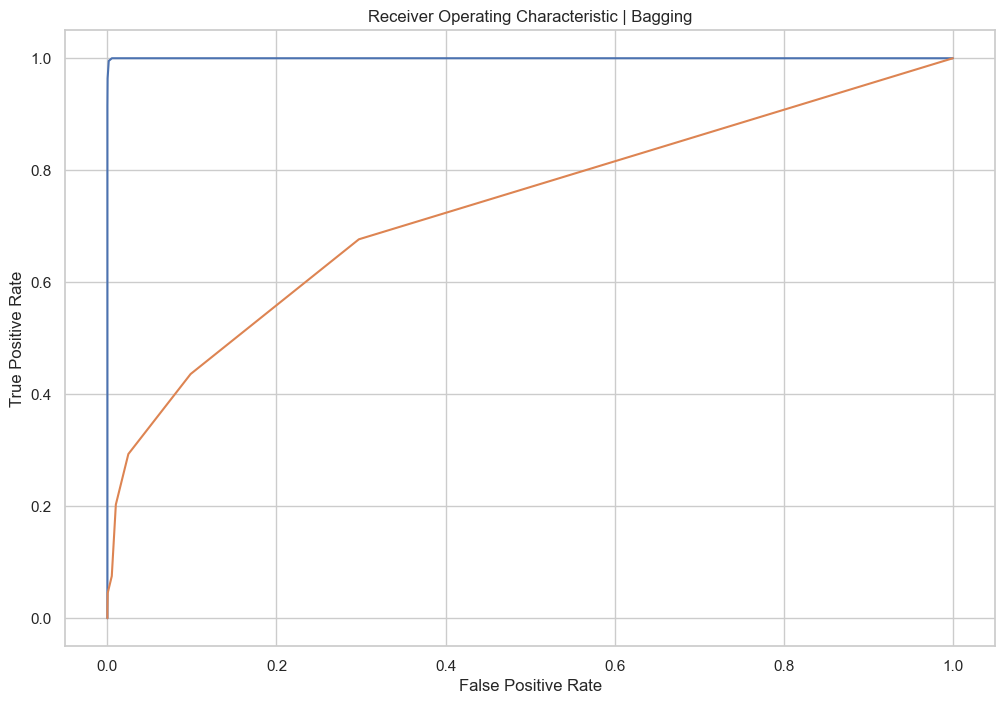

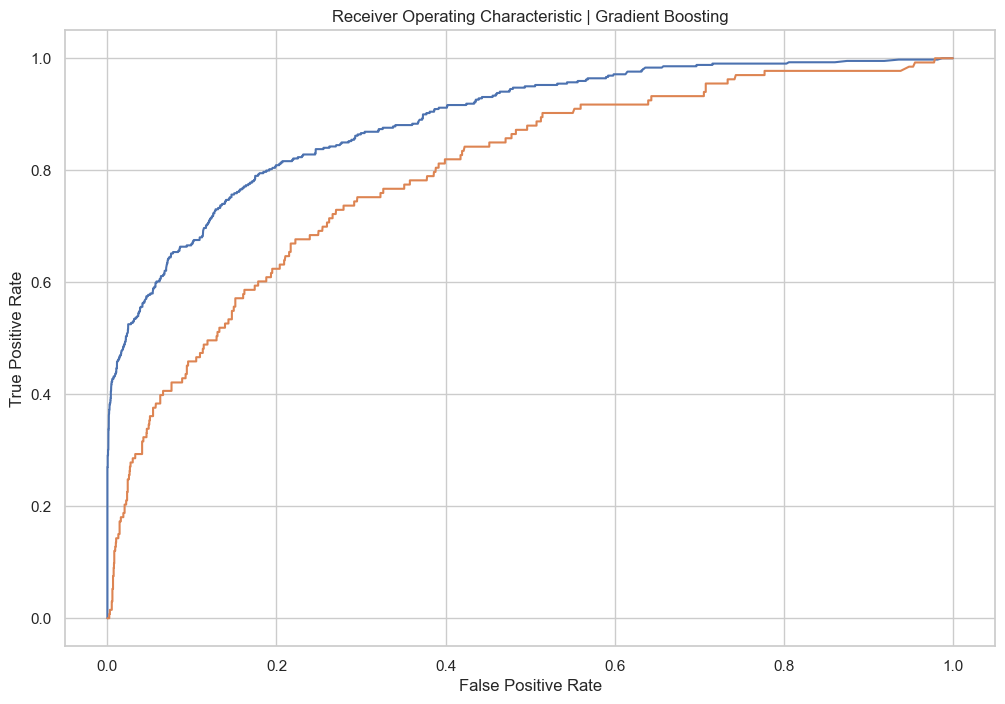

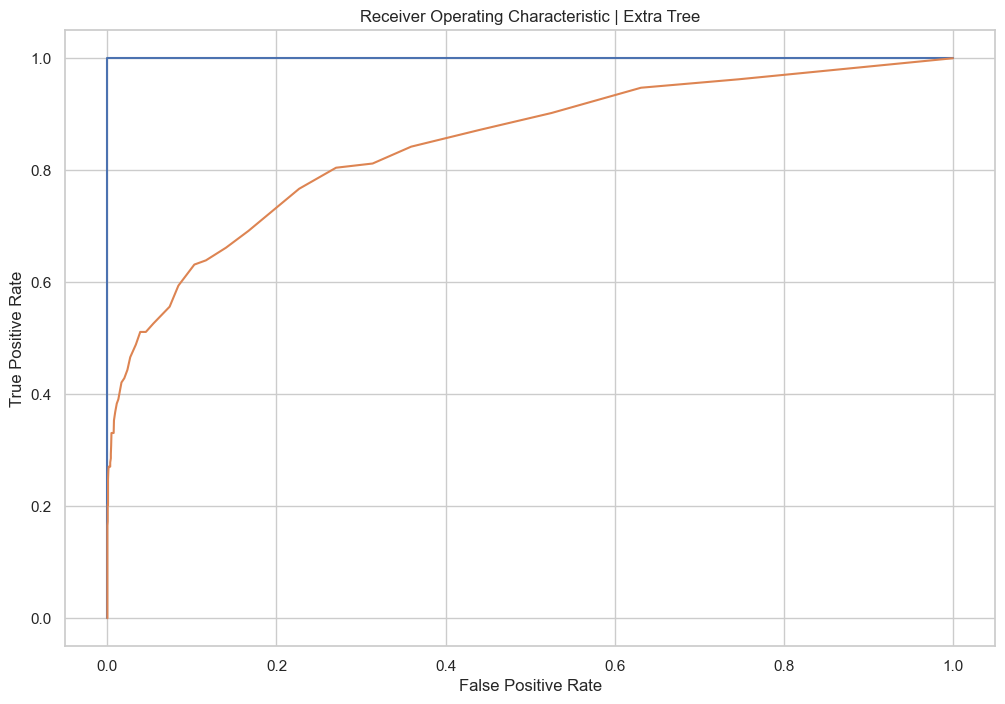

In [71]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y2}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [72]:
## product 3: FSV Home Equity Flag

In [73]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y3, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : FSV Home Equity Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9993
- Precision: 0.9993
- Recall: 0.9993
- F1 Score: 0.9993
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : FSV Home Equity Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model perf

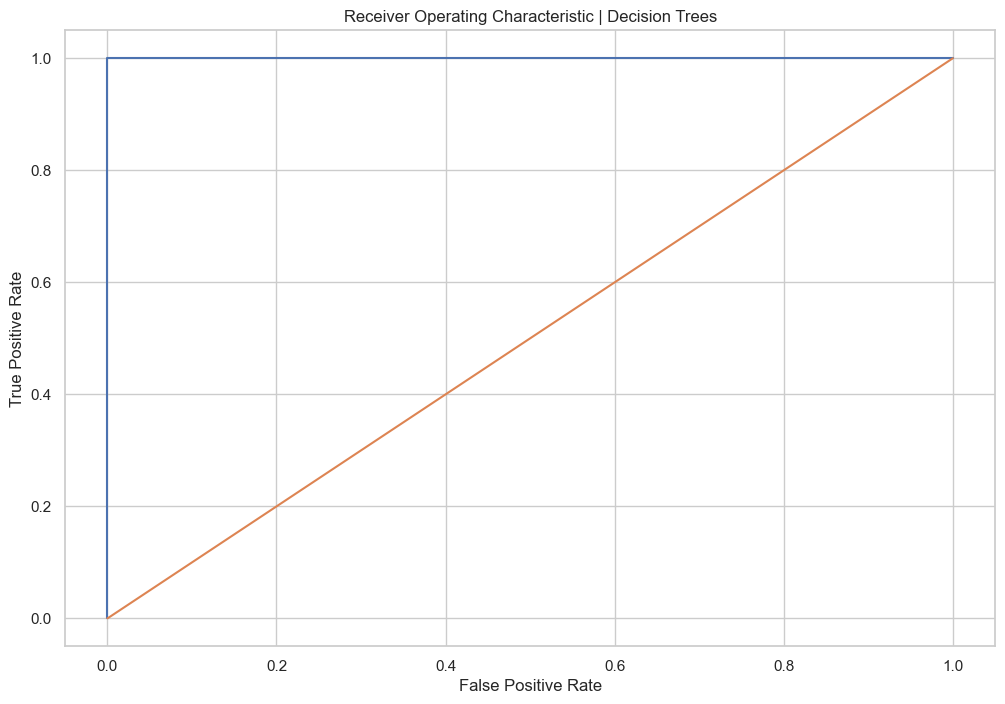

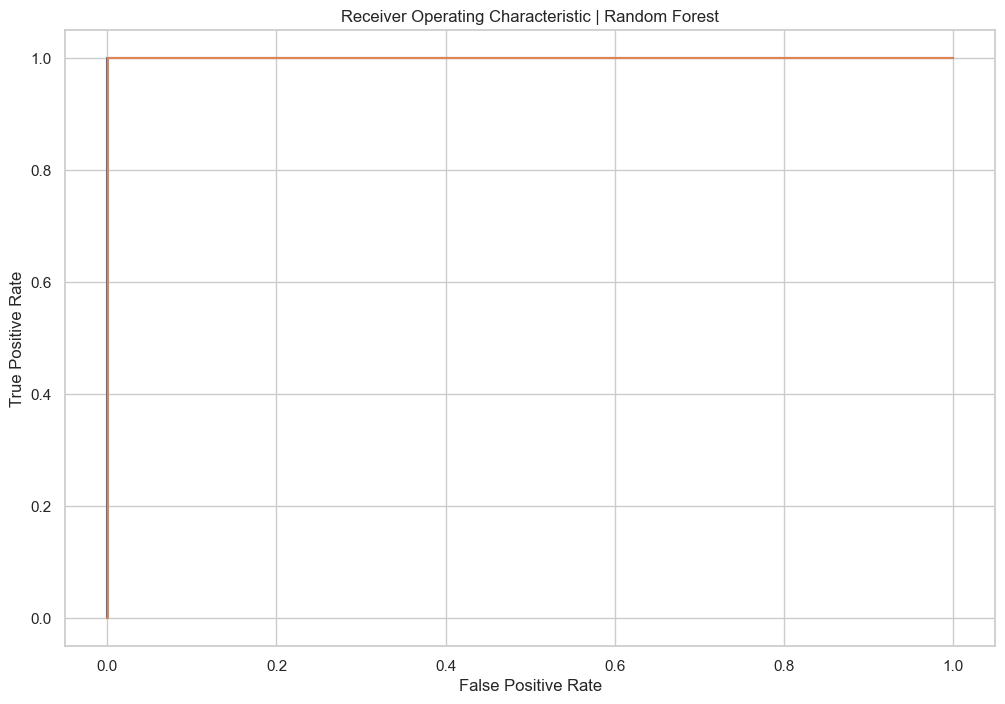

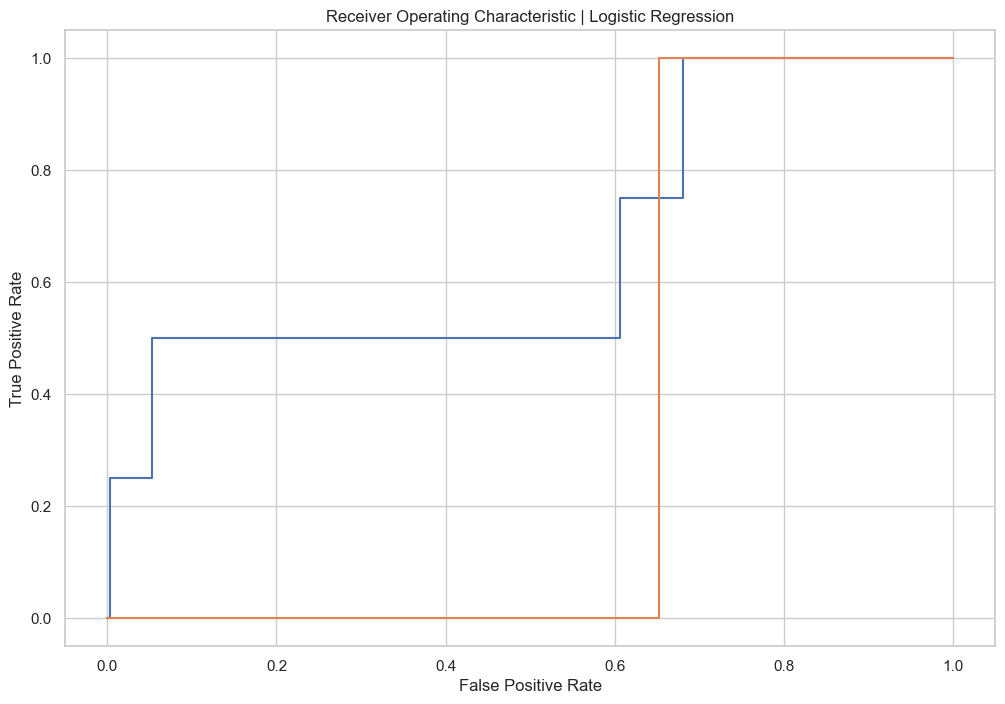

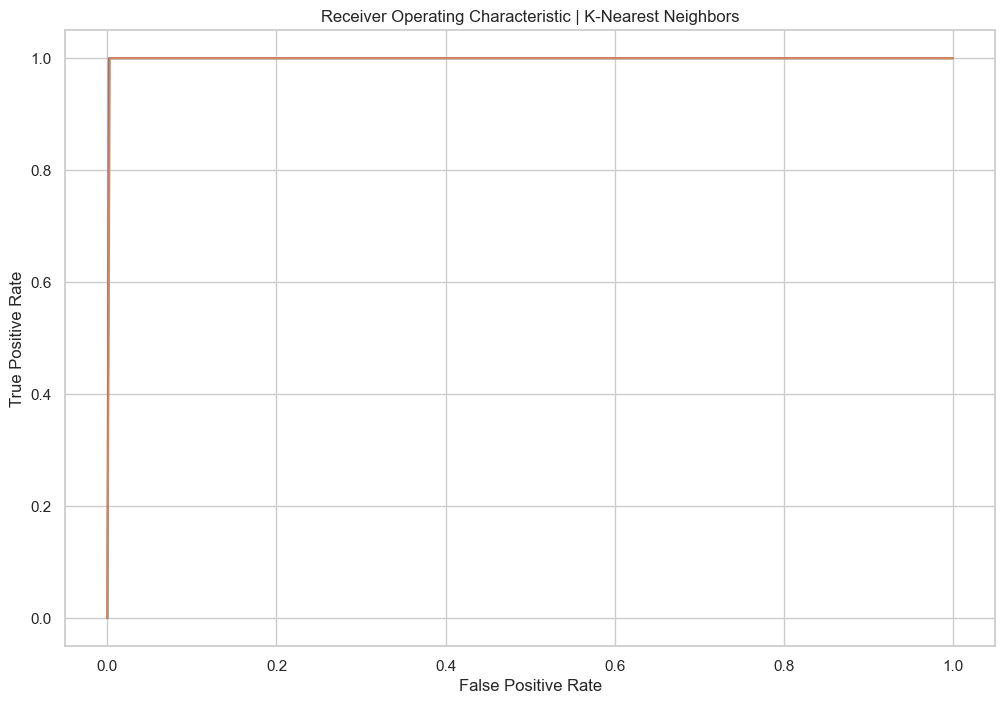

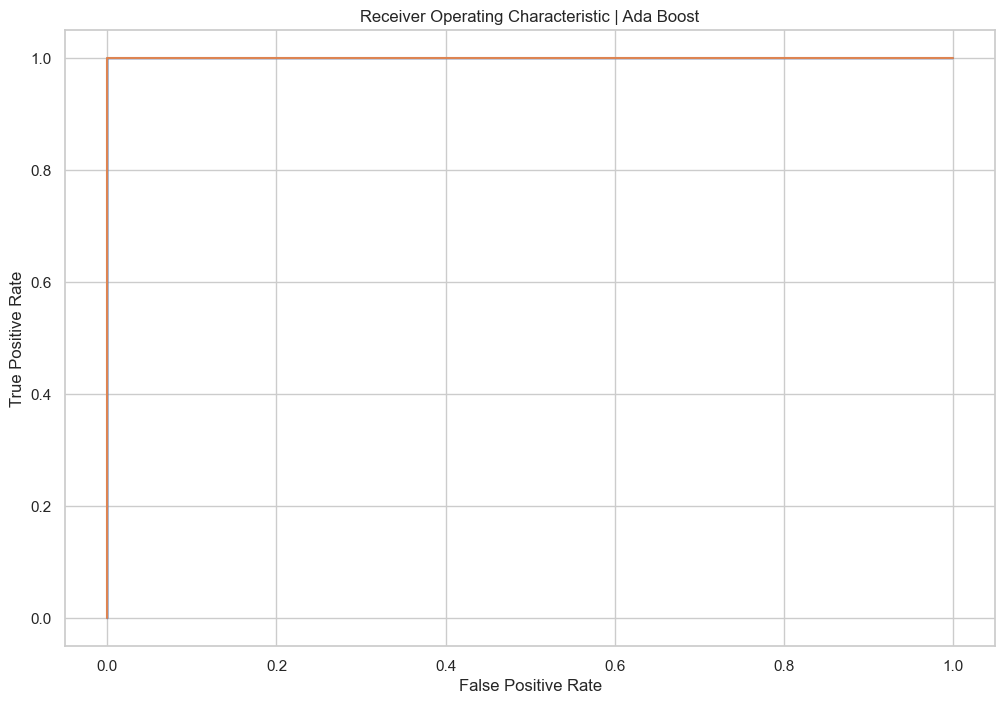

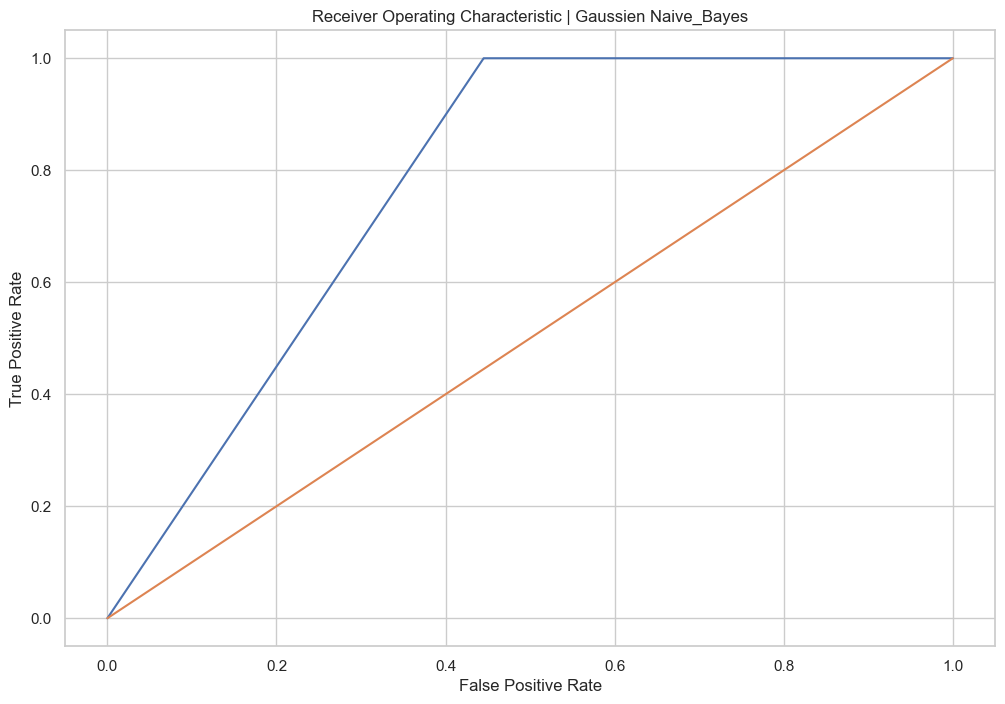

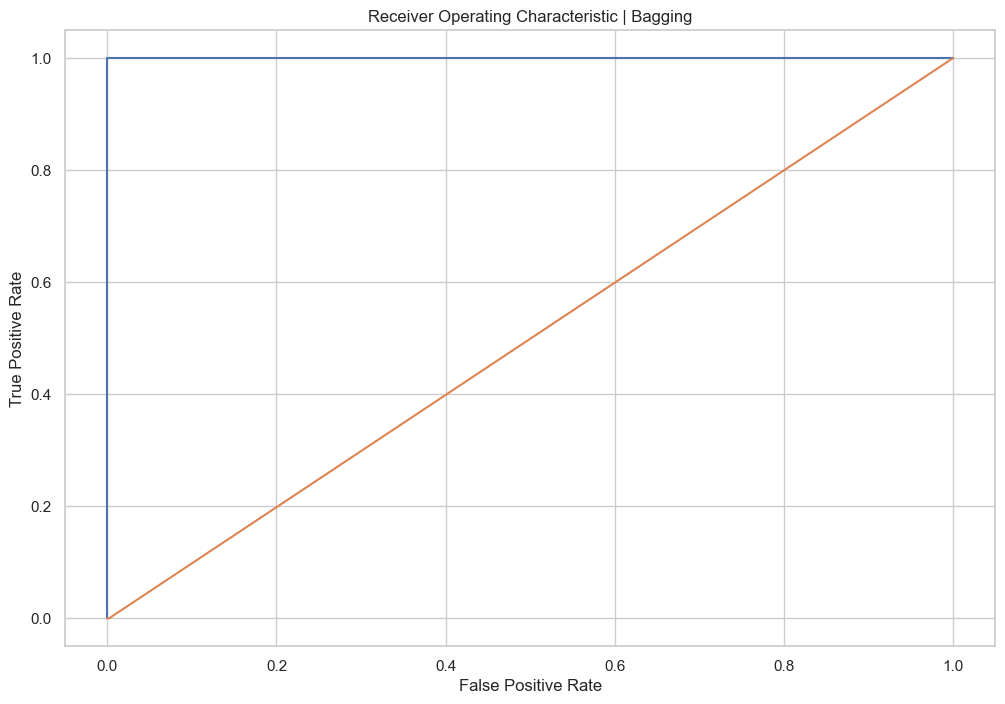

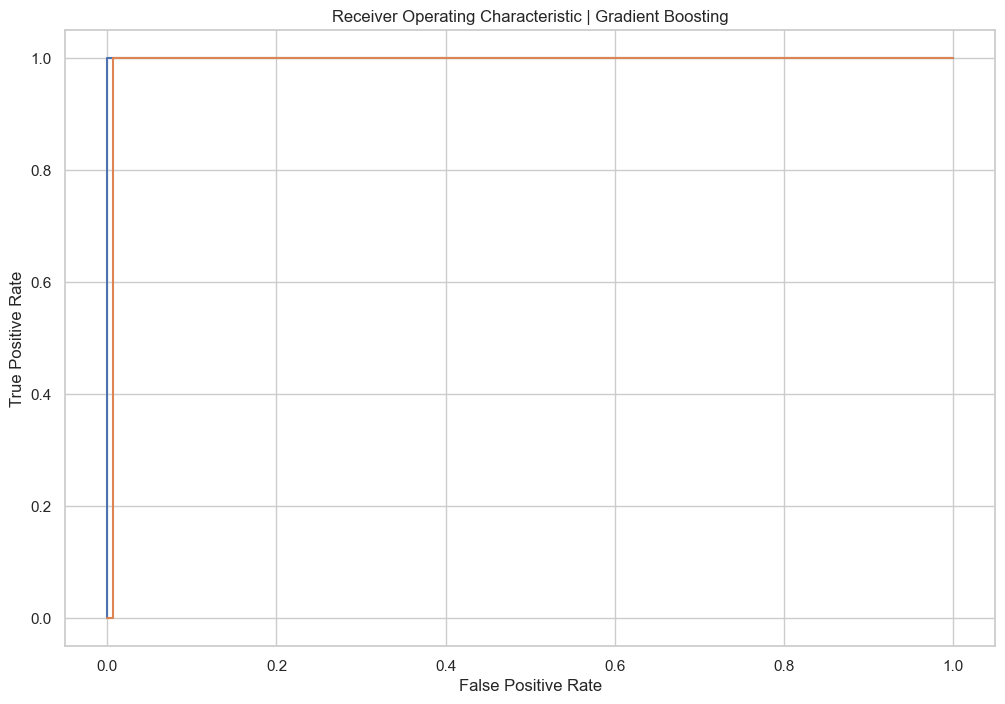

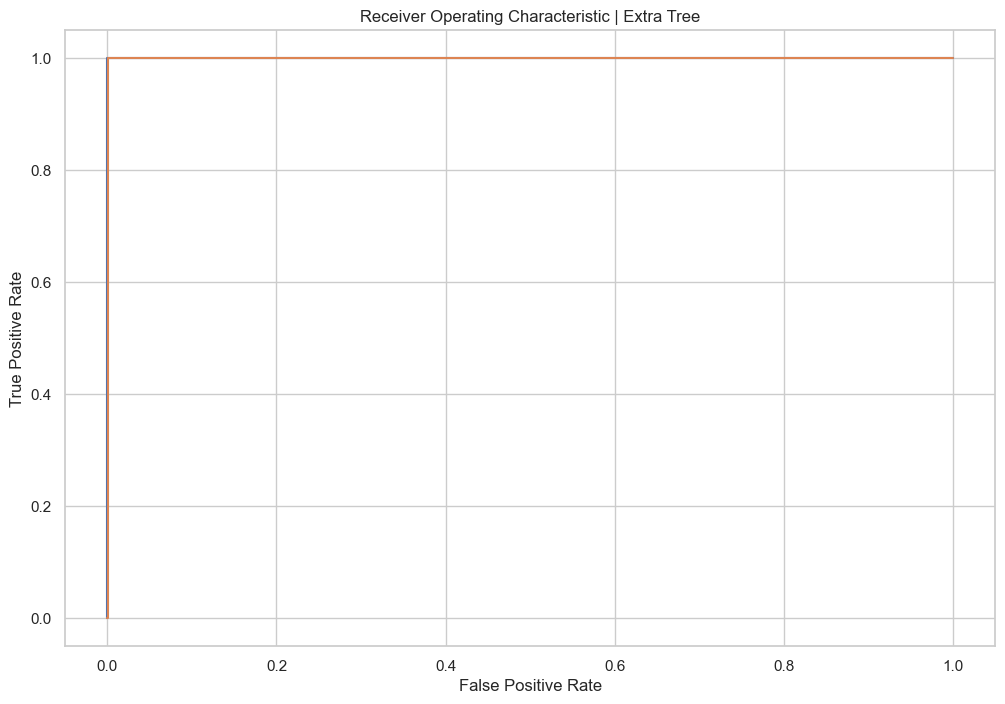

In [74]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y3}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [75]:
auc_score_y3 = {
    "Decision Trees":1.0000,
    "Random Forest": 1.0000,
    "Logistic Regression": 0.5000,
    "K-Nearest Neighbors": 0.5000,
    "Ada Boost": 1.0000,
    "Gaussien Naive_Bayes": 0.7714,
    "Bagging": 1.0000,
    "Gradient Boosting": 1.0000,
    "Extra Tree": 1.0000
}



In [76]:
df_auc = pd.DataFrame(list(auc_score_y3.items()), columns=['Model', 'AUC Score'])
df_auc

Model  AUC Score
0        Decision Trees     1.0000
1         Random Forest     1.0000
2   Logistic Regression     0.5000
3   K-Nearest Neighbors     0.5000
4             Ada Boost     1.0000
5  Gaussien Naive_Bayes     0.7714
6               Bagging     1.0000
7     Gradient Boosting     1.0000
8            Extra Tree     1.0000

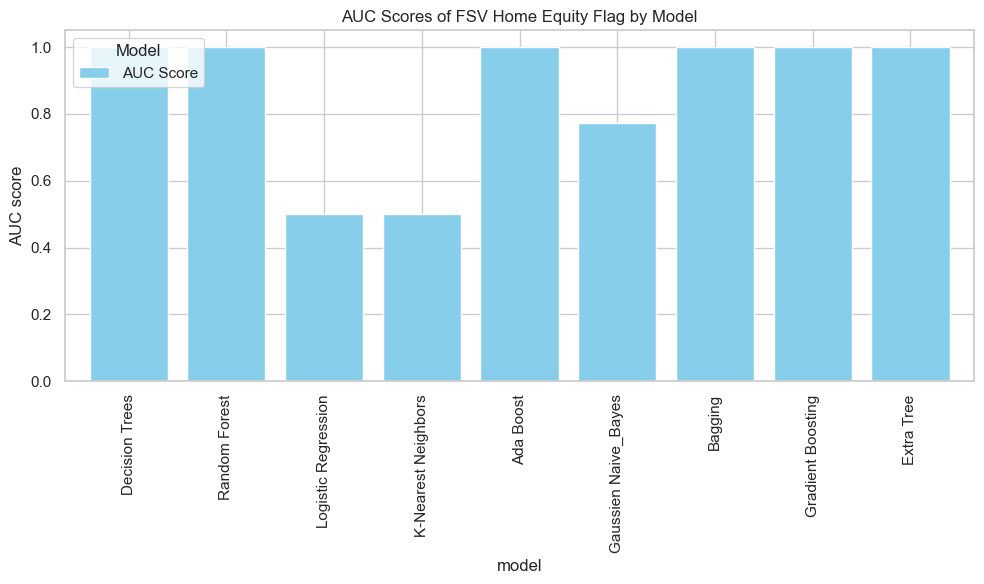

In [77]:
# Plot the DataFrame
df_auc.plot(x='Model', y='AUC Score', kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

# Adding title and labels
plt.title('AUC Scores of FSV Home Equity Flag by Model')
plt.xlabel('model')
plt.ylabel('AUC score')

# Adjust legend
plt.legend(title='Model', loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

## product 4: FSV ID Theft Flag

In [78]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y4, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : FSV ID Theft Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9605
- Precision: 0.9683
- Recall: 0.9605
- F1 Score: 0.9643
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : FSV ID Theft Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 0.9999
- Precision: 0.9999
- Recall: 0.9999
- F1 Score: 0.9999
- Auc Score: 0.9967
------------------------------------------------------------------------------------------


Model performanc

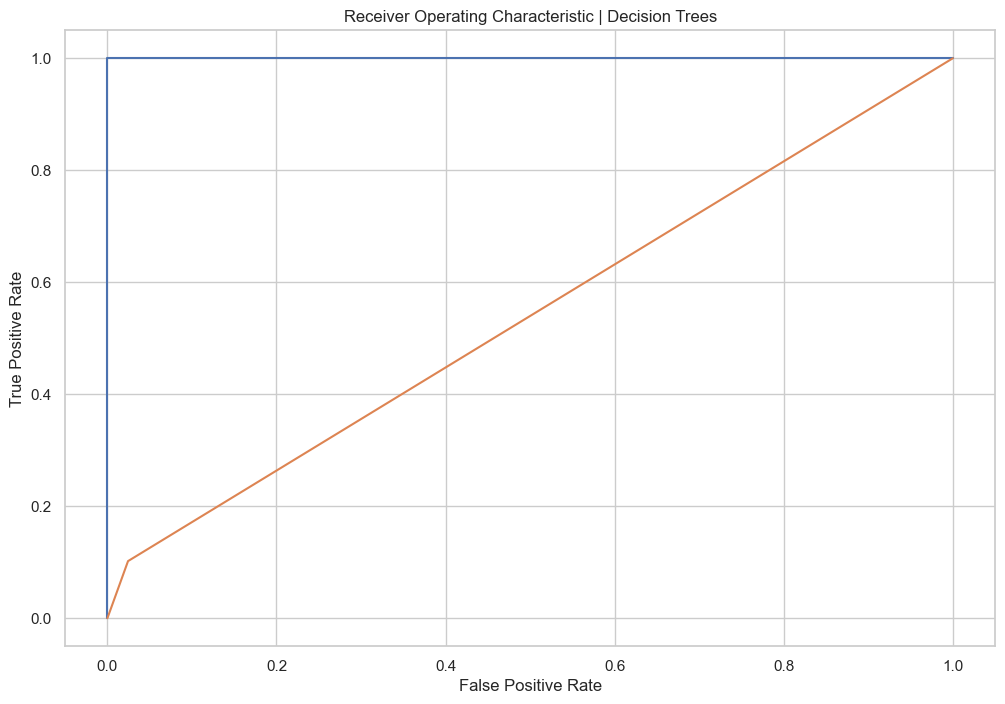

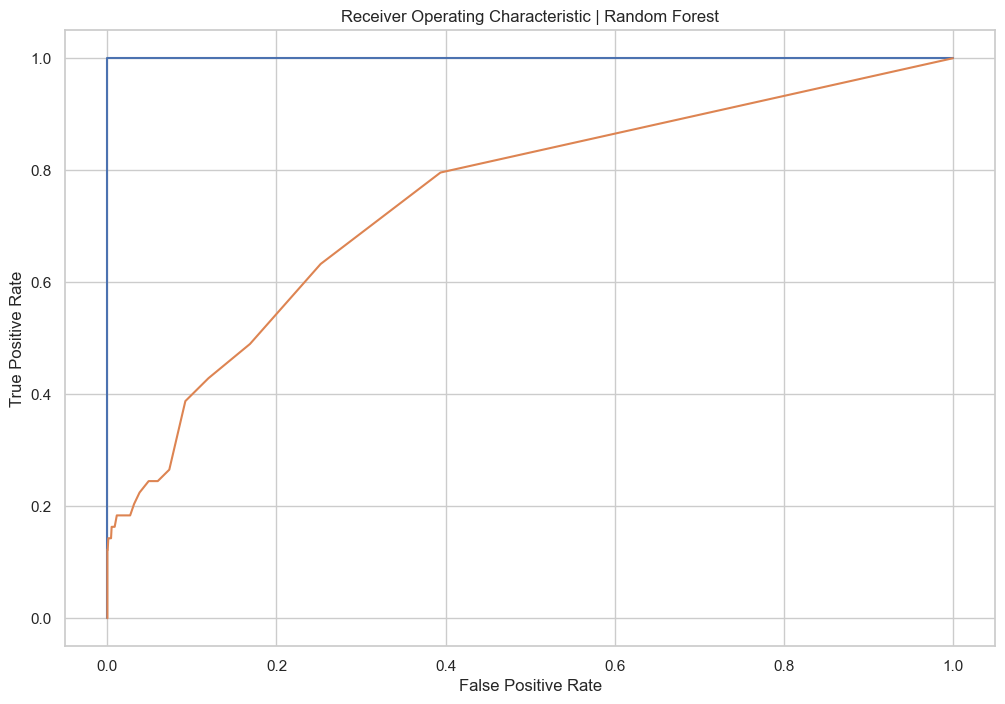

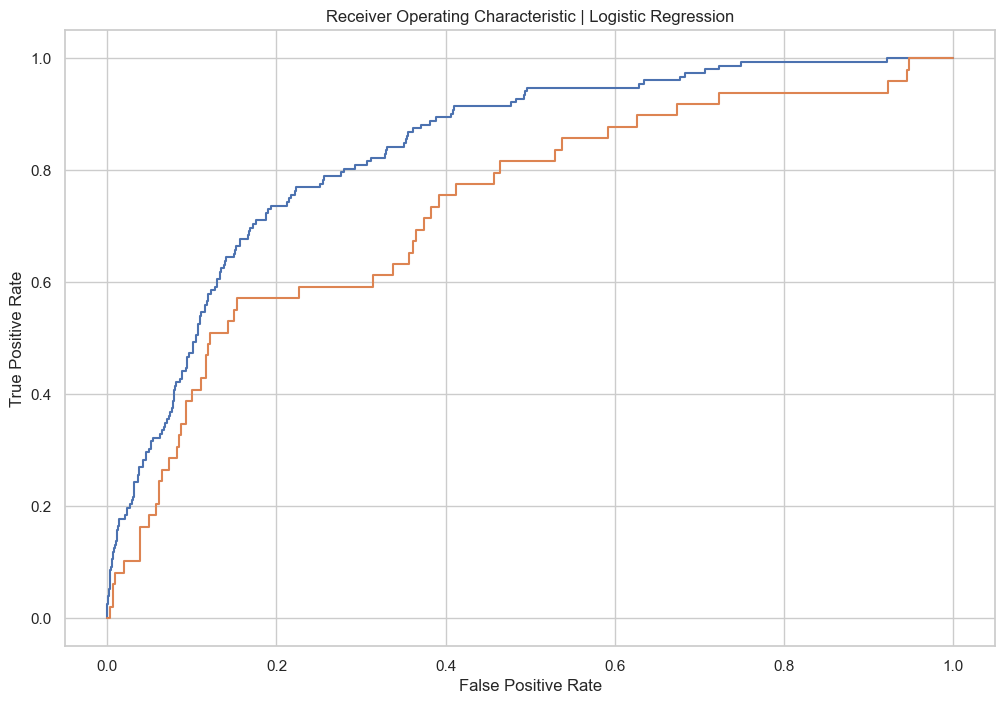

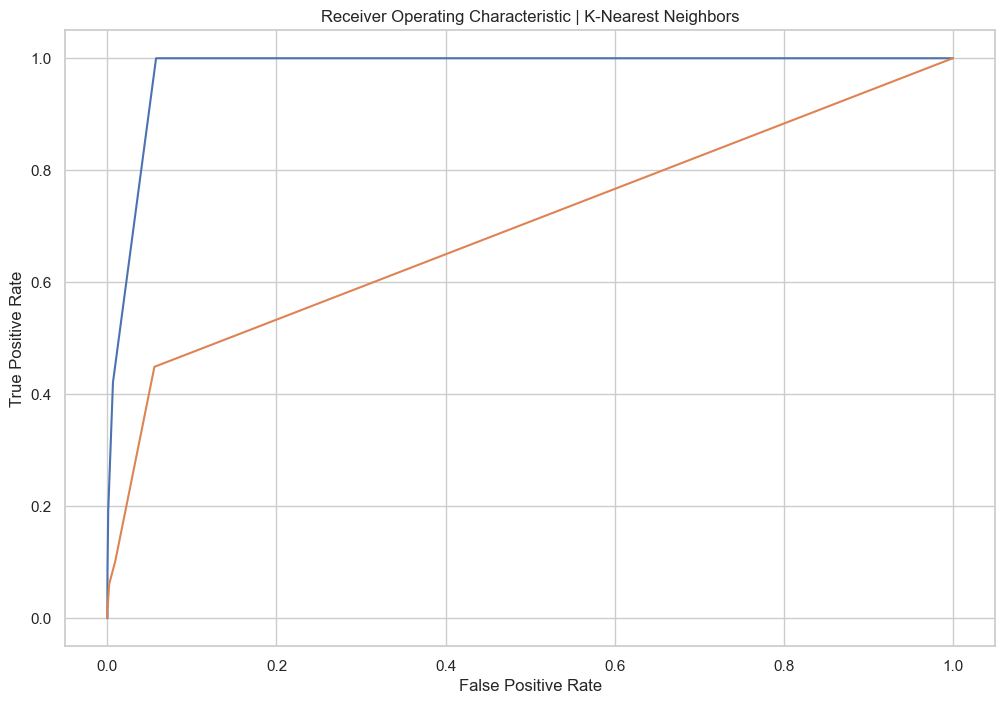

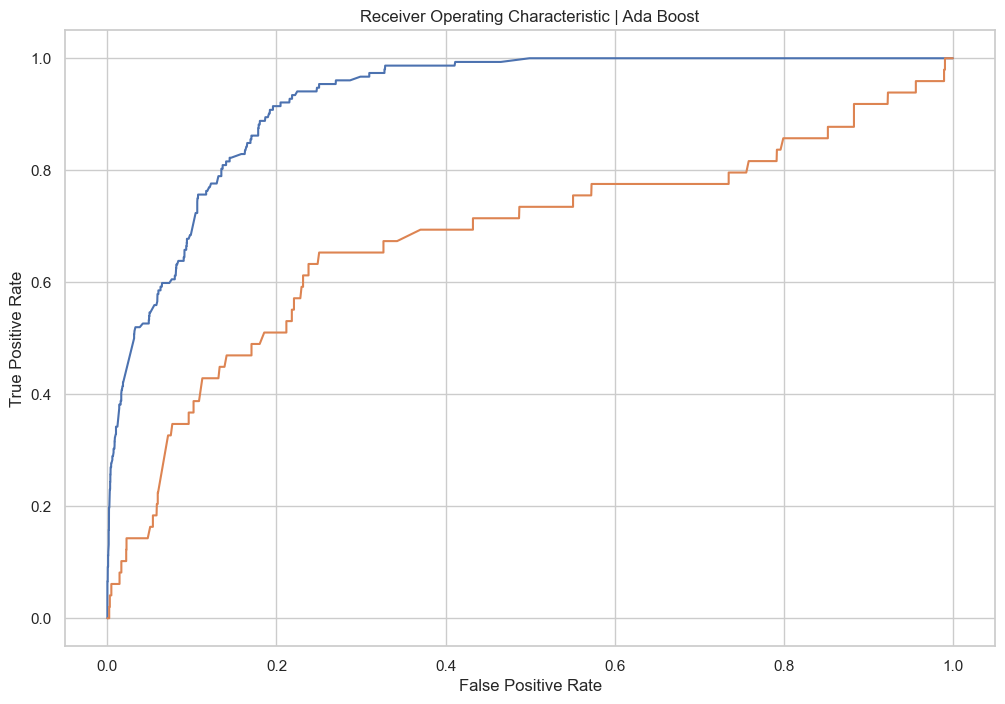

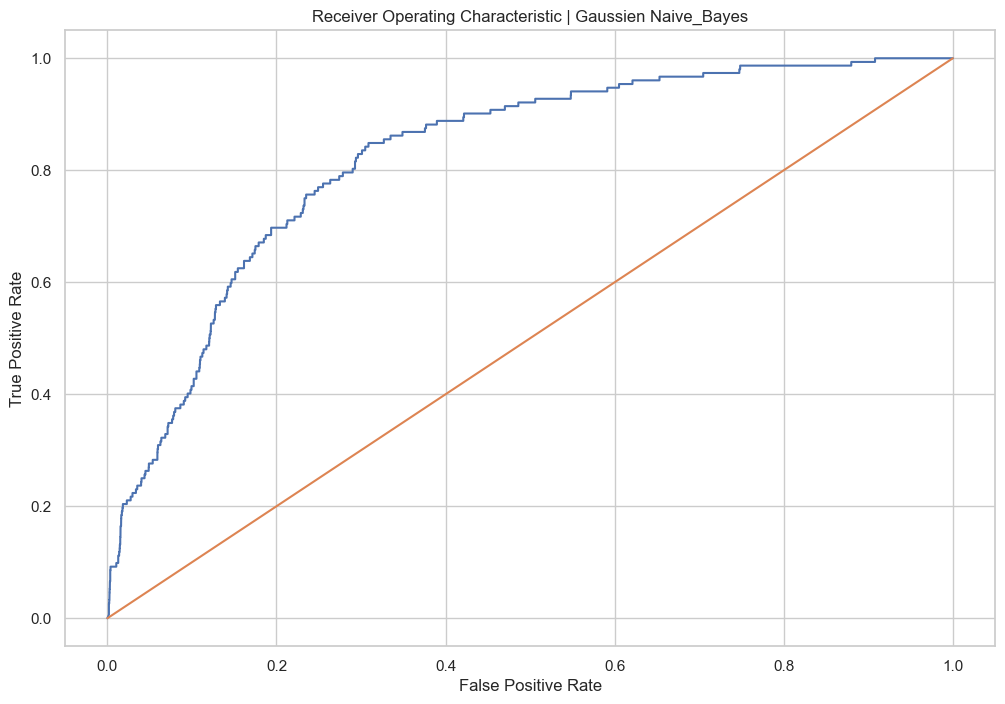

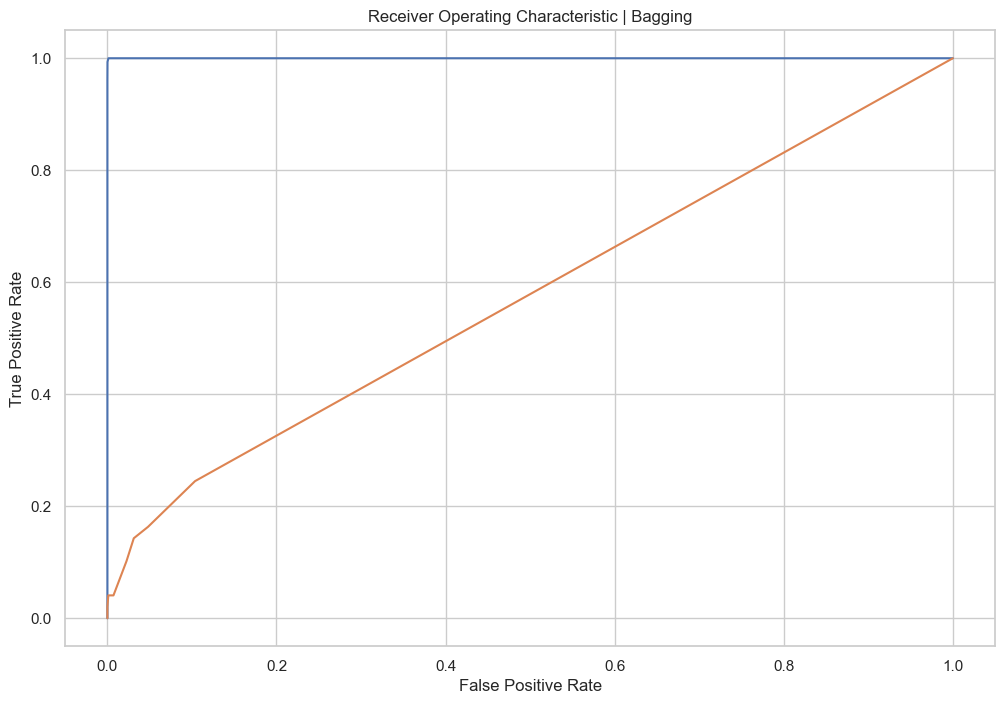

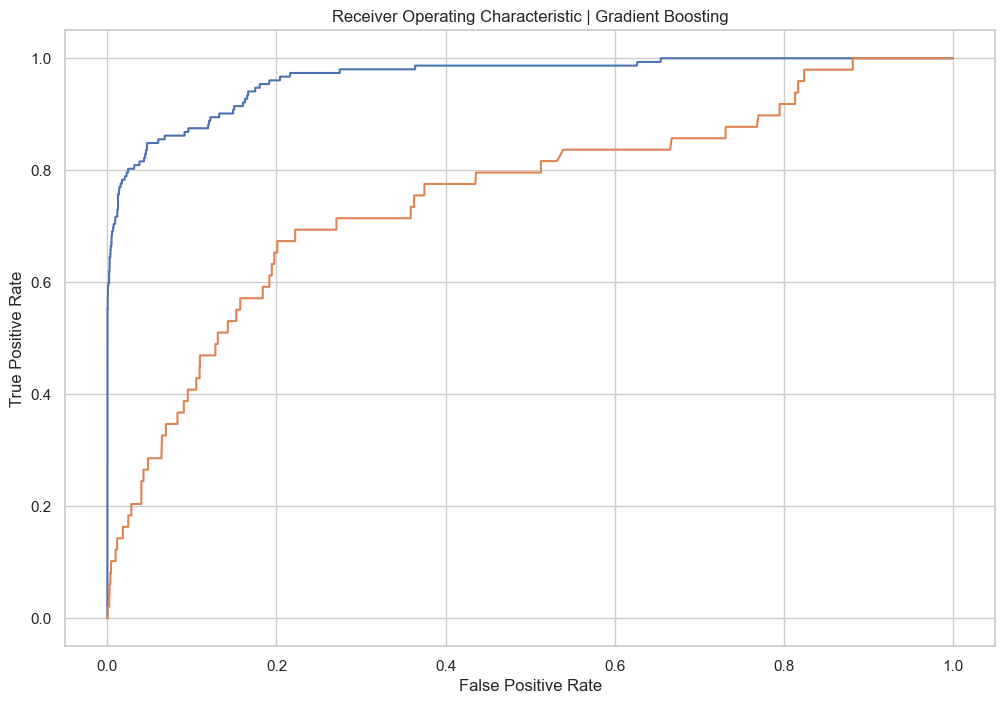

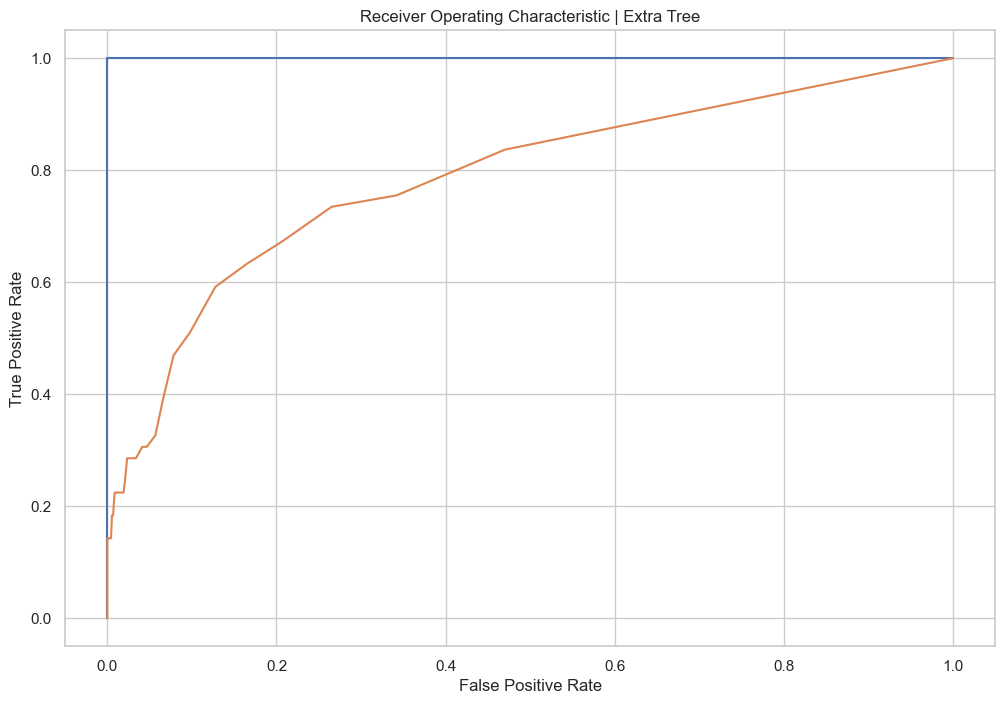

In [79]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y4}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [80]:
auc_score_y4 = {
    "Decision Trees":1.0000,
    "Random Forest": 1.0000,
    "Logistic Regression": 0.5000,
    "K-Nearest Neighbors": 0.5949,
    "Ada Boost": 0.5329,
    "Gaussien Naive_Bayes": 0.6158,
    "Bagging": 0.9309,
    "Gradient Boosting": 0.6548,
    "Extra Tree": 1.0000
}


In [81]:
df_auc_4 = pd.DataFrame(list(auc_score_y4.items()), columns=['Model', 'AUC Score'])
df_auc

Model  AUC Score
0        Decision Trees     1.0000
1         Random Forest     1.0000
2   Logistic Regression     0.5000
3   K-Nearest Neighbors     0.5000
4             Ada Boost     1.0000
5  Gaussien Naive_Bayes     0.7714
6               Bagging     1.0000
7     Gradient Boosting     1.0000
8            Extra Tree     1.0000

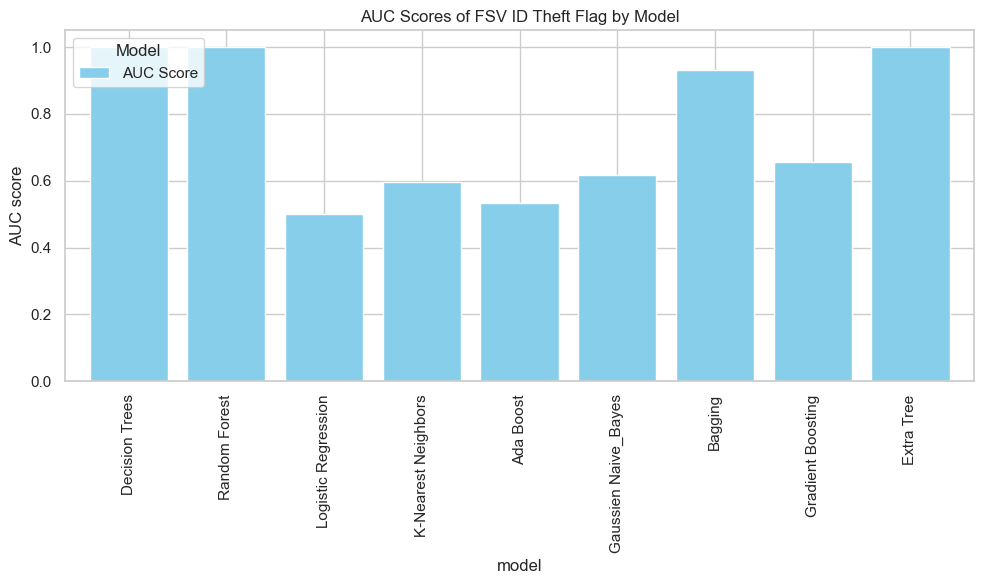

In [82]:
# Plot the DataFrame
df_auc_4.plot(x='Model', y='AUC Score', kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

# Adding title and labels
plt.title('AUC Scores of FSV ID Theft Flag by Model')
plt.xlabel('model')
plt.ylabel('AUC score')

# Adjust legend
plt.legend(title='Model', loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

### Product 5: FSV Mortgage Flag

In [83]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y5, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : FSV ID Theft Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9972
- Precision: 0.9984
- Recall: 0.9972
- F1 Score: 0.9977
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : FSV ID Theft Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performanc

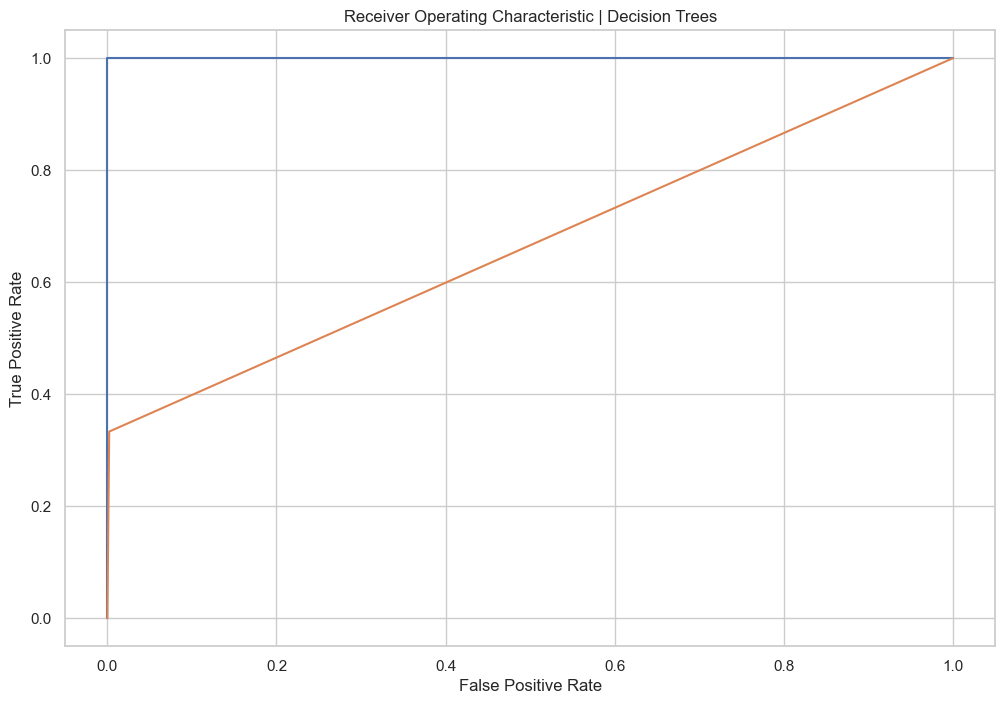

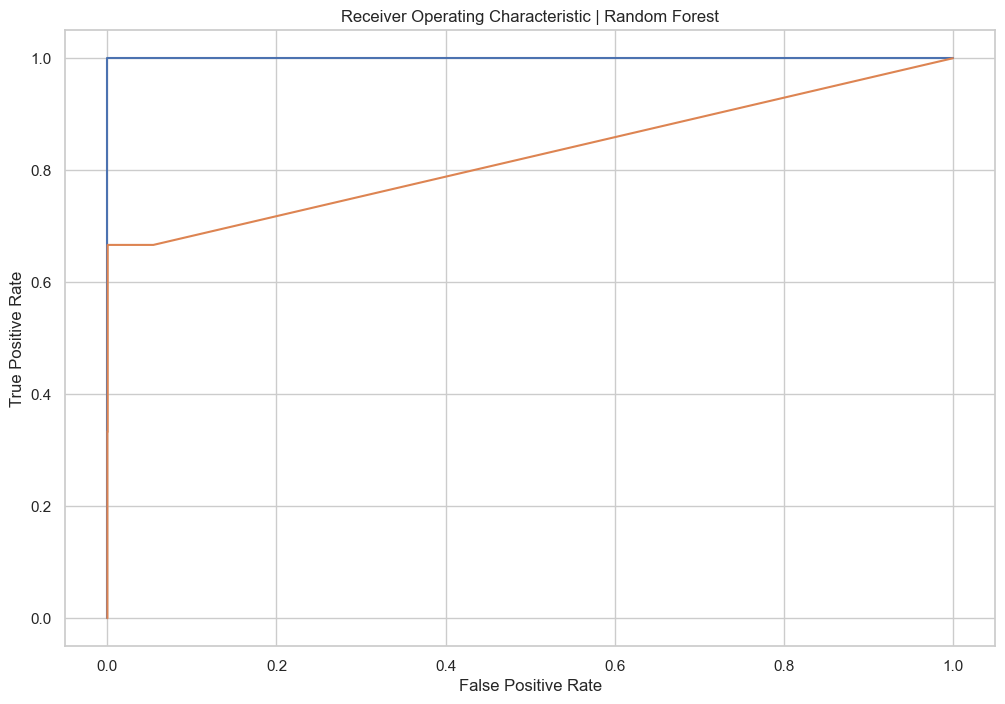

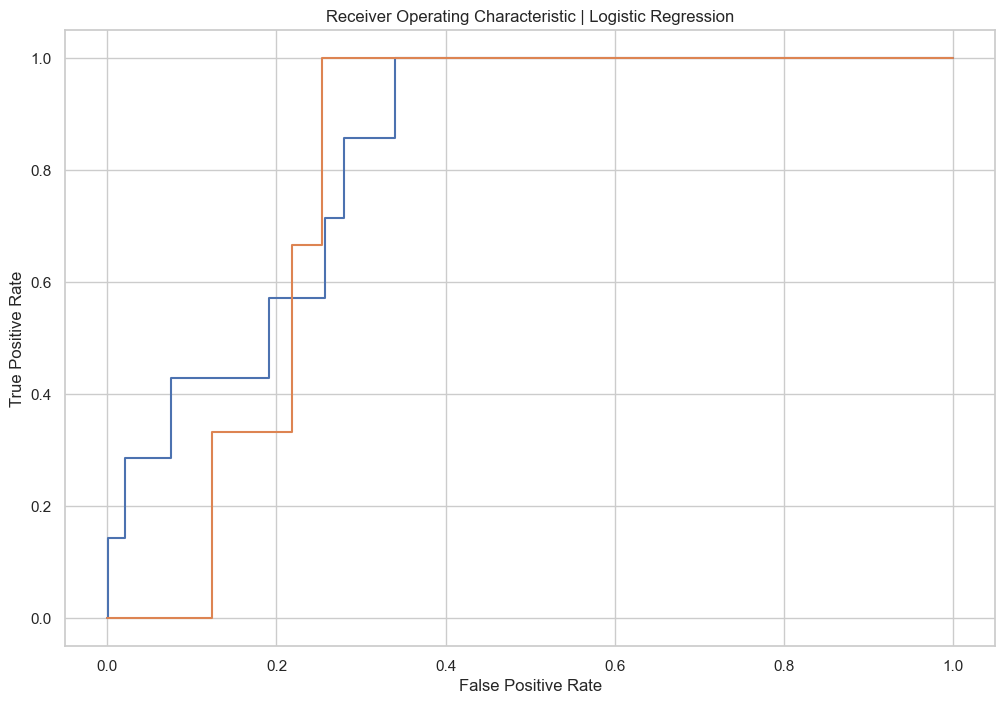

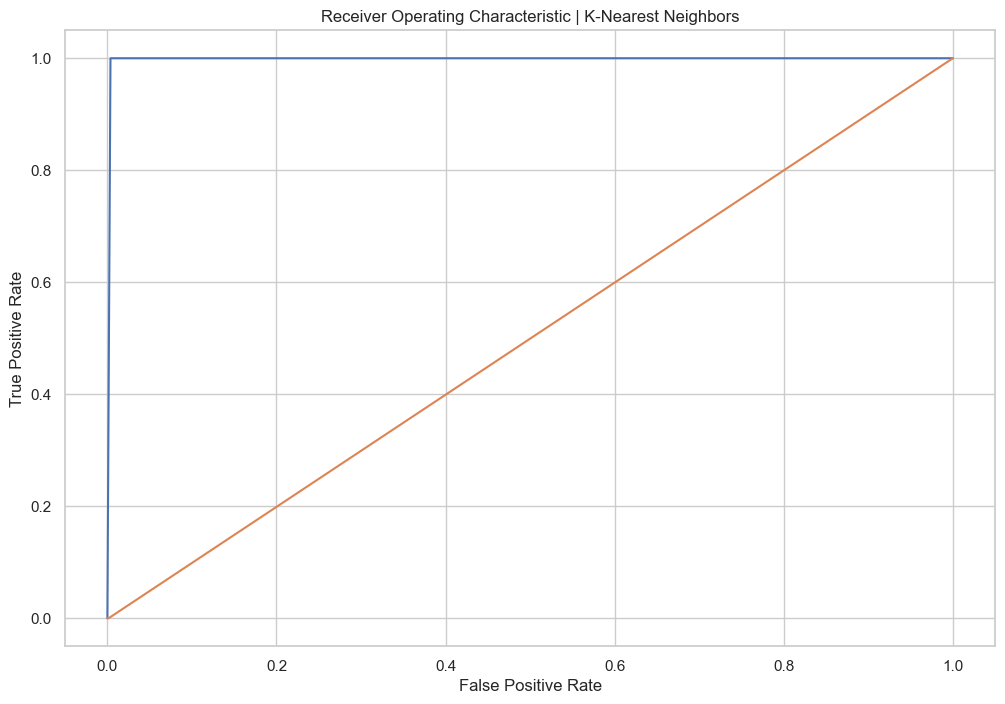

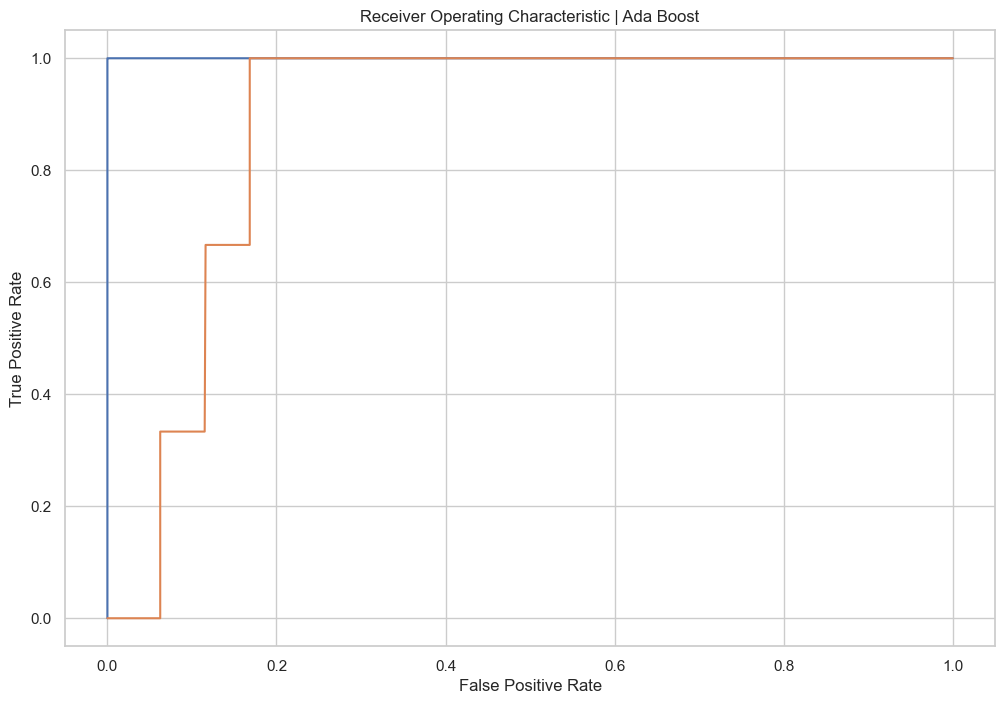

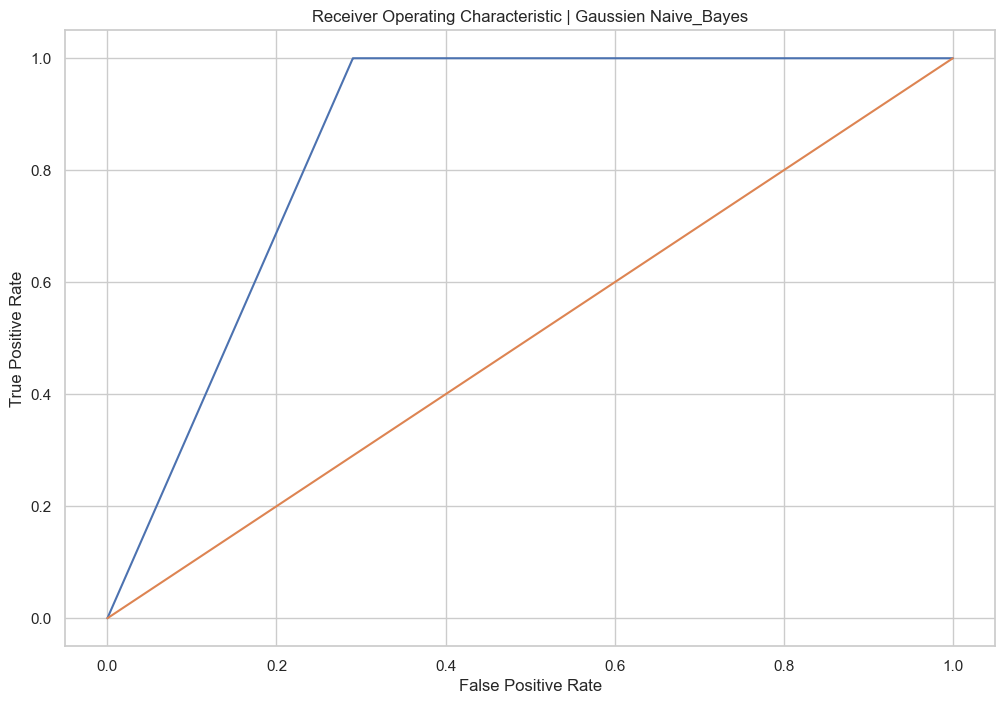

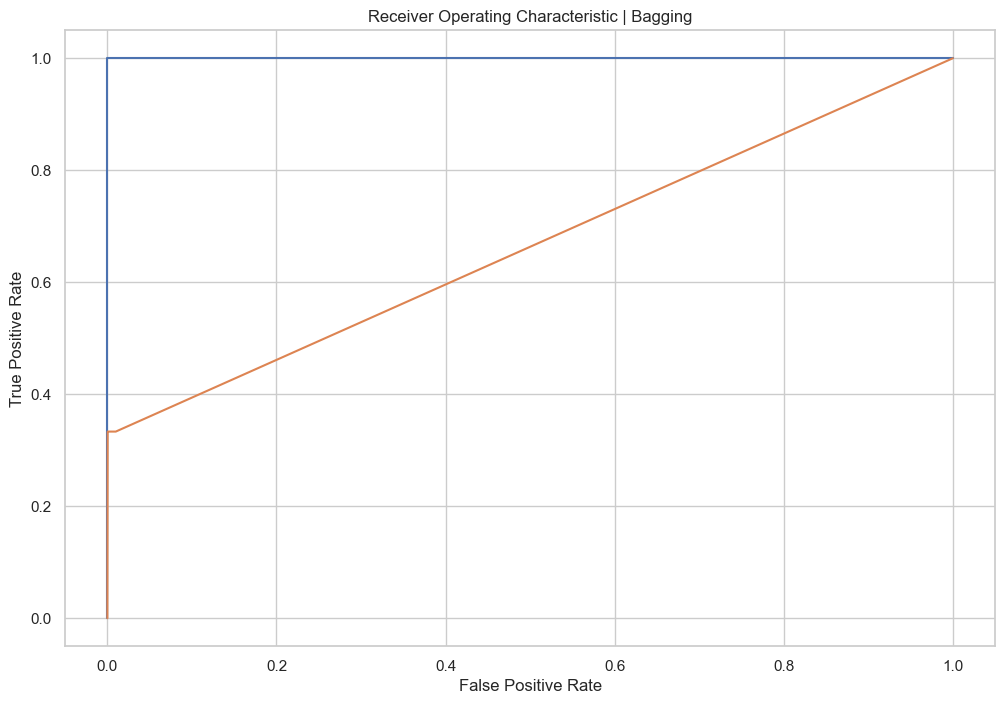

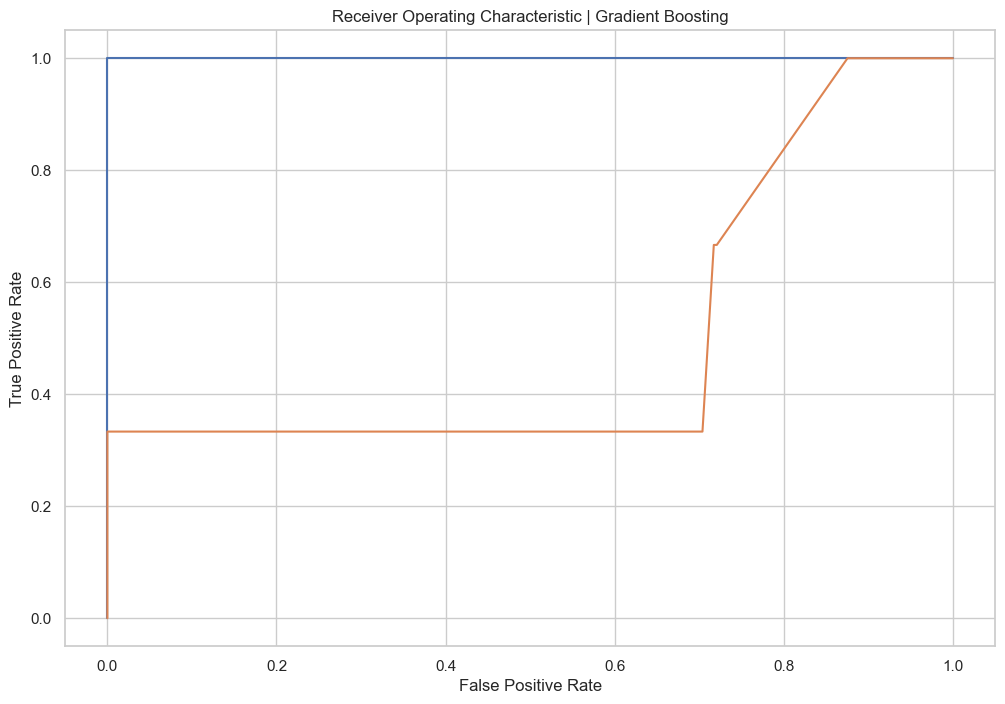

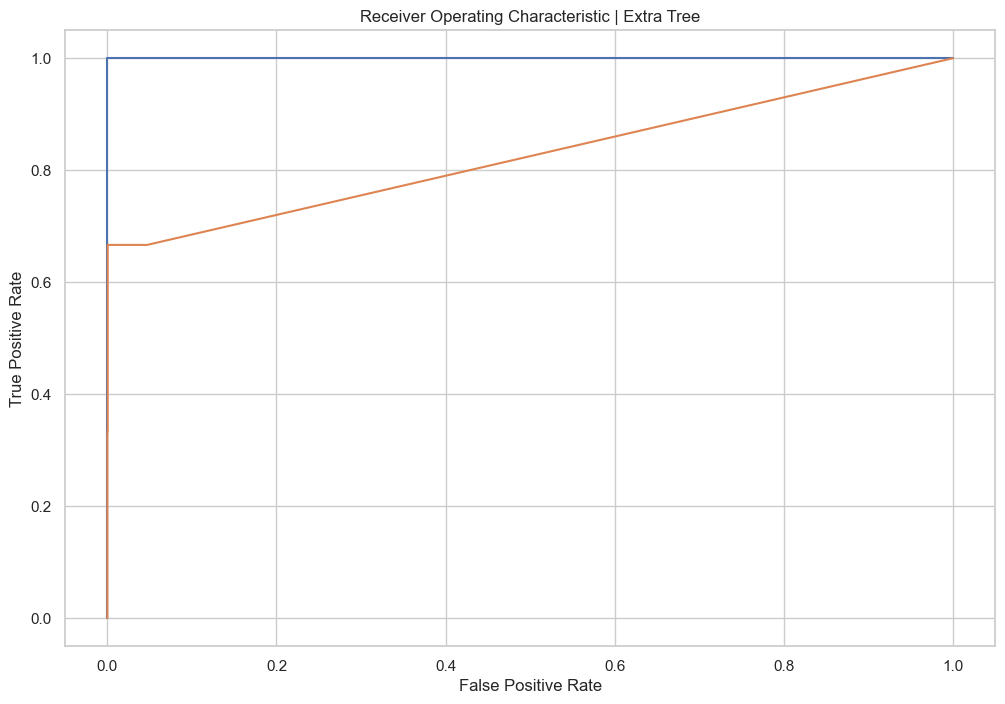

In [84]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y4}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [85]:
auc_score_y5 = {
    "Decision Trees":1.0000,
    "Random Forest": 1.0000,
    "Logistic Regression": 0.5000,
    "K-Nearest Neighbors": 0.5000,
    "Ada Boost": 1.0000,
    "Gaussien Naive_Bayes": 0.8216,
    "Bagging": 0.9999,
    "Gradient Boosting": 1.0000,
    "Extra Tree": 1.0000
}

In [86]:
df_auc_5 = pd.DataFrame(list(auc_score_y5.items()), columns=['Model', 'AUC Score'])
df_auc

Model  AUC Score
0        Decision Trees     1.0000
1         Random Forest     1.0000
2   Logistic Regression     0.5000
3   K-Nearest Neighbors     0.5000
4             Ada Boost     1.0000
5  Gaussien Naive_Bayes     0.7714
6               Bagging     1.0000
7     Gradient Boosting     1.0000
8            Extra Tree     1.0000

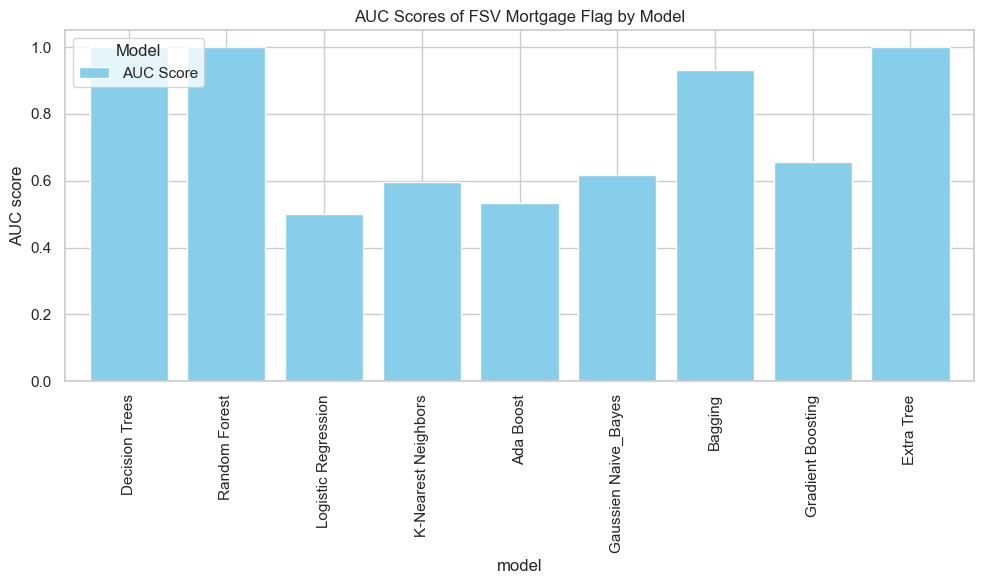

In [87]:
# Plot the DataFrame
df_auc_4.plot(x='Model', y='AUC Score', kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

# Adding title and labels
plt.title('AUC Scores of FSV Mortgage Flag by Model')
plt.xlabel('model')
plt.ylabel('AUC score')

# Adjust legend
plt.legend(title='Model', loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

### Product 6: INS Client Flag

In [88]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y6, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : INS Client Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.5585
- Precision: 0.7762
- Recall: 0.5585
- F1 Score: 0.6285
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : INS Client Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance fo

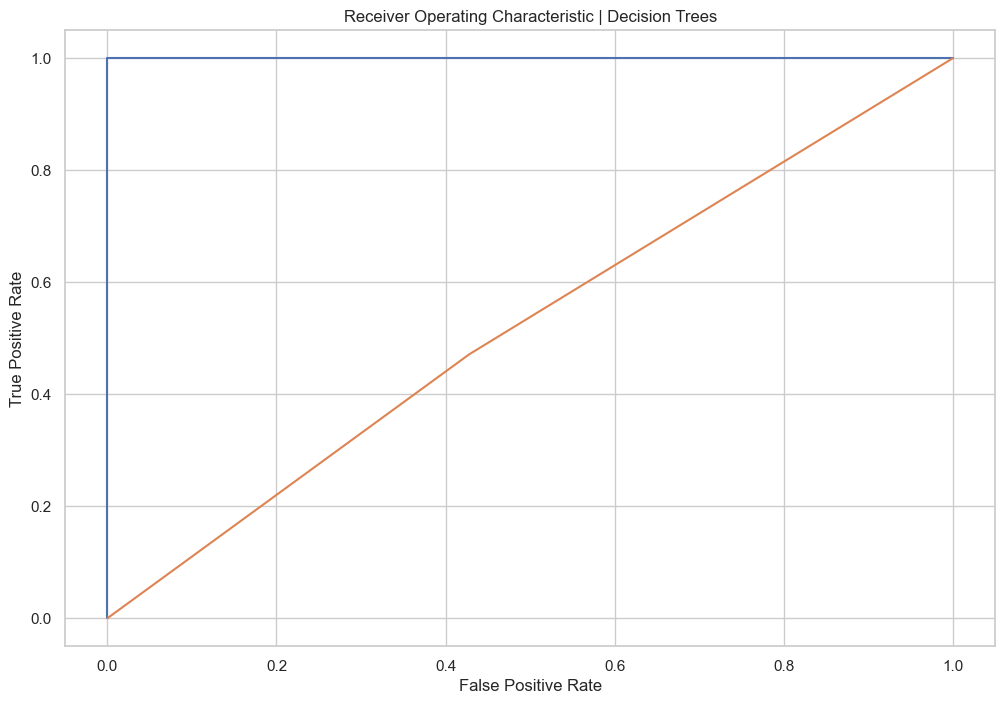

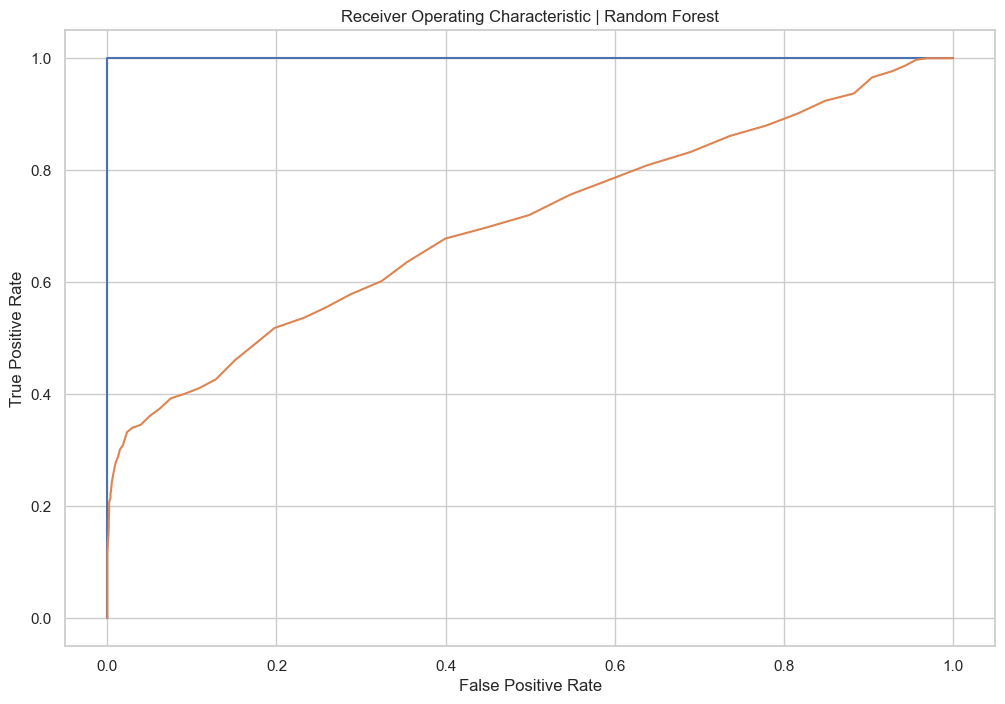

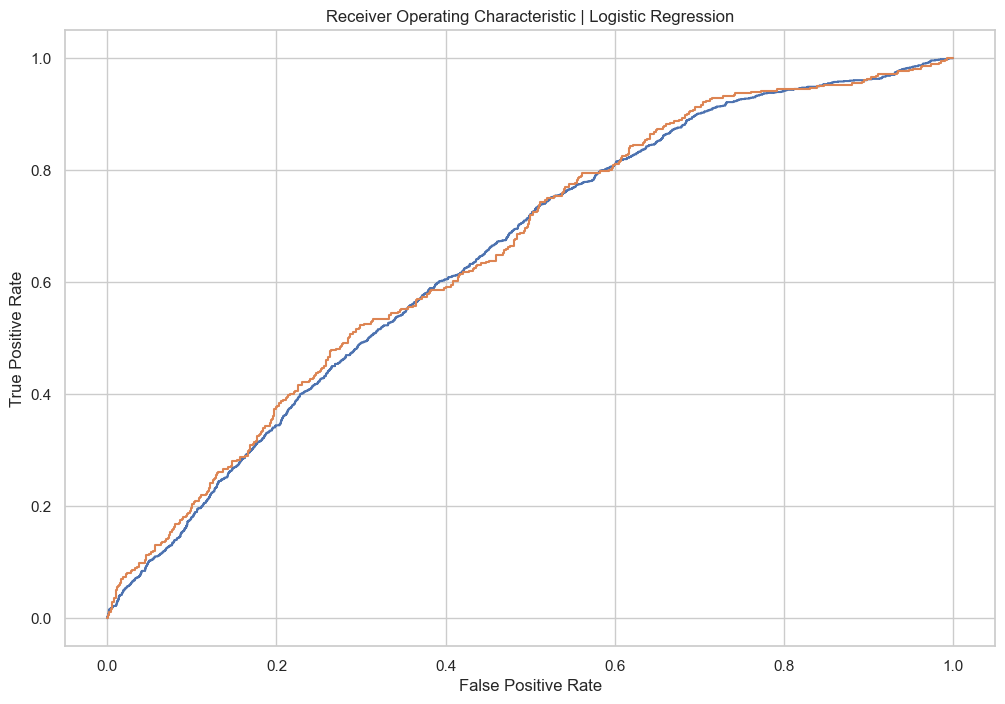

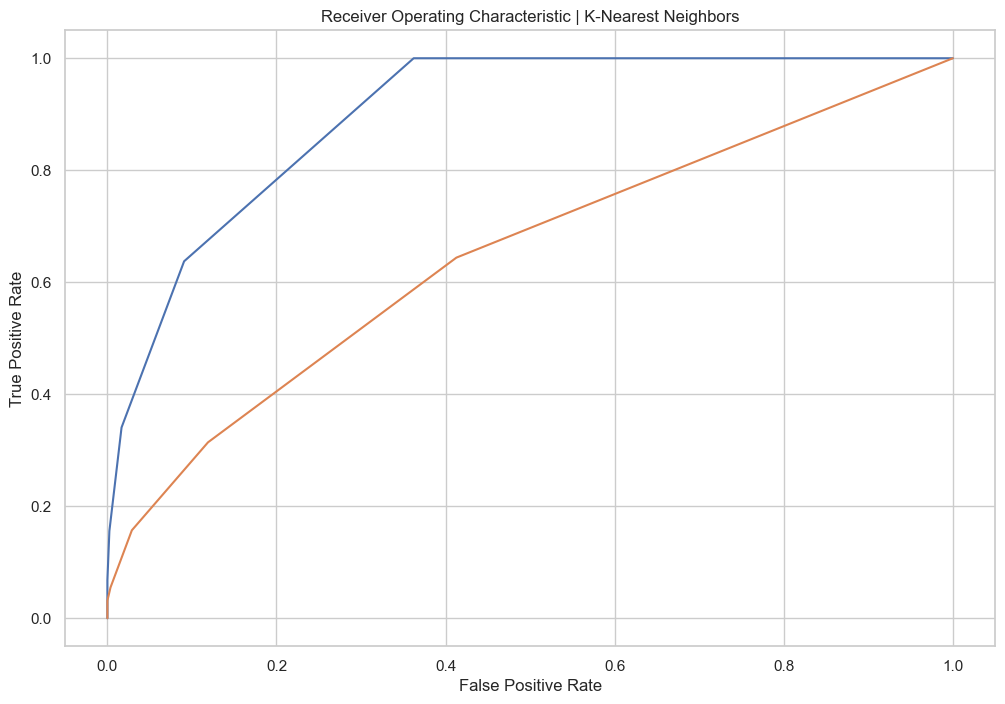

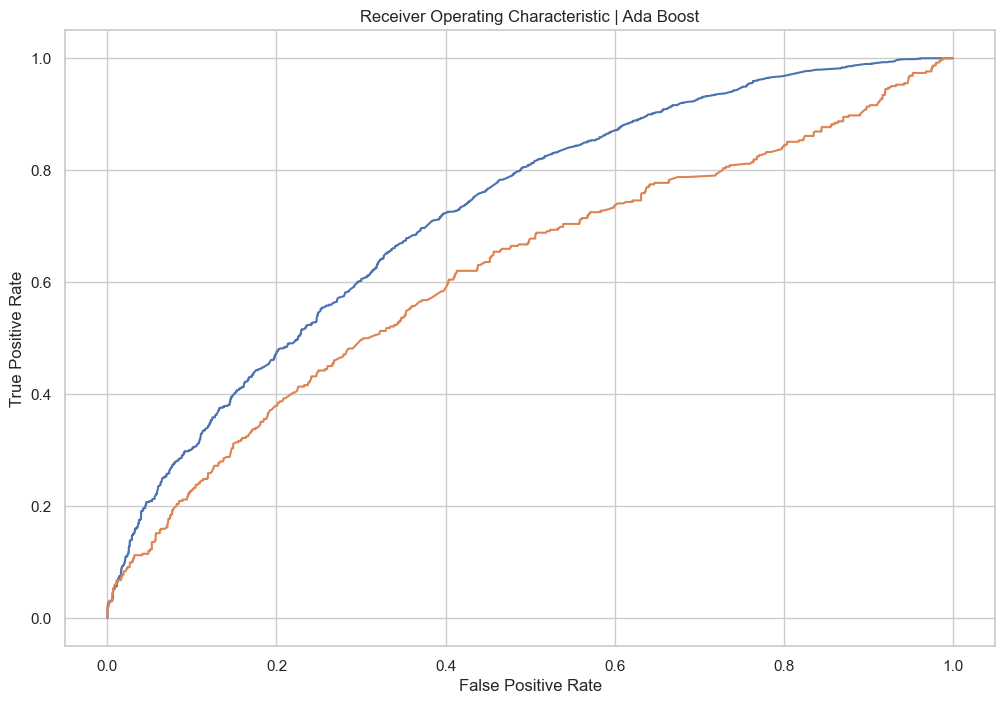

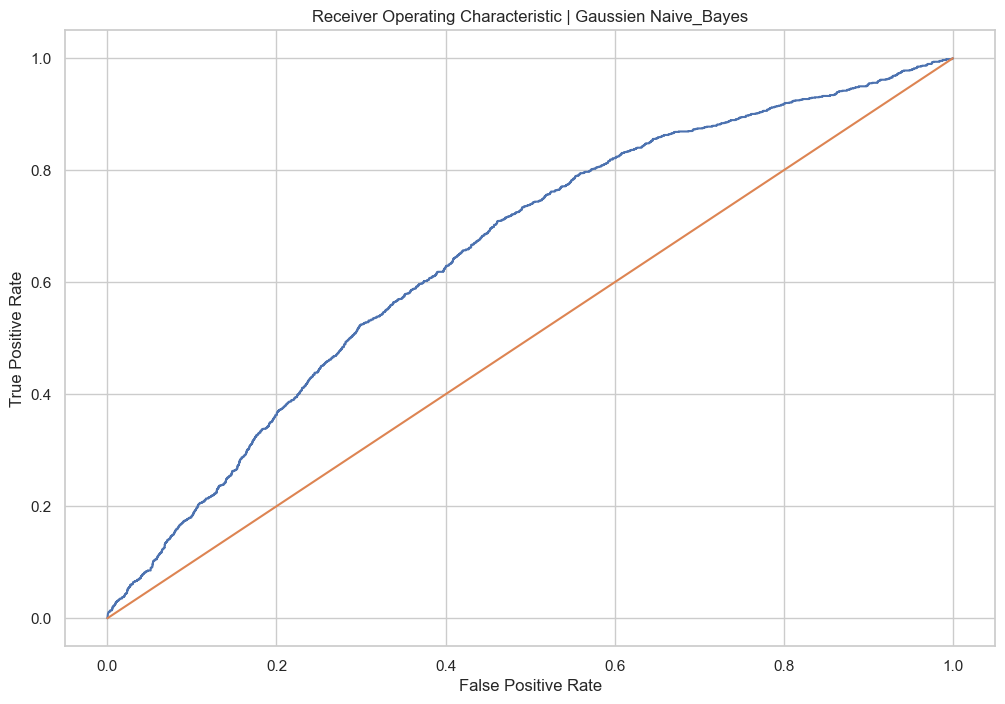

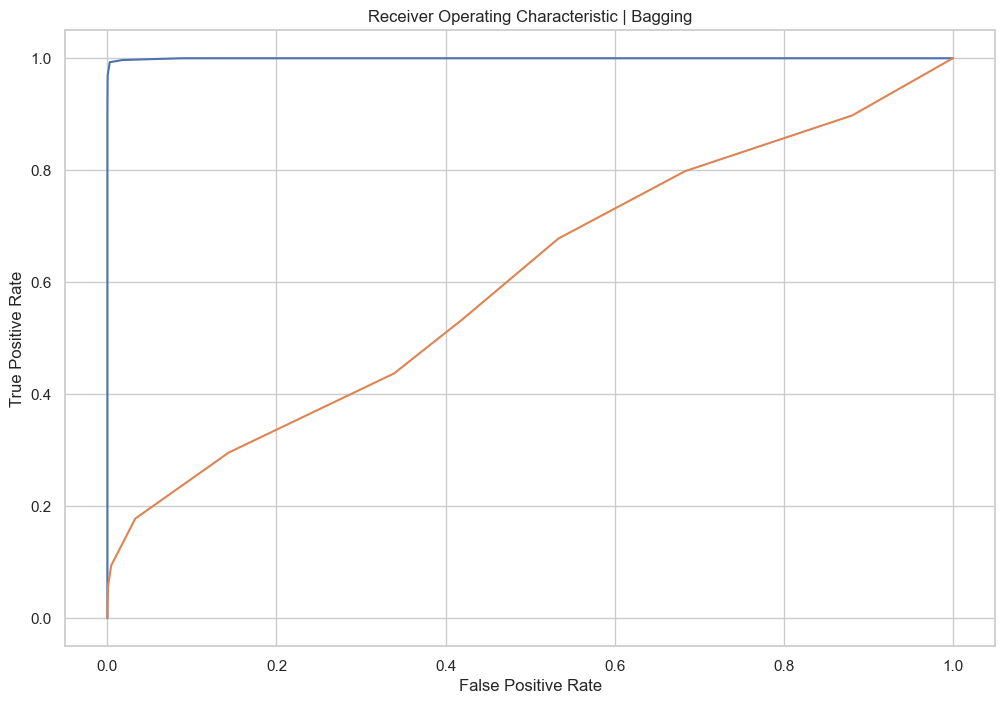

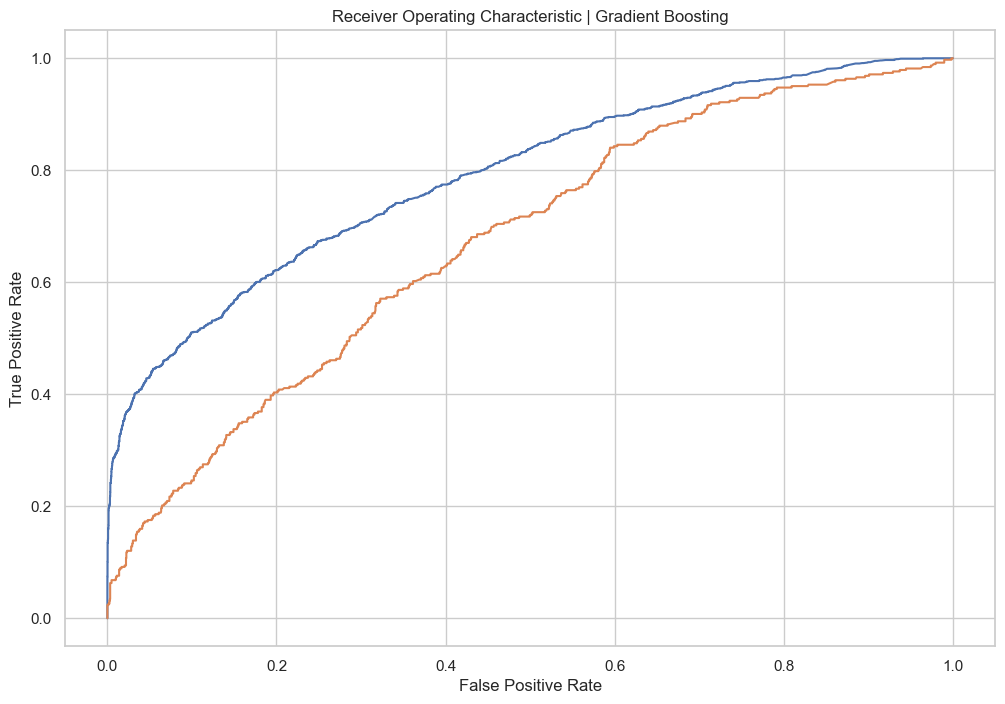

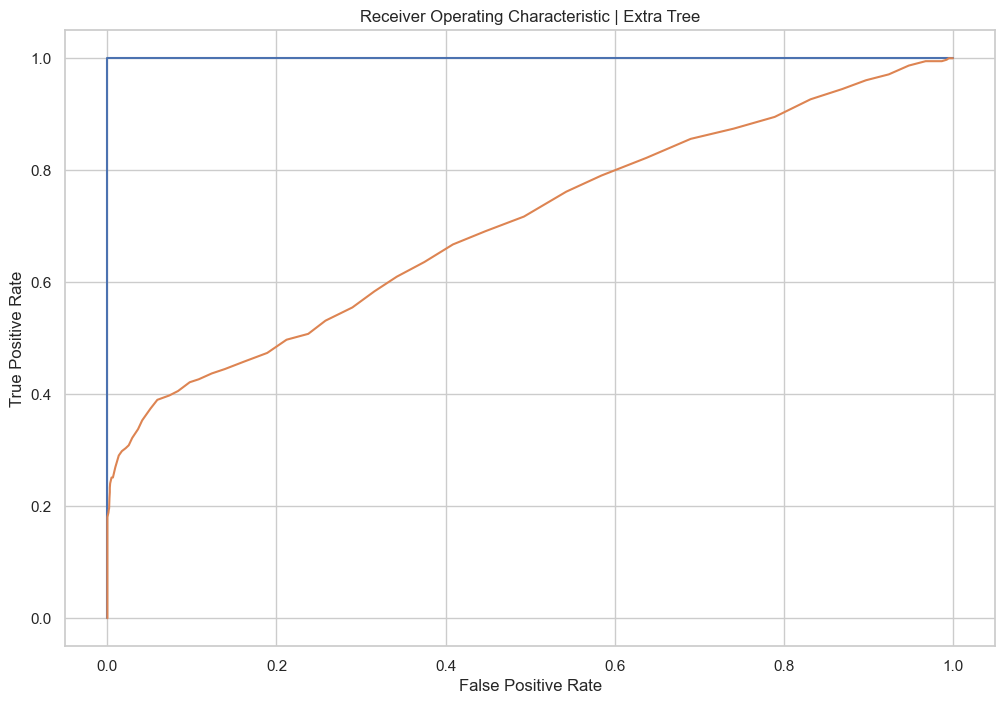

In [89]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y6}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [90]:
auc_score_y6 = {
    "Decision Trees":1.0000,
    "Random Forest": 1.0000,
    "Logistic Regression": 0.5008,
    "K-Nearest Neighbors": 0.6620,
    "Ada Boost": 0.5125,
    "Gaussien Naive_Bayes": 0.5004,
    "Bagging": 0.9588,
    "Gradient Boosting": 0.5485,
    "Extra Tree": 1.0000
}

In [91]:
df_auc_6 = pd.DataFrame(list(auc_score_y6.items()), columns=['Model', 'AUC Score'])
df_auc

Model  AUC Score
0        Decision Trees     1.0000
1         Random Forest     1.0000
2   Logistic Regression     0.5000
3   K-Nearest Neighbors     0.5000
4             Ada Boost     1.0000
5  Gaussien Naive_Bayes     0.7714
6               Bagging     1.0000
7     Gradient Boosting     1.0000
8            Extra Tree     1.0000

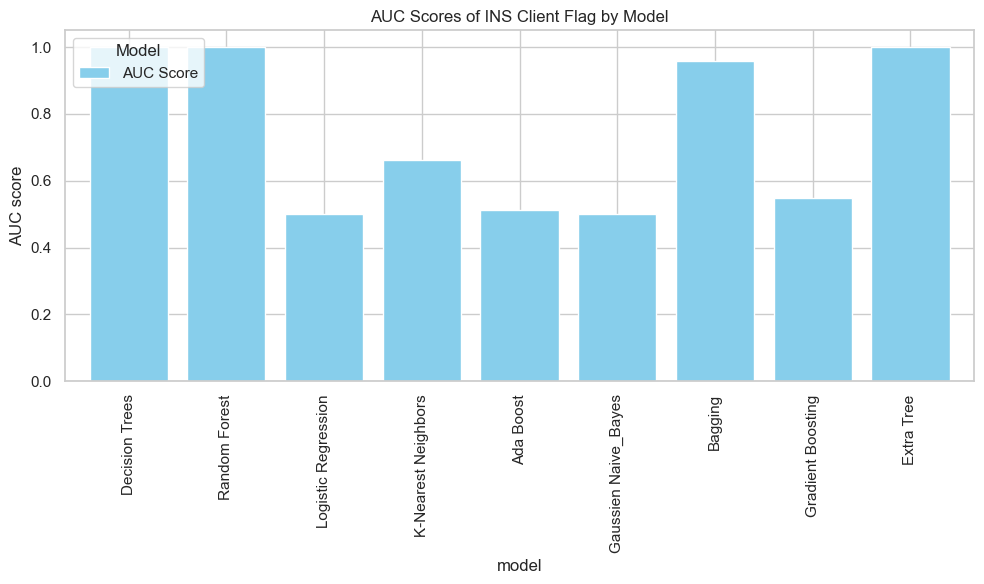

In [92]:
# Plot the DataFrame
df_auc_6.plot(x='Model', y='AUC Score', kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

# Adding title and labels
plt.title('AUC Scores of INS Client Flag by Model')
plt.xlabel('model')
plt.ylabel('AUC score')

# Adjust legend
plt.legend(title='Model', loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

### Product 7: TRV Globalware Flag

In [93]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y7, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : TRV Globalware Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 0.9998
- Precision: 0.9998
- Recall: 0.9998
- F1 Score: 0.9998
- Auc Score: 0.9985
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.8508
- Precision: 0.9036
- Recall: 0.8508
- F1 Score: 0.8731
- Auc Score: 0.9985
******************************************************************************************


Random Forest


Model performance for Product : TRV Globalware Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 0.9998
- Precision: 0.9998
- Recall: 0.9998
- F1 Score: 0.9998
- Auc Score: 0.9985
------------------------------------------------------------------------------------------


Model perfor

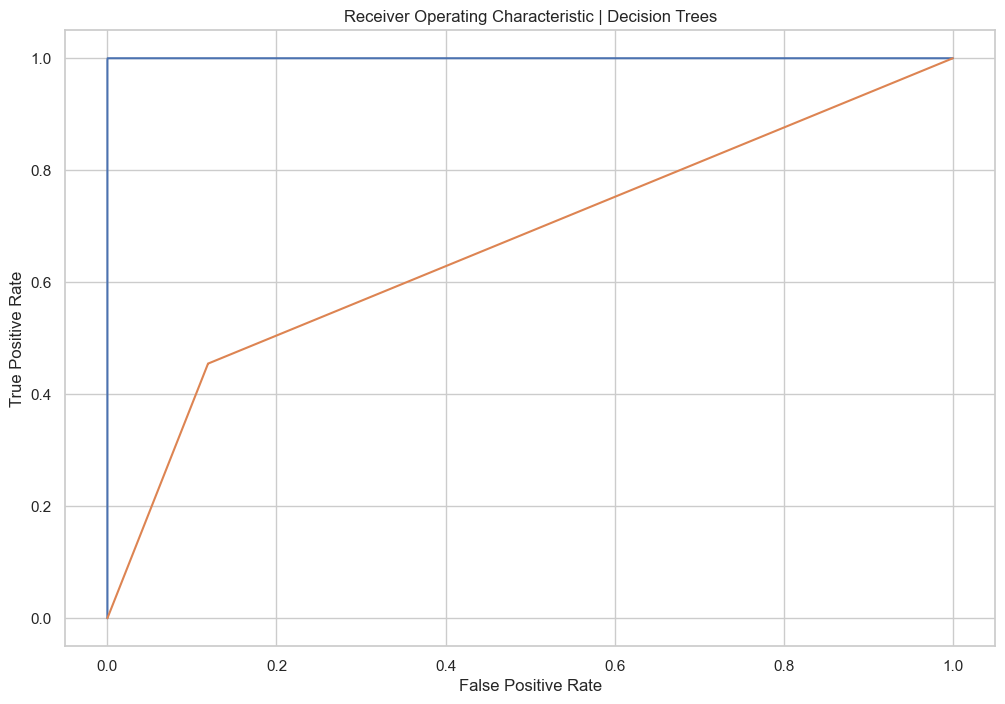

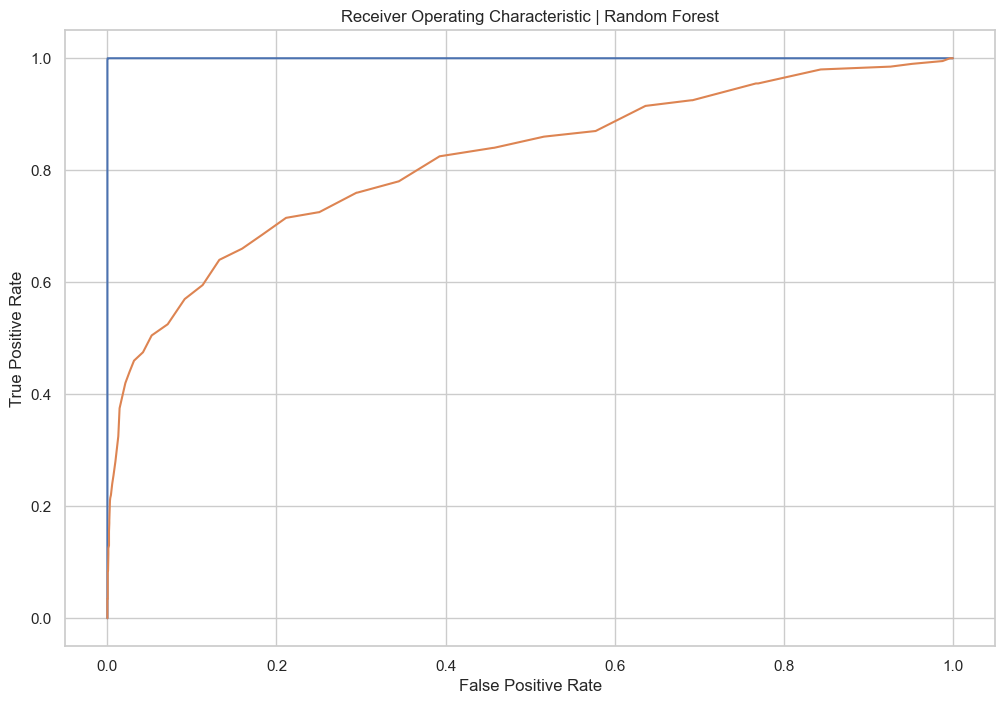

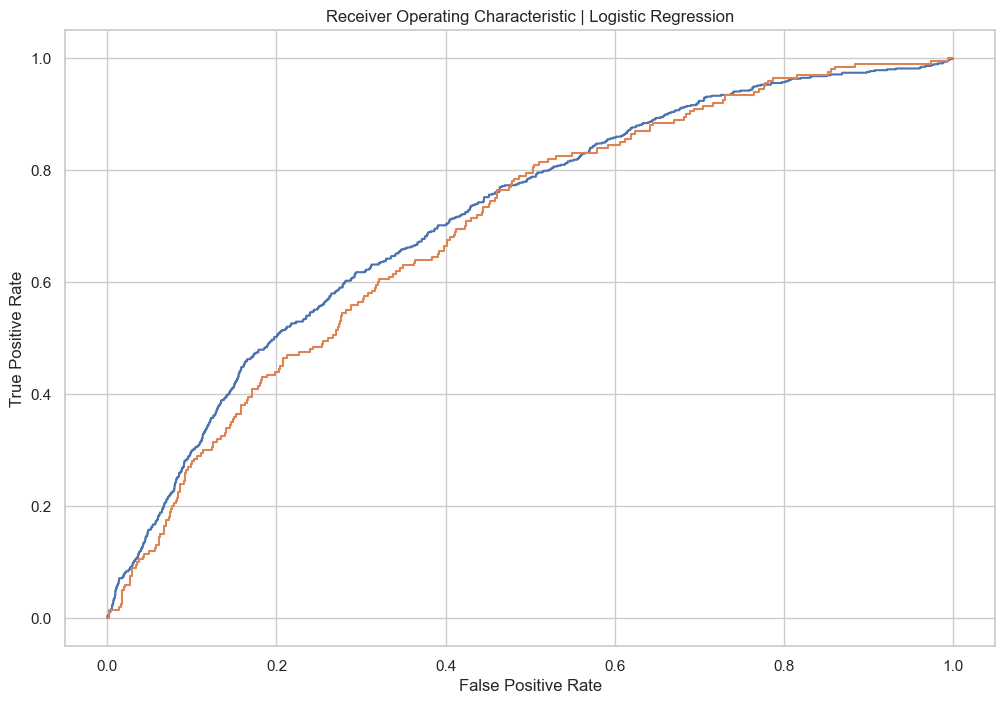

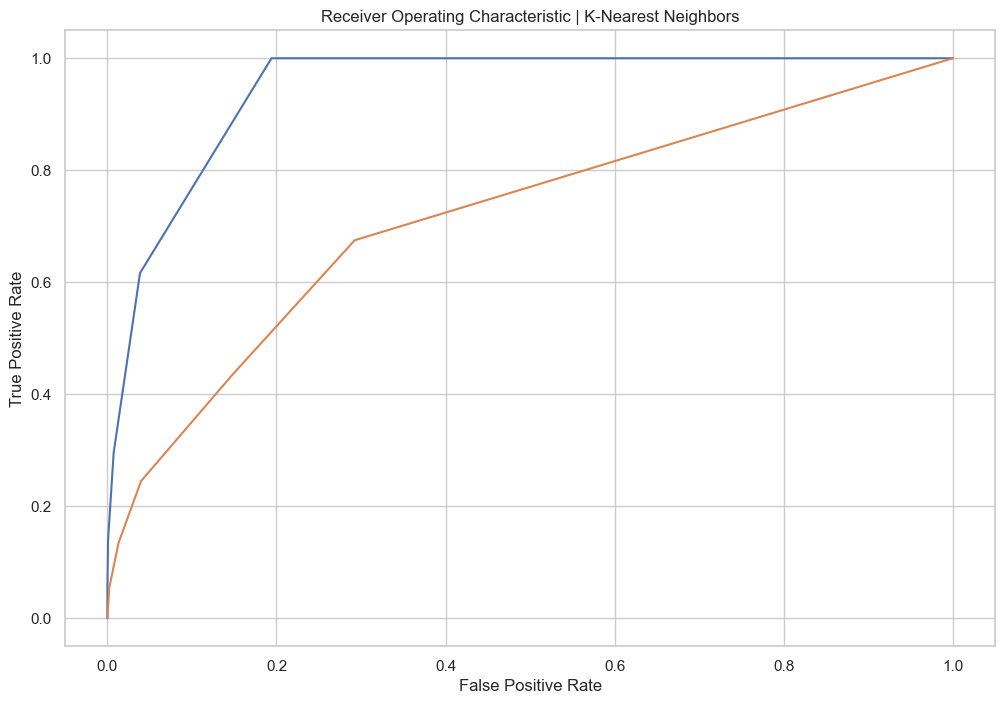

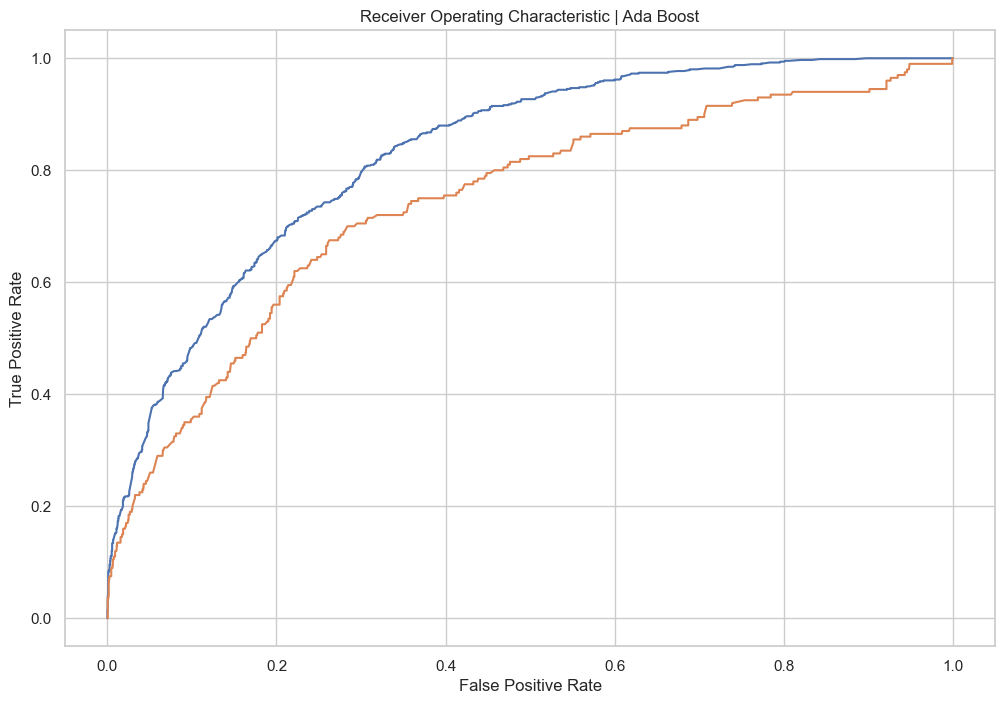

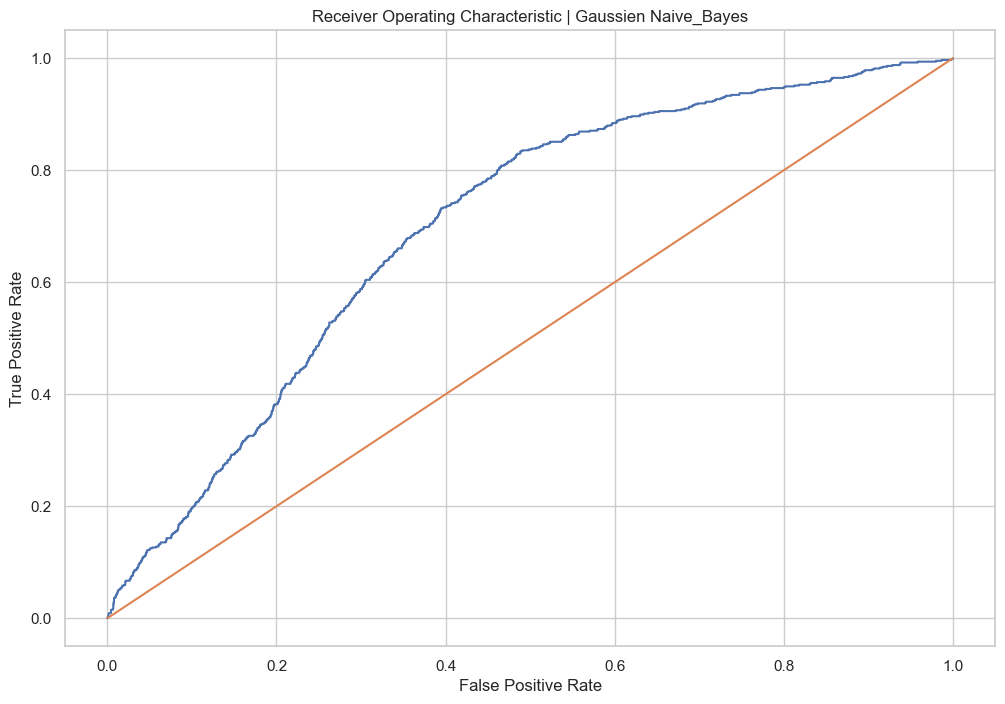

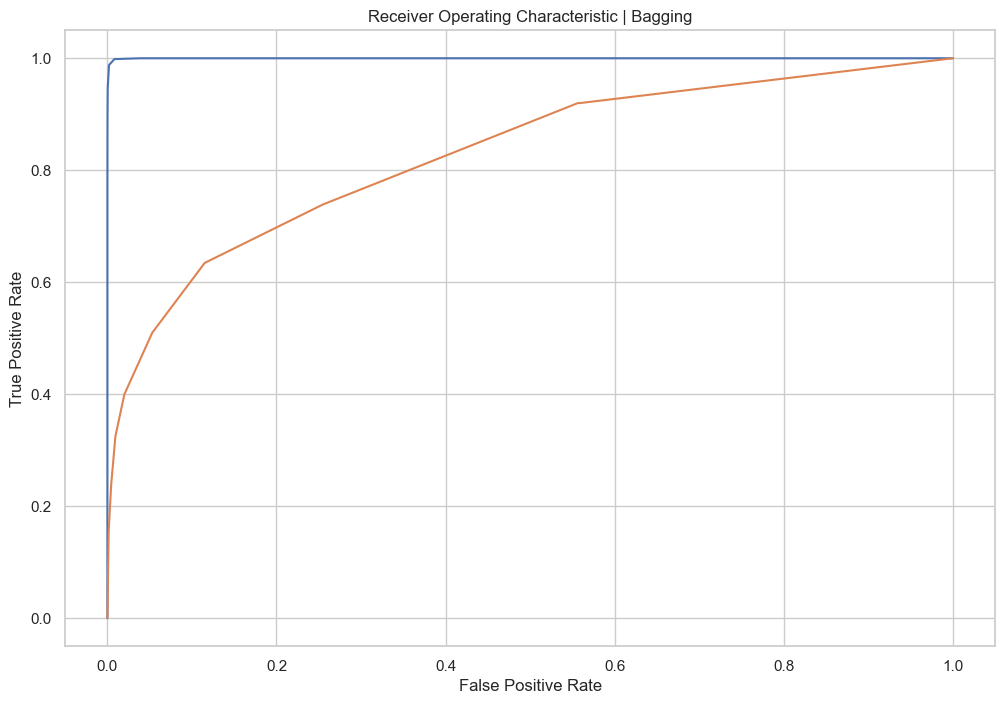

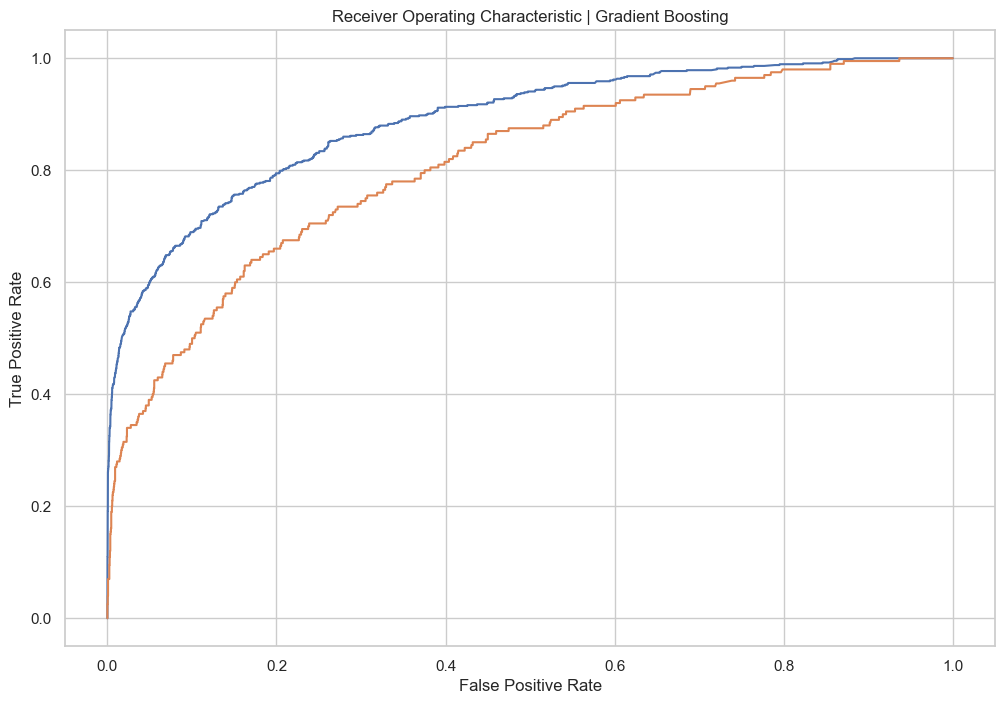

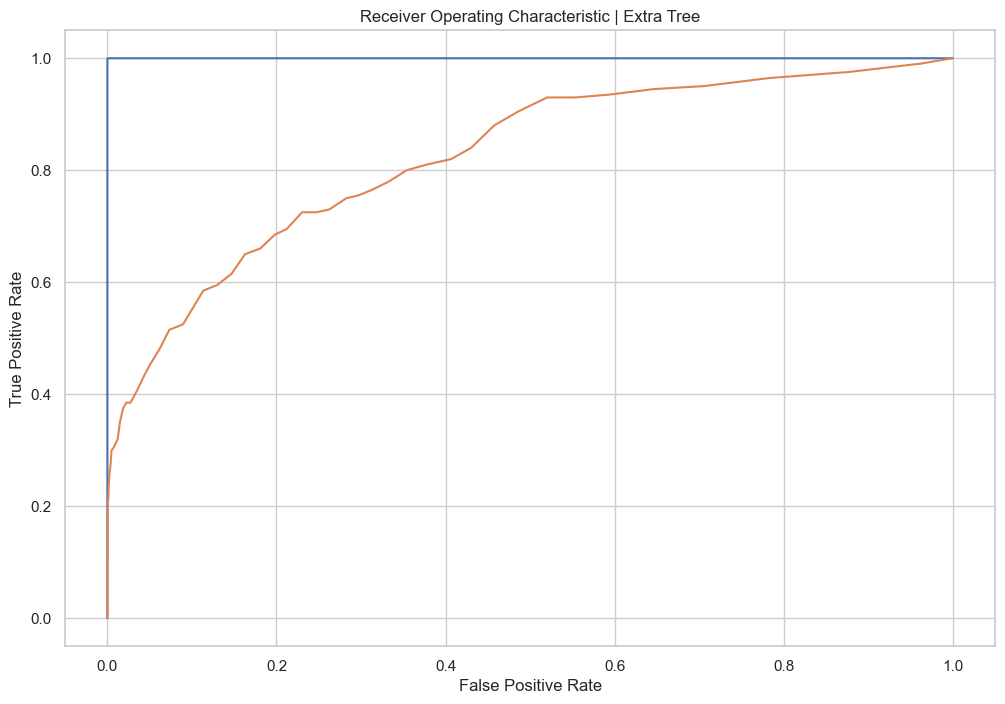

In [94]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y7}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [95]:
auc_score_y7 = {
    "Decision Trees":0.9985,
    "Random Forest": 0.9985,
    "Logistic Regression": 0.5008,
    "K-Nearest Neighbors": 0.6469,
    "Ada Boost": 0.5411,
    "Gaussien Naive_Bayes": 0.5025,
    "Bagging": 0.9459,
    "Gradient Boosting": 0.5927,
    "Extra Tree": 0.9985
}

In [96]:
df_auc_7 = pd.DataFrame(list(auc_score_y7.items()), columns=['Model', 'AUC Score'])
df_auc

Model  AUC Score
0        Decision Trees     1.0000
1         Random Forest     1.0000
2   Logistic Regression     0.5000
3   K-Nearest Neighbors     0.5000
4             Ada Boost     1.0000
5  Gaussien Naive_Bayes     0.7714
6               Bagging     1.0000
7     Gradient Boosting     1.0000
8            Extra Tree     1.0000

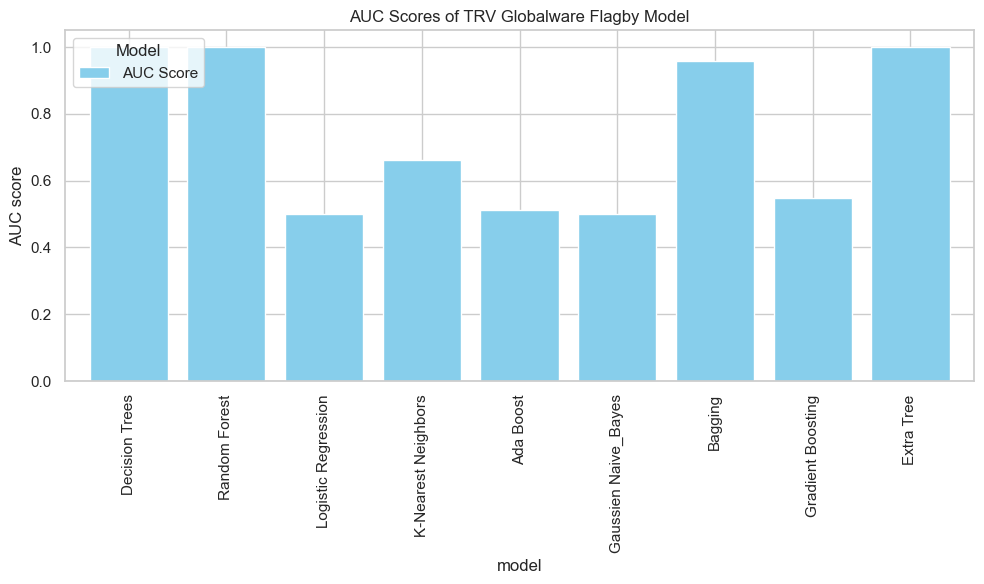

In [97]:
# Plot the DataFrame
df_auc_6.plot(x='Model', y='AUC Score', kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

# Adding title and labels
plt.title('AUC Scores of TRV Globalware Flagby Model')
plt.xlabel('model')
plt.ylabel('AUC score')

# Adjust legend
plt.legend(title='Model', loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

### Product 8: New Mover Flag

In [98]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y8, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : New Mover Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9478
- Precision: 0.9671
- Recall: 0.9478
- F1 Score: 0.9565
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : New Mover Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for 

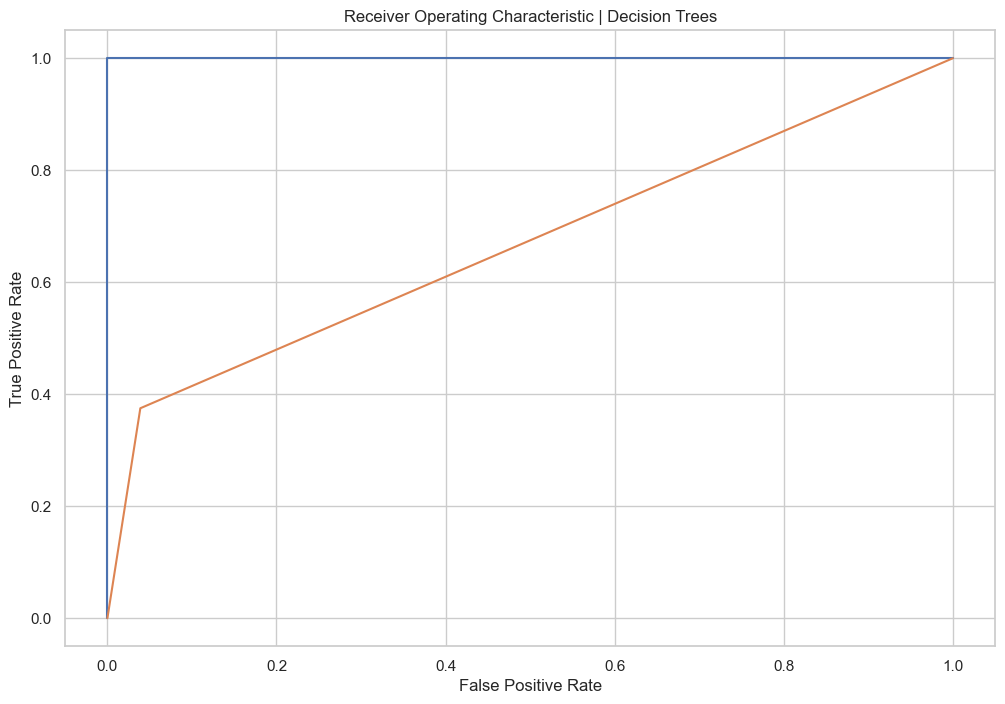

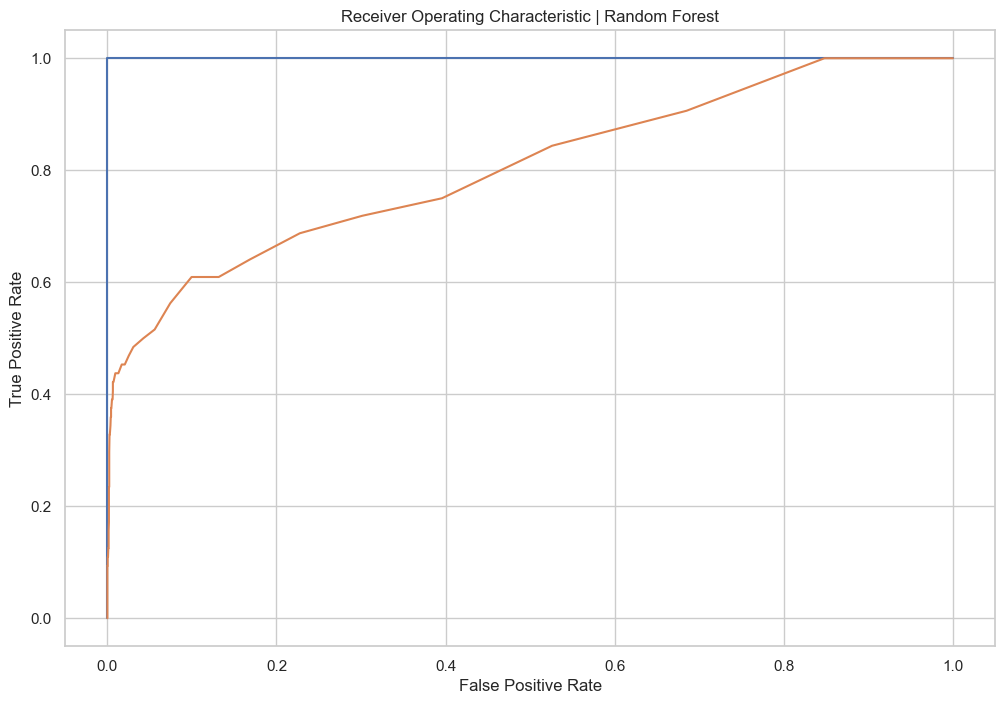

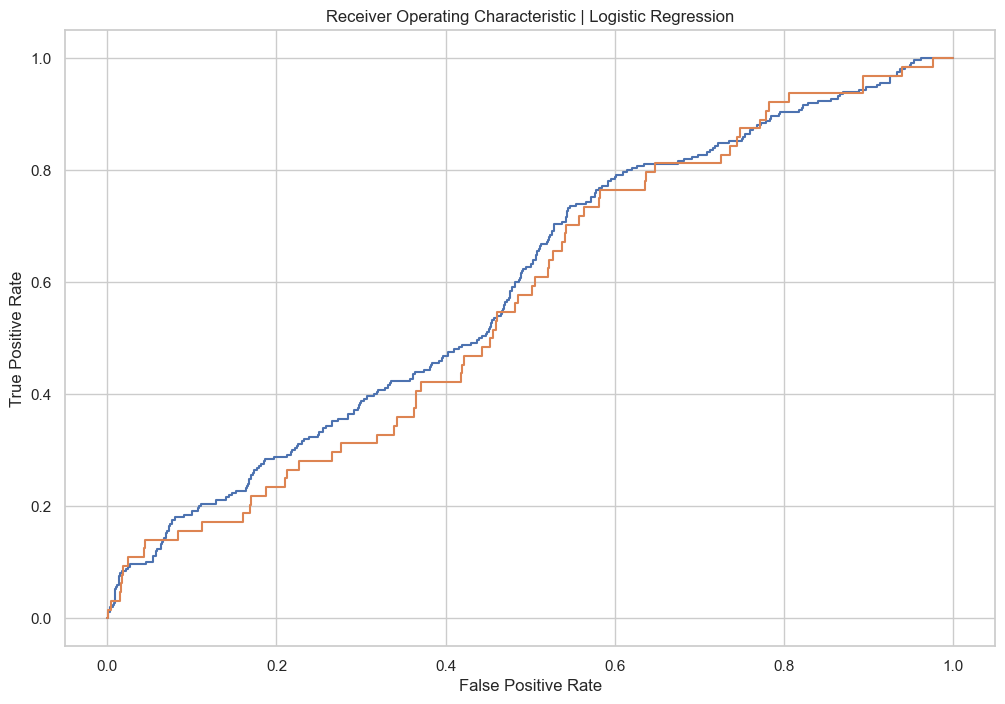

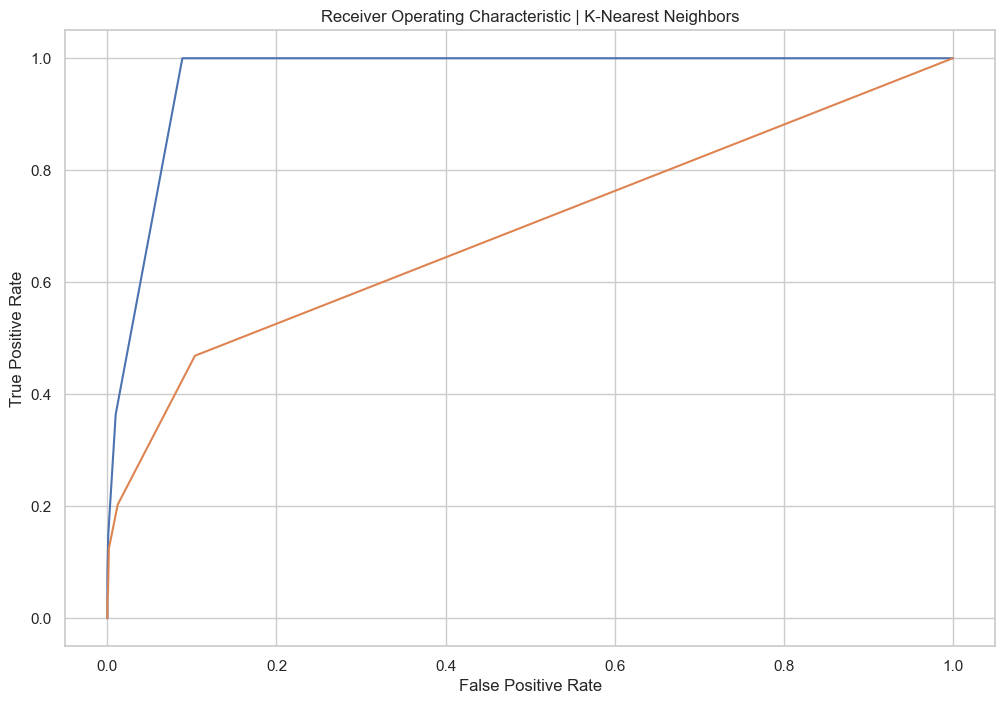

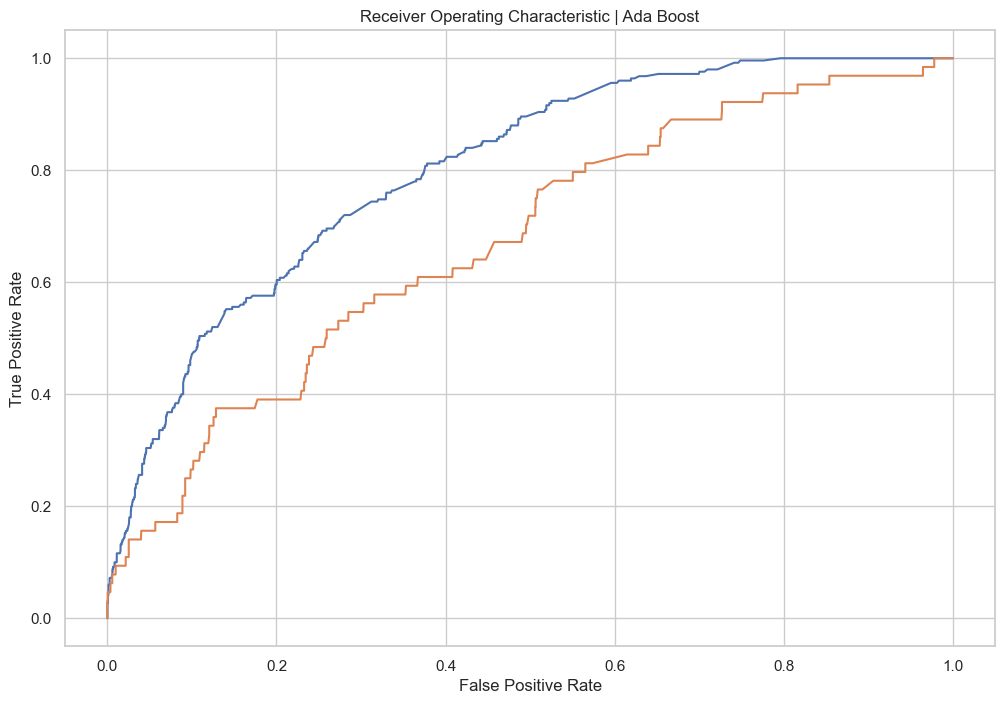

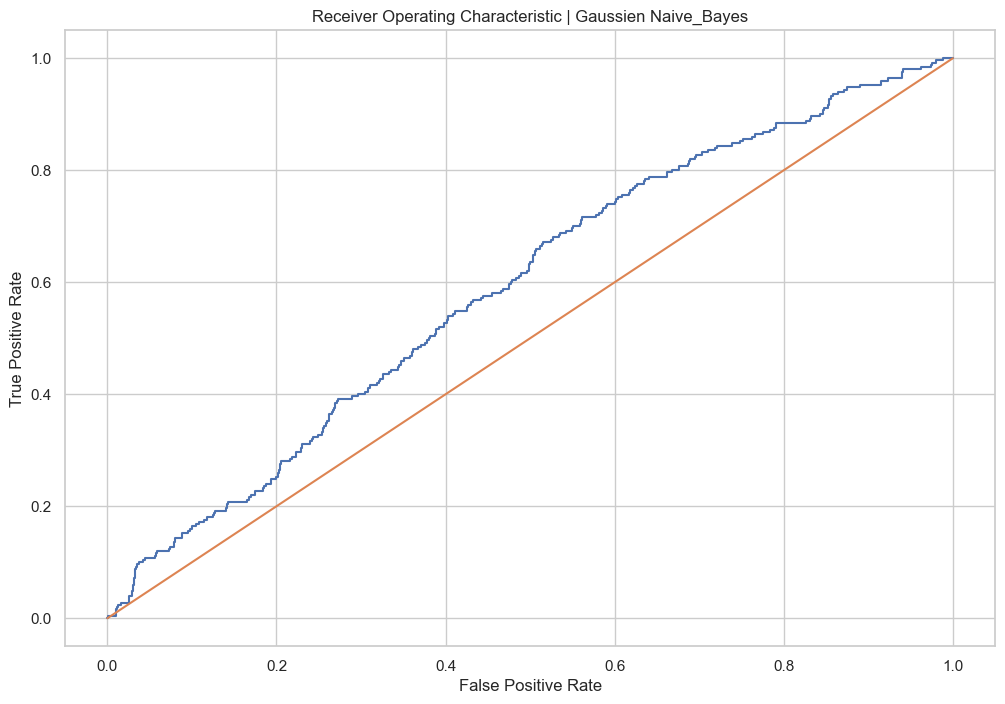

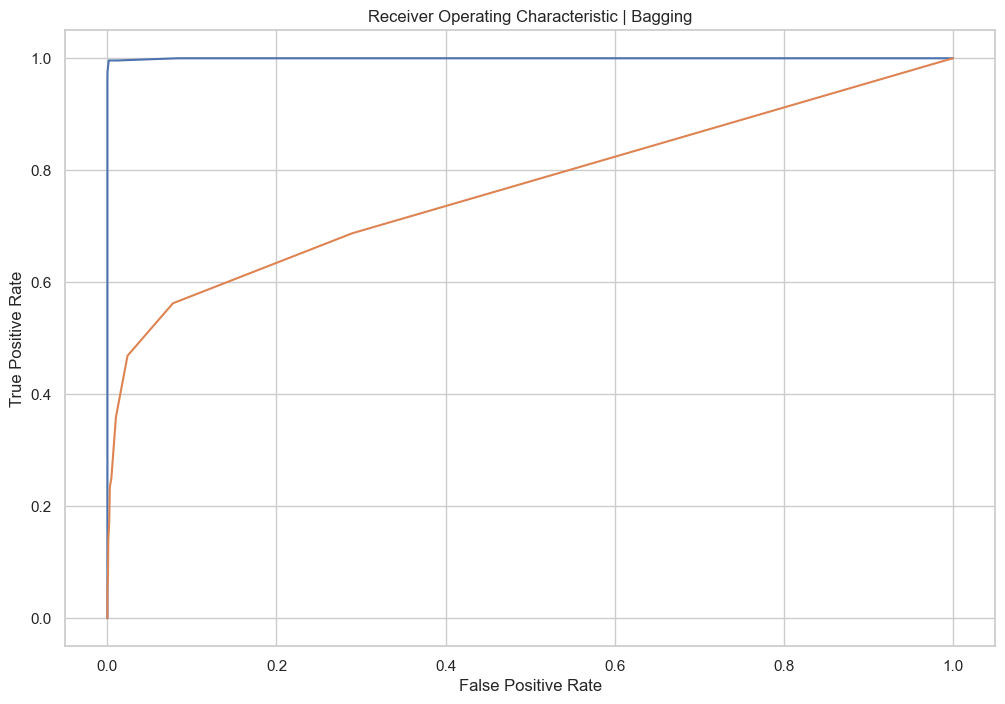

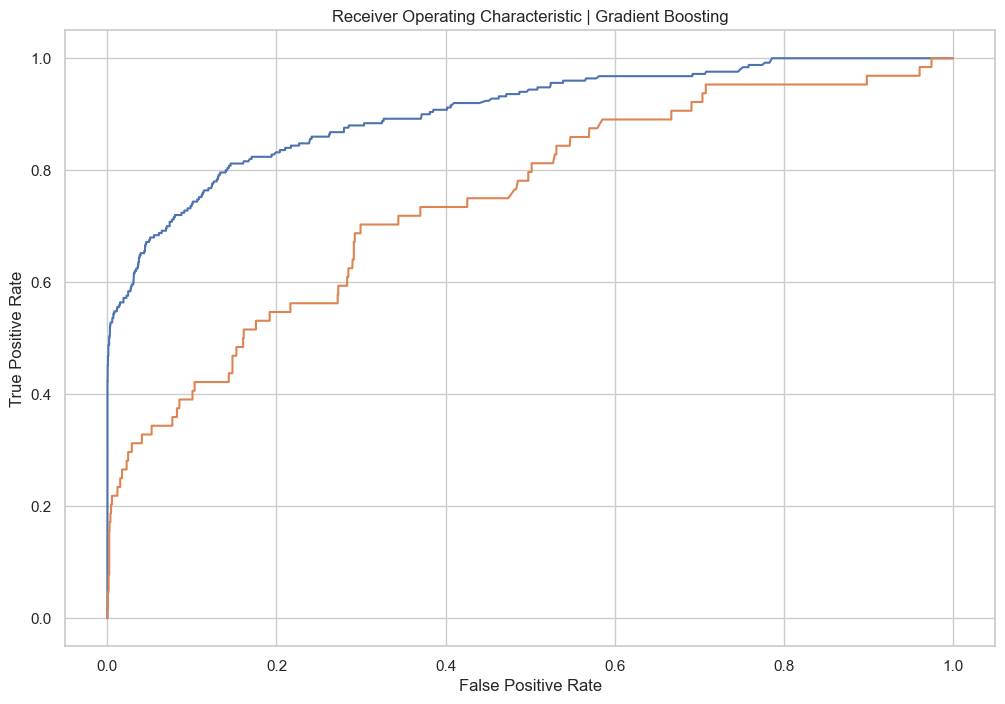

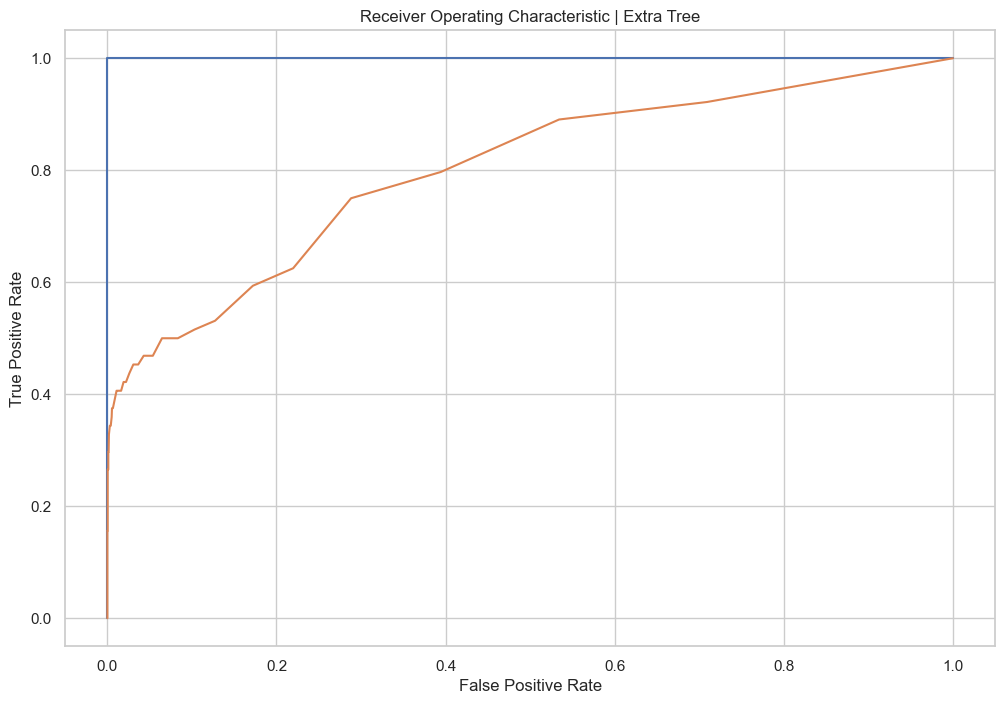

In [99]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y8}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [100]:
auc_score_y8 = {
    "Decision Trees":1.0000,
    "Random Forest": 1.0000,
    "Logistic Regression": 0.5000,
    "K-Nearest Neighbors": 0.5735,
    "Ada Boost": 0.5138,
    "Gaussien Naive_Bayes": 0.5013,
    "Bagging": 0.9100,
    "Gradient Boosting": 0.6240,
    "Extra Tree": 1.0000
}

In [101]:
df_auc_8 = pd.DataFrame(list(auc_score_y8.items()), columns=['Model', 'AUC Score'])
df_auc

Model  AUC Score
0        Decision Trees     1.0000
1         Random Forest     1.0000
2   Logistic Regression     0.5000
3   K-Nearest Neighbors     0.5000
4             Ada Boost     1.0000
5  Gaussien Naive_Bayes     0.7714
6               Bagging     1.0000
7     Gradient Boosting     1.0000
8            Extra Tree     1.0000

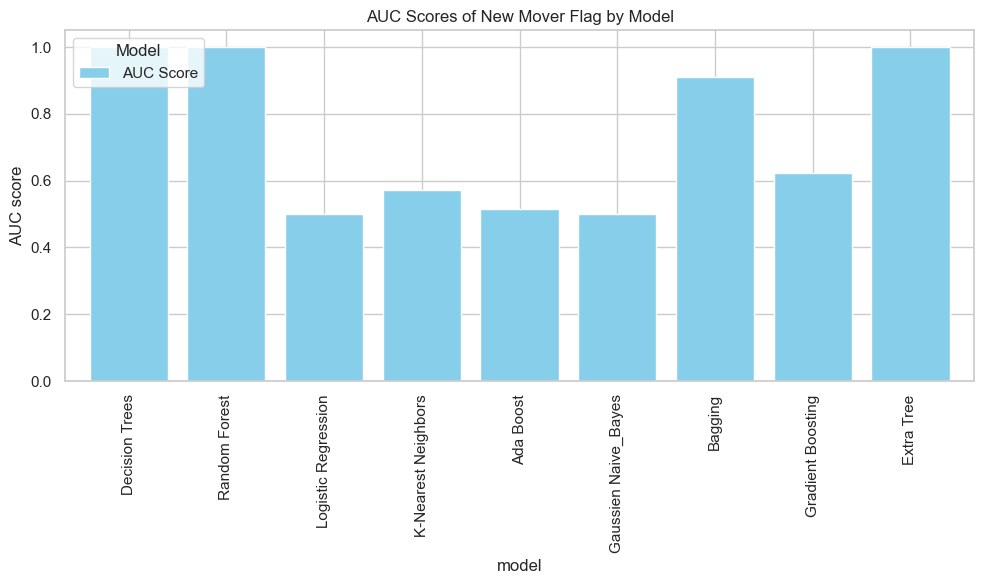

In [102]:
# Plot the DataFrame
df_auc_8.plot(x='Model', y='AUC Score', kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

# Adding title and labels
plt.title('AUC Scores of New Mover Flag by Model')
plt.xlabel('model')
plt.ylabel('AUC score')

# Adjust legend
plt.legend(title='Model', loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

### Product 9: FSV Deposit Program Flag

In [103]:
# splitting the data into trainimg and testing data set
X_train, X_test, y_train, y_test = train_test_split(cleaned_df_X, cleaned_df_Y9, random_state=104,test_size=0.25, shuffle=True)

# Column Transformation to apply feature scaling in all column at once
transformer = ColumnTransformer(transformers = [
    ('tnf1',MinMaxScaler(),num_list),
    # ('tnf2',OneHotEncoder(sparse_output=False, drop = 'first'), categorical_columns)
], remainder = 'passthrough')

# Performing transform
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)

Decision Trees


Model performance for Product : FSV Deposit Program Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Model performance for Test set
- Accuracy: 0.9958
- Precision: 0.9970
- Recall: 0.9958
- F1 Score: 0.9964
- Auc Score: 1.0000
******************************************************************************************


Random Forest


Model performance for Product : FSV Deposit Program Flag
------------------------------------------------------------------------------------------


Model performance for Training set
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1 Score: 1.0000
- Auc Score: 1.0000
------------------------------------------------------------------------------------------


Mo

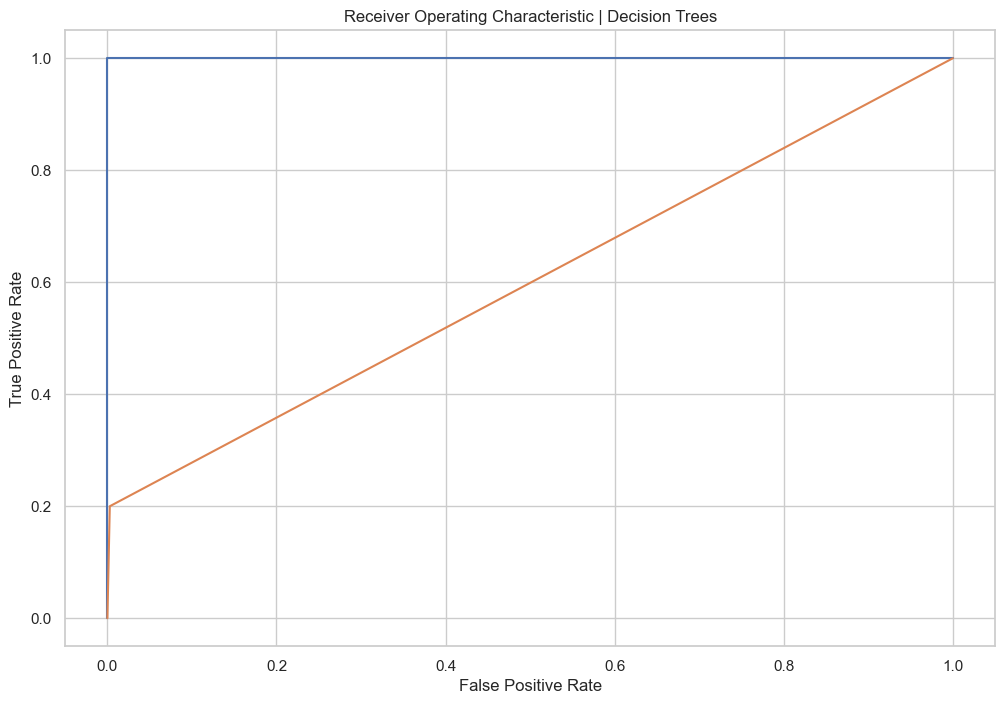

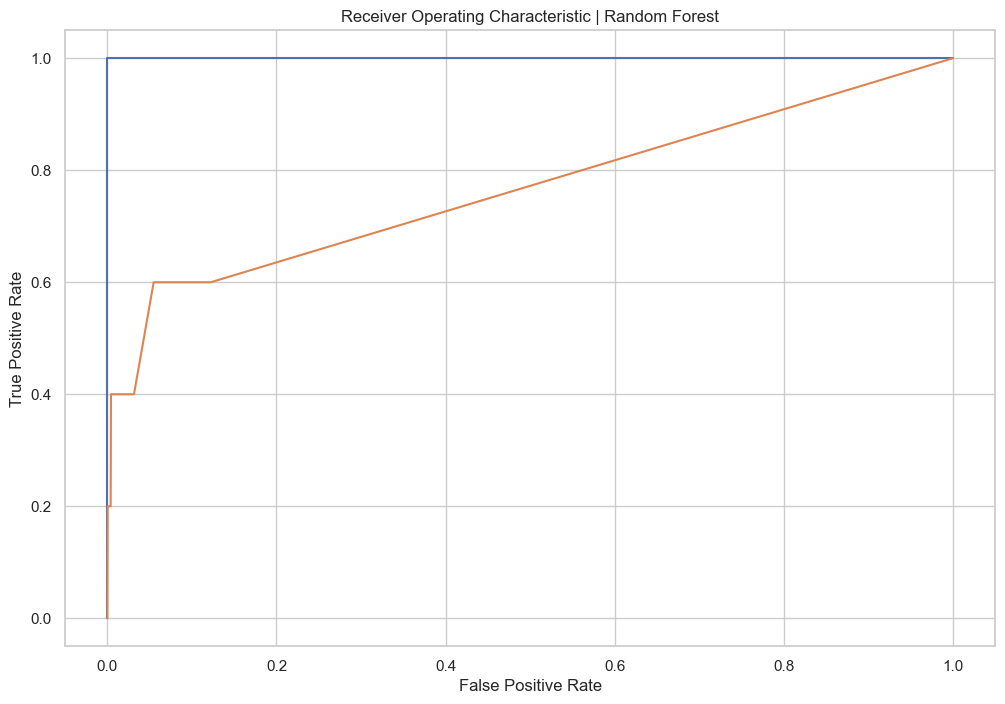

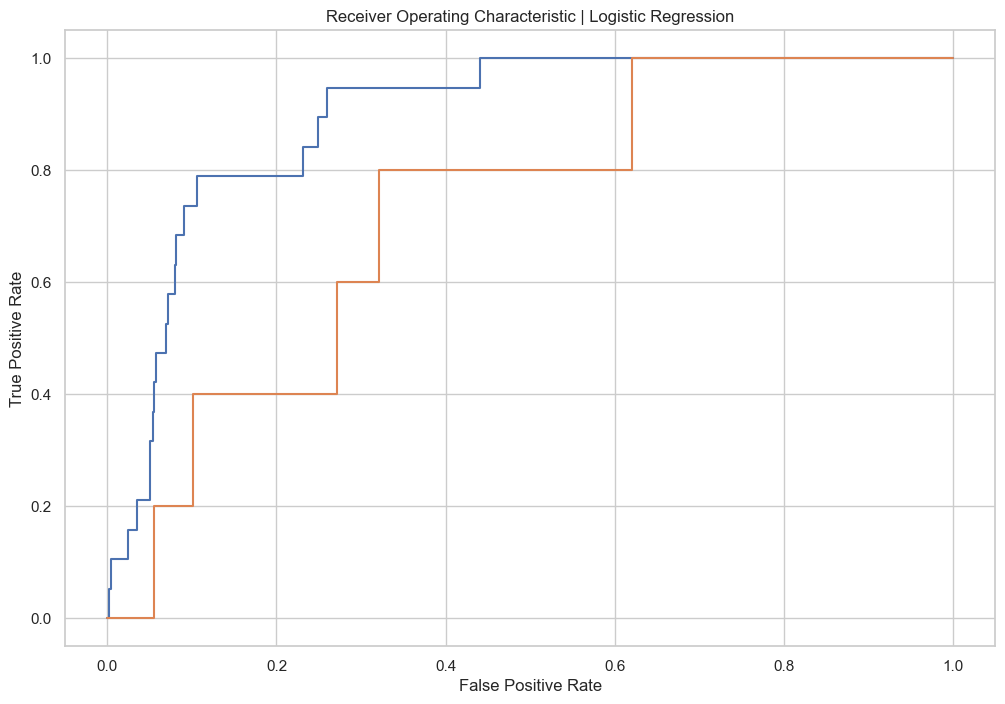

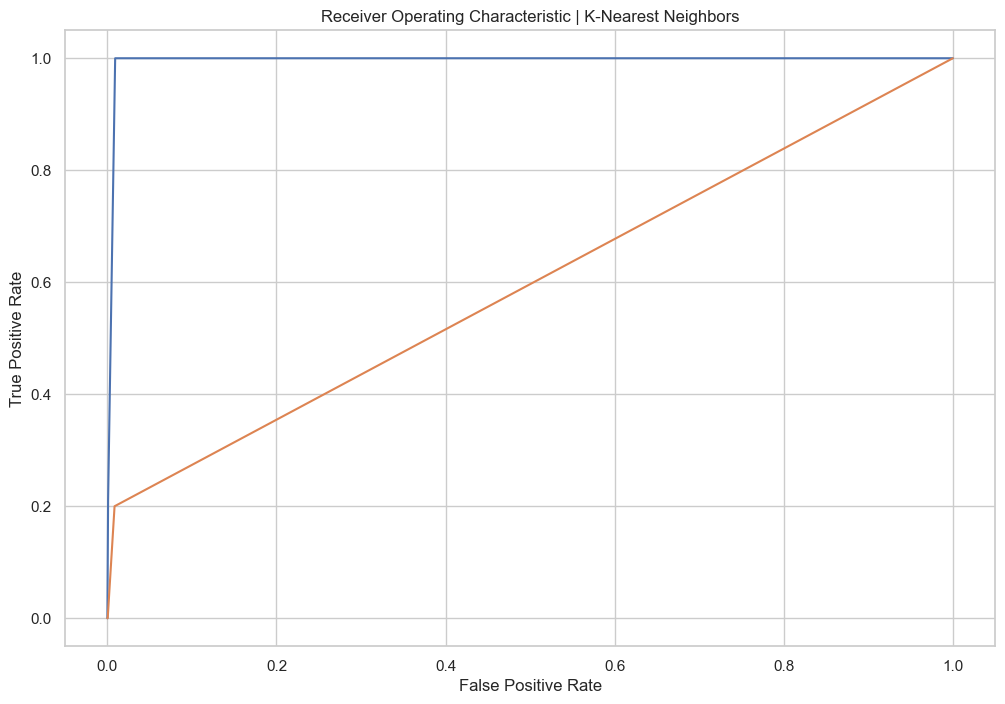

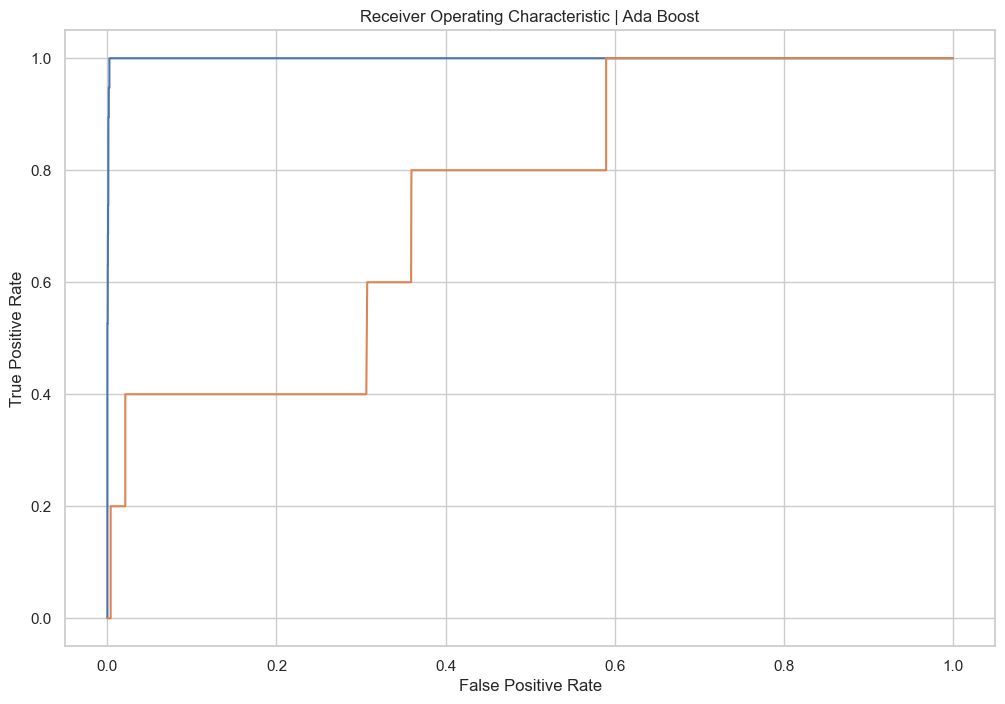

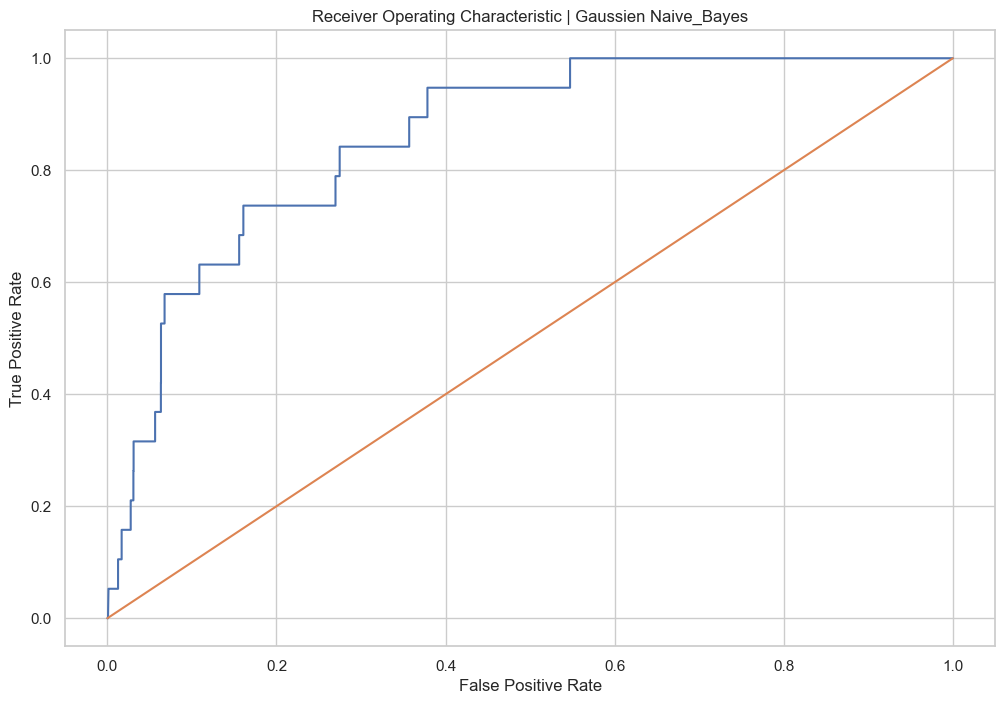

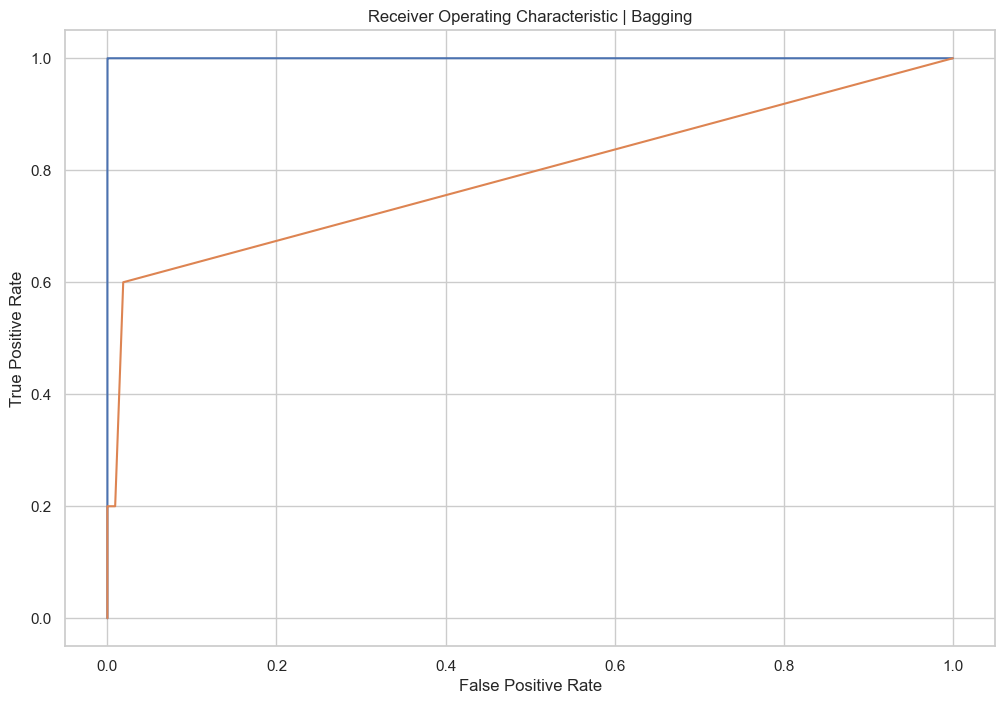

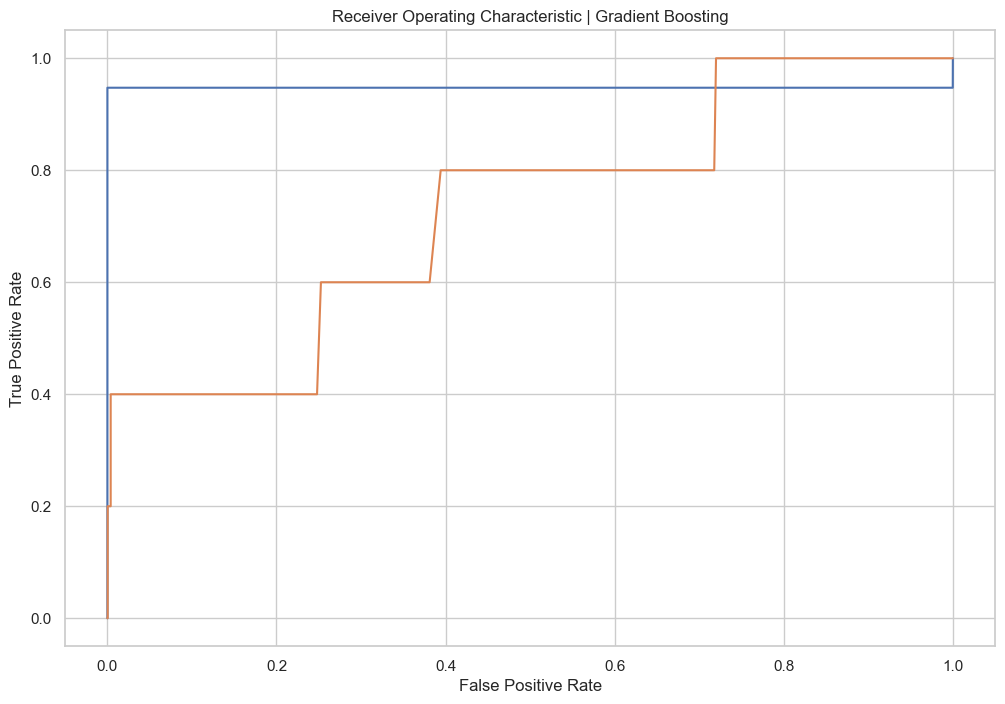

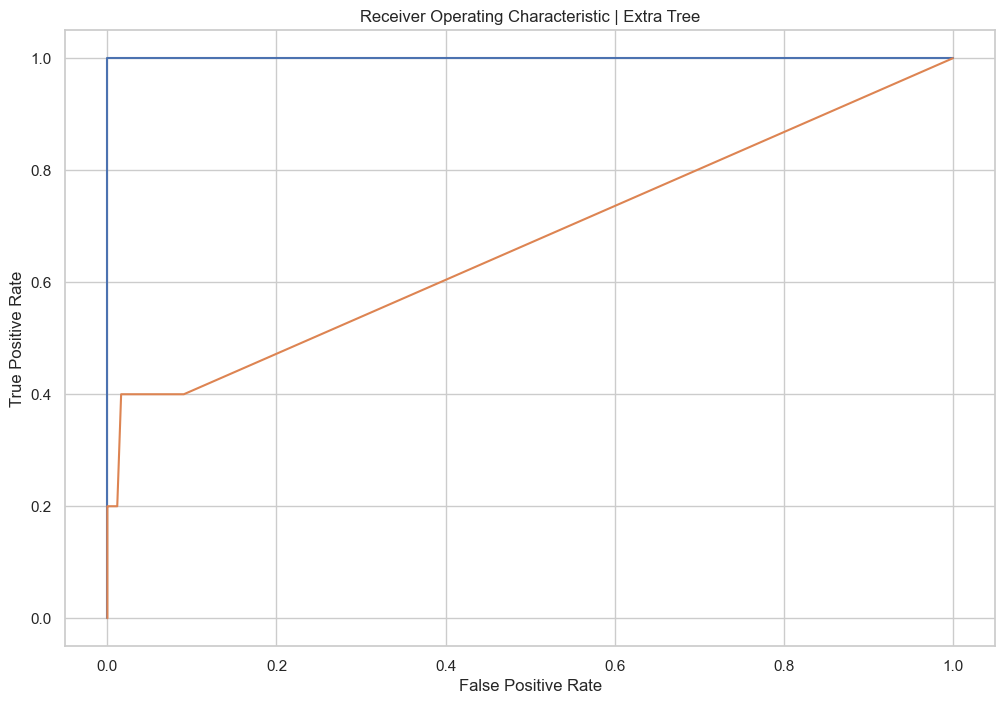

In [104]:
# Train and Test Results of different data
models = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    # "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Ada Boost": AdaBoostClassifier(),
    "Gaussien Naive_Bayes":  GaussianNB(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting":  GradientBoostingClassifier(),
    "Extra Tree": ExtraTreesClassifier()
}


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train Model
    model_name = list(models.keys())[i]

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_auc_score = roc_auc_score(y_train, y_train_pred)
    #model_train_roc_auc_score = roc_auc_score(y_train, model.predict_proba(X_train))

    # Initialize plot
    fig = plt.figure(figsize=(12,8))
    plt.title(f'Receiver Operating Characteristic | {model_name}')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Predicts X_test using model
    y_train_pred = model.predict_proba(X_train)
    y_train_pred = [p[1] for p in y_train_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(model, auroc))
    #auroc_results['Decision Tree'] = auroc
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")


    # Test Set Performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_auc_score = roc_auc_score(y_test, y_test_pred)
    #model_test_roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test))
    # Predicts X_test using model
    y_test_pred = model.predict_proba(X_test)
    y_test_pred = [p[1] for p in y_test_pred]

    # Calculates ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

    # Calculates AUROC
    auroc = round(auc(fpr, tpr), 3)

    # Plots ROC curve and labels with AUROC
    # plt.plot(fpr, tpr, label='{} AUROC = {}'.format(list(models.keys())[i], auroc))
    plt.plot(fpr, tpr, label=f"{model} AUROC = {auroc}")

    print(list(models.keys())[i])
    print('\n')

    print(f'Model performance for Product : {y9}')
    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 Score: {:.4f}".format(model_train_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('------------------------------------------------------------------------------------------')
    print('\n')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 Score: {:.4f}".format(model_test_f1_score))
    print("- Auc Score: {:.4f}".format(model_train_auc_score))

    print('**'*45)
    print('\n')

In [105]:
auc_score_y9 = {
    "Decision Trees":1.0000,
    "Random Forest": 1.0000,
    "Logistic Regression": 0.5000,
    "K-Nearest Neighbors": 0.5000,
    "Ada Boost": 0.5579,
    "Gaussien Naive_Bayes": 0.6186,
    "Bagging": 0.8158,
    "Gradient Boosting": 0.9737,
    "Extra Tree": 1.0000
}

In [106]:
df_auc_9 = pd.DataFrame(list(auc_score_y9.items()), columns=['Model', 'AUC Score'])
df_auc

Model  AUC Score
0        Decision Trees     1.0000
1         Random Forest     1.0000
2   Logistic Regression     0.5000
3   K-Nearest Neighbors     0.5000
4             Ada Boost     1.0000
5  Gaussien Naive_Bayes     0.7714
6               Bagging     1.0000
7     Gradient Boosting     1.0000
8            Extra Tree     1.0000

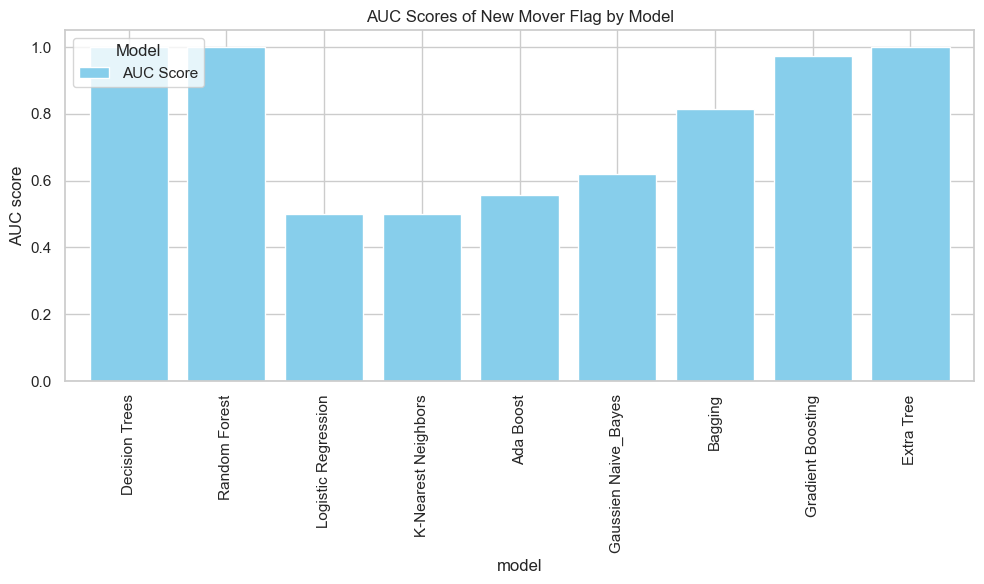

In [107]:
# Plot the DataFrame
df_auc_9.plot(x='Model', y='AUC Score', kind='bar', figsize=(10, 6), width=0.8, color='skyblue')

# Adding title and labels
plt.title('AUC Scores of New Mover Flag by Model')
plt.xlabel('model')
plt.ylabel('AUC score')

# Adjust legend
plt.legend(title='Model', loc='upper left')

# Display plot
plt.tight_layout()
plt.show()

## # Comparing Random Forest and Boosting for all products

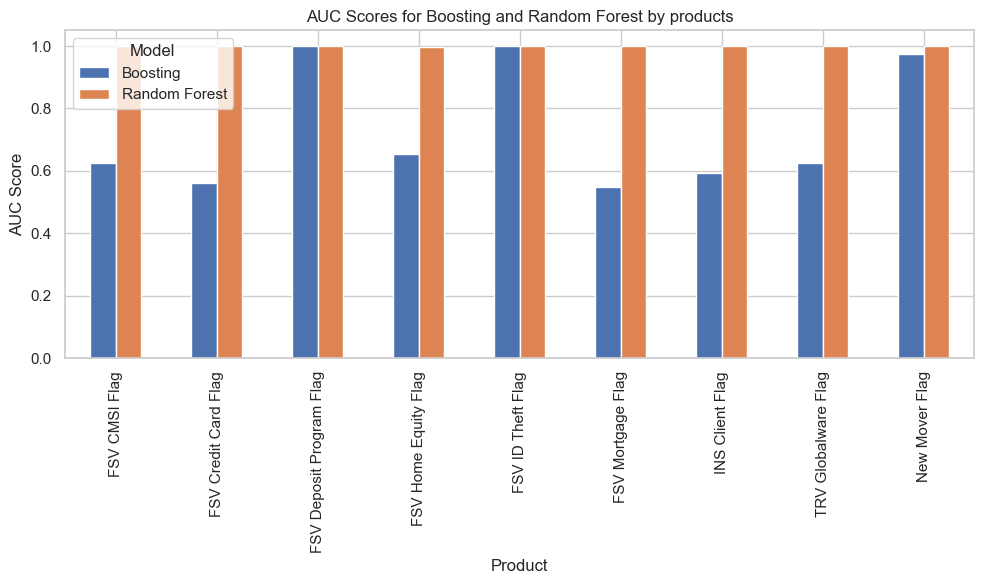

In [122]:
# Choosing Random Forest and Boosting as the best models and comparing the two models for all 9 products
data = {
    'Product': ['FSV CMSI Flag', 'FSV Credit Card Flag', 'FSV Deposit Program Flag',
    'FSV Home Equity Flag', 'FSV ID Theft Flag', 'FSV Mortgage Flag',
    'INS Client Flag', 'TRV Globalware Flag', 'New Mover Flag'],
    'Boosting': [0.6255, 0.5597, 1.0000, 0.6546, 1.0000, 0.5485, 0.5927, 0.6240, 0.9737],
    'Random Forest': [1.0000, 1.0000, 1.0000, 0.9967, 1.0000, 1.0000, 0.9985, 1.0000, 1.0000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set product as index
df.set_index('Product', inplace=True)

# Plot
df.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('AUC Scores for Boosting and Random Forest by products')
plt.xlabel('Product')
plt.ylabel('AUC Score')

# Adjust legend
plt.legend(title='Model')

# Display plot
plt.tight_layout()
plt.show()

# **Unsupervised ML**

K-Mean Clustering

In [109]:
from sklearn.cluster import KMeans

In [110]:
cluster_list = num_list
X = cleaned_df[cluster_list]

In [111]:
# Elbow method to determine K value
wcss=[]

for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

wcss

[3.3143653352027816e+19,
 7.254587825522405e+18,
 4.633105055711922e+18,
 3.747315492906771e+18,
 2.689026899766019e+18,
 2.3961727326356214e+18,
 1.9449091277672056e+18,
 1.5971539997741225e+18,
 1.5270776754725878e+18,
 1.3986650277064417e+18]

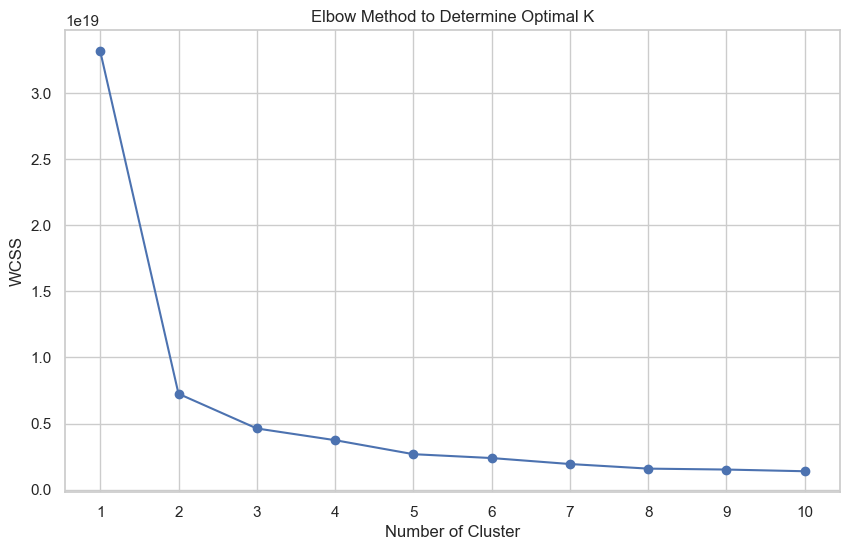

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

In [113]:
kmean= KMeans(n_clusters=4,init="k-means++")

In [114]:
y_labels= kmeans.fit_predict(X)

[]

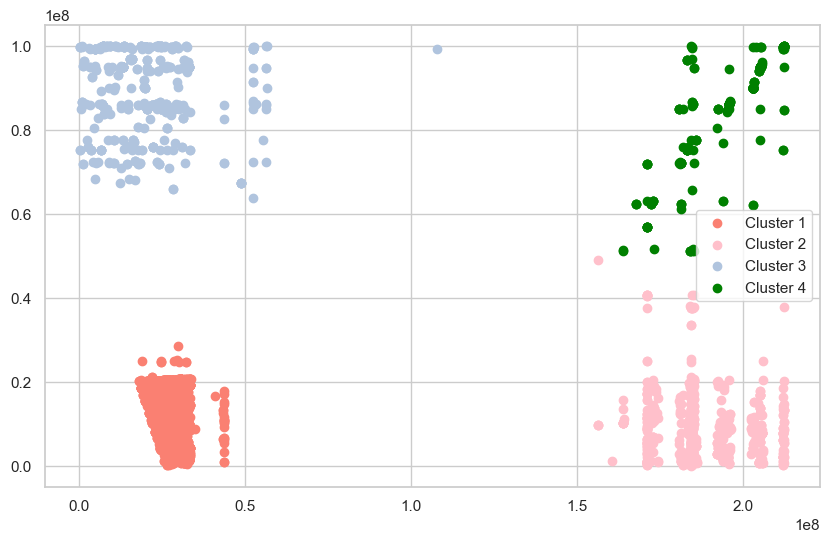

In [115]:
#plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],c=y_labels)
#plt.scatter(X_train[y_labels ==0,0],X_train[y_labels == 0,1],color='red')
#plt.scatter(X_train[y_labels ==1,0],X_train[y_labels == 1,1],color='blue')
#plt.scatter(X_train[y_labels ==2,0],X_train[y_labels ==2,1],color='green')
plt.figure(figsize=(10, 6))
plt.scatter(X[y_labels == 0].iloc[:, 0], X[y_labels == 0].iloc[:, 1], color='salmon', label='Cluster 1')
plt.scatter(X[y_labels == 1].iloc[:, 0], X[y_labels == 1].iloc[:, 1], color='pink', label='Cluster 2')
plt.scatter(X[y_labels == 2].iloc[:, 0], X[y_labels == 2].iloc[:, 1], color='lightsteelblue', label='Cluster 3')
plt.scatter(X[y_labels == 3].iloc[:, 0], X[y_labels == 3].iloc[:, 1], color='green', label='Cluster 4')
plt.legend()
plt.plot()

[9012145.861588601, 3897331.8072883384, 2532310.908619621, 1570963.5200468297, 1161417.861810305, 967565.8487271355, 880170.3456890597, 724679.2648152563, 670141.074007826, 662764.3342923662]


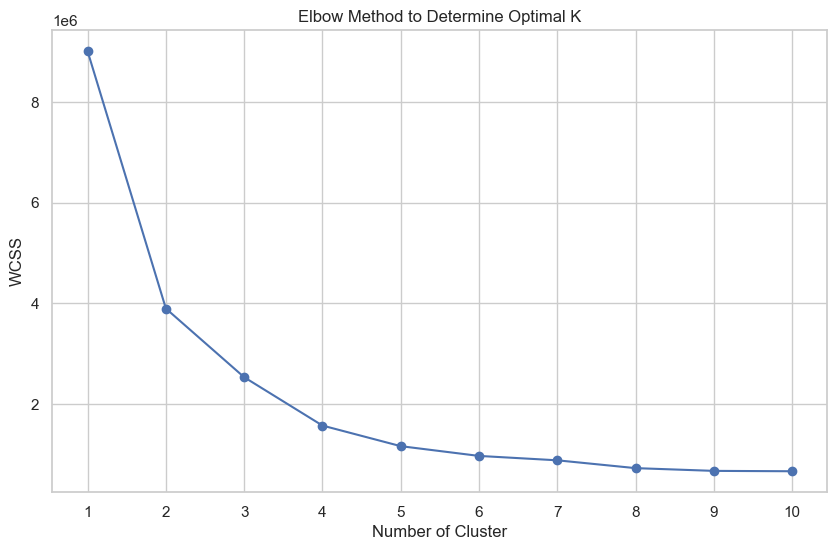

[]

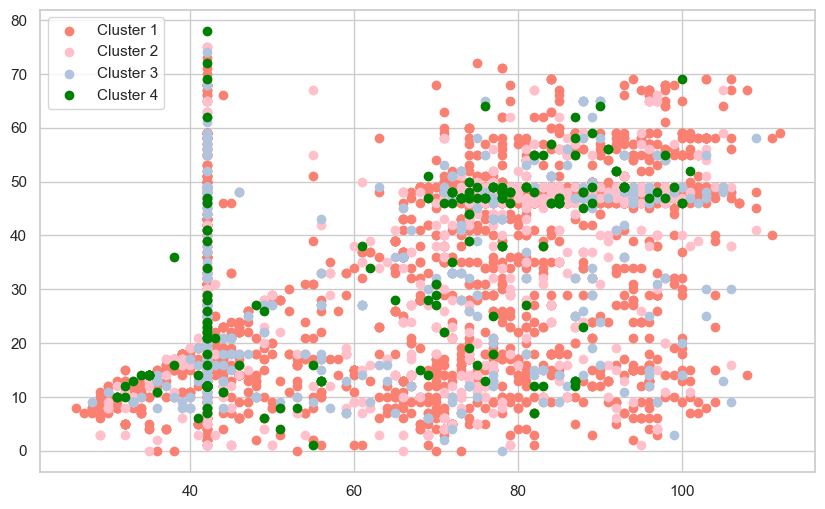

In [116]:
# Elbow method to determine K value
wcss=[]

for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X[['Age','Member Tenure Years']])
  wcss.append(kmeans.inertia_)

#print wcss
print(wcss)

# Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# taining
kmean= KMeans(n_clusters=k,init="k-means++")
y_labels= kmeans.fit_predict(X)

kmean= KMeans(n_clusters=3,init="k-means++")
# Scatter plot for specific features
plt.figure(figsize=(10, 6))

# Choose the features to plot
feature_x = 'Age'
feature_y = 'Member Tenure Years'

plt.scatter(X[y_labels == 0][feature_x], X[y_labels == 0][feature_y], color='salmon', label='Cluster 1')
plt.scatter(X[y_labels == 1][feature_x], X[y_labels == 1][feature_y], color='pink', label='Cluster 2')
plt.scatter(X[y_labels == 2][feature_x], X[y_labels == 2][feature_y], color='lightsteelblue', label='Cluster 3')
plt.scatter(X[y_labels == 3][feature_x], X[y_labels == 3][feature_y], color='green', label='Cluster 4')
plt.legend()
plt.plot()

In [117]:
X.columns

Index(['SVC Facility Members', 'Member Flag', 'Length Of Residence',
       'Do Not Direct Mail Solicit', 'Email Available', 'ERS ENT Count Year 1',
       'ERS ENT Count Year 2', 'ERS ENT Count Year 3', 'Member Tenure Years',
       'Months from Join to Cancel', 'Basic Cost', 'Calculated Tow Miles',
       'Is NSR', 'Member Phone Type', 'Plus Cost', 'Premier Cost',
       'Total Cost', 'Was Towed To AAR Referral',
       'Number_of_products_purchased', 'Age'],
      dtype='object')

[7.268797475833042e+17, 2.146144125918499e+17, 7.327251962329018e+16, 5.82085726137629e+16, 2.5790878877136004e+16, 1.7232411695678692e+16, 1.0507216480744998e+16, 5527598461174940.0, 4136545761535156.0, 3113283636065133.0]


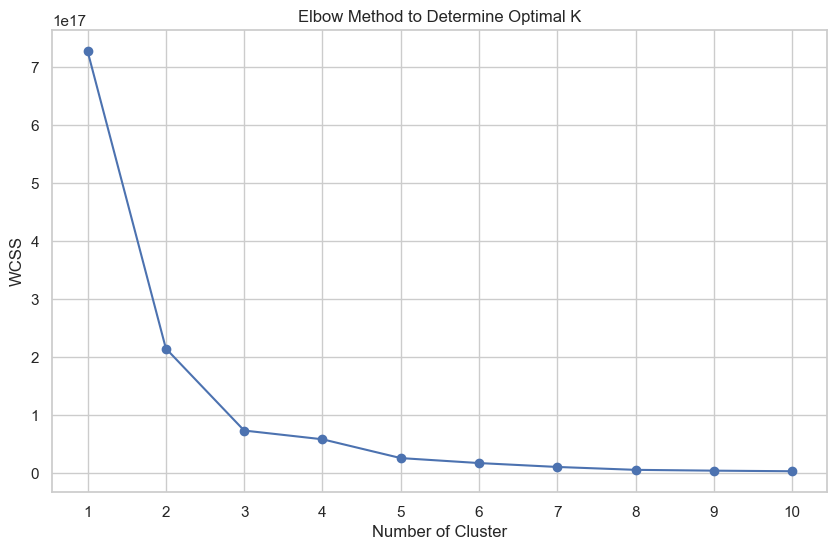

[]

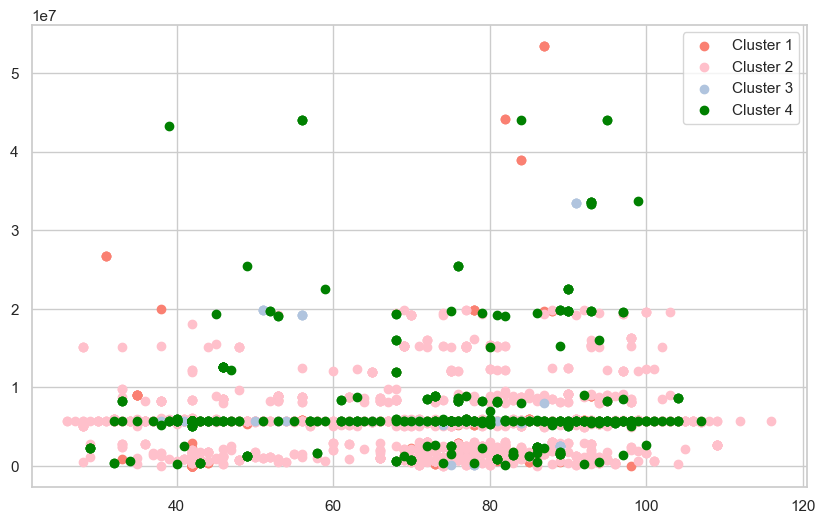

In [118]:
# Elbow method to determine K value
wcss=[]

for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X[['Age','Member Phone Type']])
  wcss.append(kmeans.inertia_)

#print wcss
print(wcss)

# Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# taining
kmean= KMeans(n_clusters=k,init="k-means++")
y_labels= kmeans.fit_predict(X)

kmean= KMeans(n_clusters=6,init="k-means++")
# Scatter plot for specific features
plt.figure(figsize=(10, 6))

# Choose the features to plot
feature_x = 'Age'
feature_y = 'Member Phone Type'

plt.scatter(X[y_labels == 0][feature_x], X[y_labels == 0][feature_y], color='salmon', label='Cluster 1')
plt.scatter(X[y_labels == 1][feature_x], X[y_labels == 1][feature_y], color='pink', label='Cluster 2')
plt.scatter(X[y_labels == 2][feature_x], X[y_labels == 2][feature_y], color='lightsteelblue', label='Cluster 3')
plt.scatter(X[y_labels == 3][feature_x], X[y_labels == 3][feature_y], color='green', label='Cluster 4')
plt.legend()
plt.plot()

In [119]:
cleaned_df_X.columns

Index(['SVC Facility Members', 'Member Flag', 'Length Of Residence',
       'Do Not Direct Mail Solicit', 'Email Available', 'ERS ENT Count Year 1',
       'ERS ENT Count Year 2', 'ERS ENT Count Year 3', 'Member Tenure Years',
       'Months from Join to Cancel', 'Basic Cost', 'Calculated Tow Miles',
       'Is NSR', 'Member Phone Type', 'Plus Cost', 'Premier Cost',
       'Total Cost', 'Was Towed To AAR Referral',
       'Number_of_products_purchased', 'Age'],
      dtype='object')

[7.268797478894228e+17, 1.83659764679979e+17, 7.327251992823467e+16, 5.593112461897494e+16, 2.4993604803831332e+16, 1.6631344157549976e+16, 1.3928018503308914e+16, 5527598765779346.0, 4136546066118471.5, 3053904805722462.0]


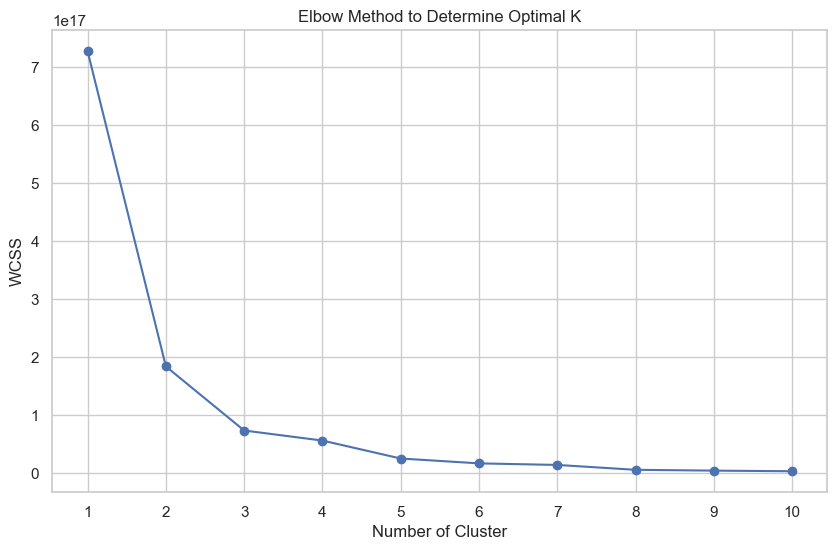

[]

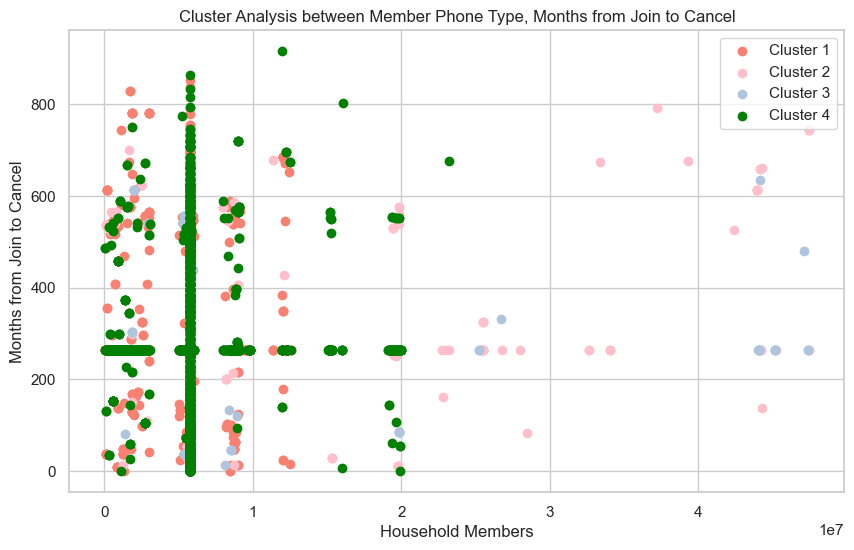

In [120]:
# Elbow method to determine K value
wcss=[]

for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X[['Member Phone Type','Months from Join to Cancel']])
  wcss.append(kmeans.inertia_)

#print wcss
print(wcss)

# Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# taining
kmean= KMeans(n_clusters=k,init="k-means++")
y_labels= kmeans.fit_predict(X)

kmean= KMeans(n_clusters=6,init="k-means++")
# Scatter plot for specific features
plt.figure(figsize=(10, 6))

# Choose the features to plot
feature_x = 'Member Phone Type'
feature_y = 'Months from Join to Cancel'

plt.scatter(X[y_labels == 0][feature_x], X[y_labels == 0][feature_y], color='salmon', label='Cluster 1')
plt.scatter(X[y_labels == 1][feature_x], X[y_labels == 1][feature_y], color='pink', label='Cluster 2')
plt.scatter(X[y_labels == 2][feature_x], X[y_labels == 2][feature_y], color='lightsteelblue', label='Cluster 3')
plt.scatter(X[y_labels == 3][feature_x], X[y_labels == 3][feature_y], color='green', label='Cluster 4')
plt.xlabel("Household Members")
plt.ylabel("Months from Join to Cancel")
plt.title(f"Cluster Analysis between {feature_x}, {feature_y}")
plt.legend()
plt.plot()

[311575222.8920154, 104549836.07318895, 30323187.092399865, 18285715.89188433, 13071220.721496753, 7976090.438592339, 6096333.759626973, 4893898.321000094, 4326493.452165362, 3020983.98467606]


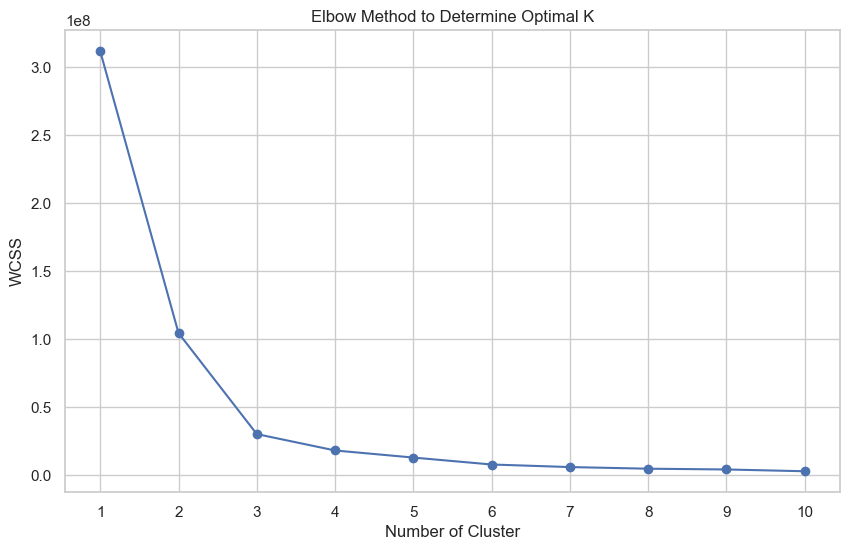

[]

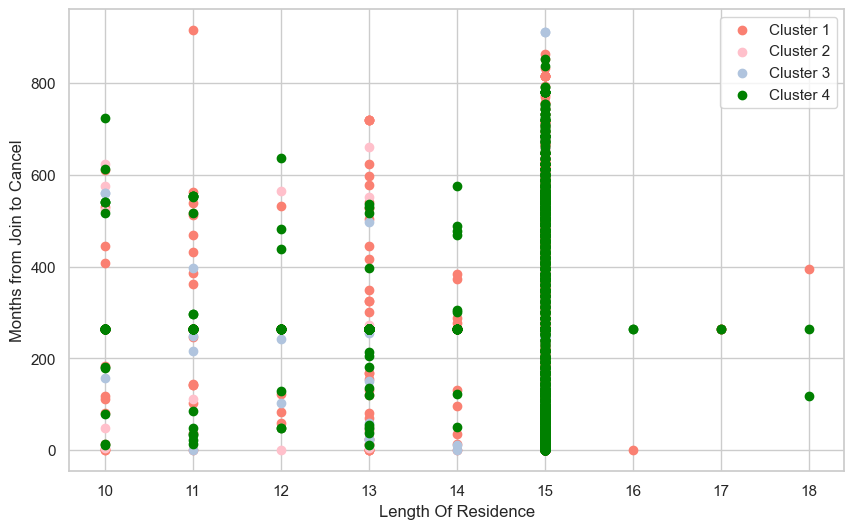

In [121]:
# Elbow method to determine K value
wcss=[]

for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X[['Length Of Residence','Months from Join to Cancel']])
  wcss.append(kmeans.inertia_)

#print wcss
print(wcss)

# Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1,11),wcss,marker='o')
plt.xticks(range(1,11))
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# taining
kmean= KMeans(n_clusters=k,init="k-means++")
y_labels= kmeans.fit_predict(X)

kmean= KMeans(n_clusters=6,init="k-means++")
# Scatter plot for specific features
plt.figure(figsize=(10, 6))

# Choose the features to plot
feature_x = 'Length Of Residence'
feature_y = 'Months from Join to Cancel'

plt.scatter(X[y_labels == 0][feature_x], X[y_labels == 0][feature_y], color='salmon', label='Cluster 1')
plt.scatter(X[y_labels == 1][feature_x], X[y_labels == 1][feature_y], color='pink', label='Cluster 2')
plt.scatter(X[y_labels == 2][feature_x], X[y_labels == 2][feature_y], color='lightsteelblue', label='Cluster 3')
plt.scatter(X[y_labels == 3][feature_x], X[y_labels == 3][feature_y], color='green', label='Cluster 4')
plt.xlabel("Length Of Residence")
plt.ylabel("Months from Join to Cancel")
plt.legend()
plt.plot()